In [67]:
from drought.data import pipeline, interpolate, seasonal
from drought.visualization import plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set_theme()
pd.options.mode.chained_assignment = None

In [10]:
sns.color_palette("Paired")
#palette = list(sns.color_palette("Paired")[i] for i in [0, 2, 3, 1, 5, 6, 7, 11] )
palette = sns.color_palette("Set2")

## Get data

In [3]:
climate = pd.read_csv('../../data/interim/all_climate_monthly_mean_5000_scale_2001_to_2023.csv', index_col=0)
gedi = pd.read_csv('../../data/interim/gedi_monthly_extended_interpolated_March_11.csv', index_col=0)

In [4]:
# Look at only gedi months that have at least 5000 shots per region.
gedi = gedi[gedi.number > 5000]

In [64]:
climate_columns = ['precipitation', 'radiation', 'temperature', 'fpar', 'PET', 'P-PET']

### Climate variables across polygons

/tmp/ipykernel_2770583/4138616516.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).sum().reset_index()


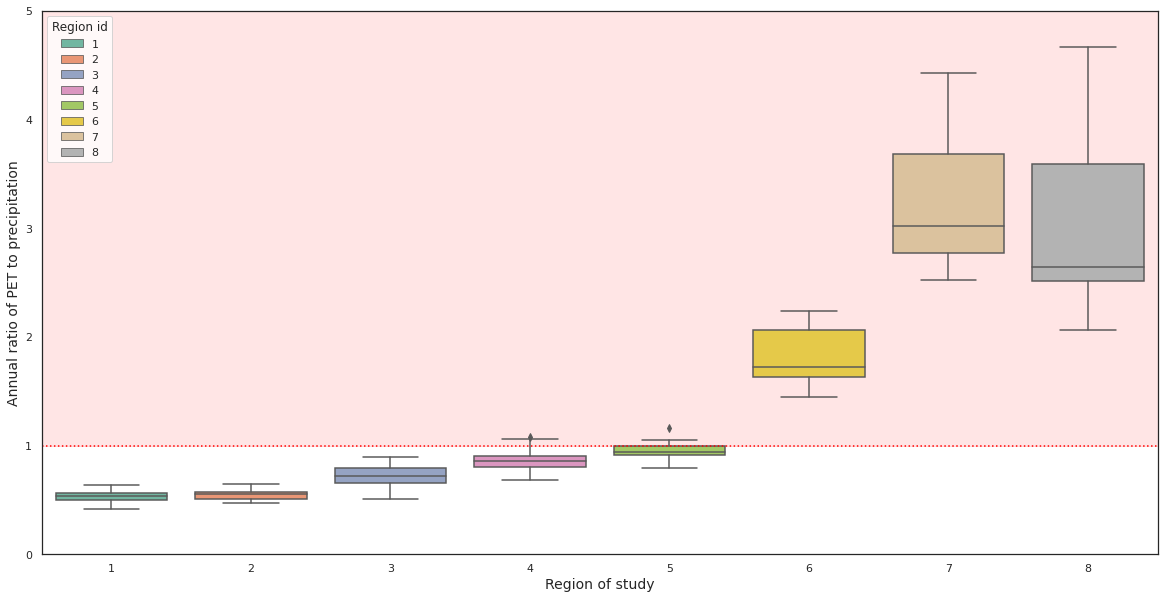

In [267]:
# Average annual monthly precipitation.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).sum().reset_index()
yearly['PET:P'] = yearly.PET / yearly.precipitation
ax.set_axisbelow(True)
plt.axhspan(1, 30, alpha=0.1, color='red', zorder=-100)
graph = sns.boxplot(yearly, x='polygon_id', y='PET:P', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
plt.axhline(y = 1, color='red', linestyle='dotted')
graph.set_ylabel("Annual ratio of PET to precipitation",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
graph.set_ylim((0,5))
sns.move_legend(graph, "upper left", title="Region id")
fig.savefig("../../reports/figures/final/annual_ration_of_PET_to_precipitation") 

/tmp/ipykernel_2770583/251477423.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).sum().reset_index()


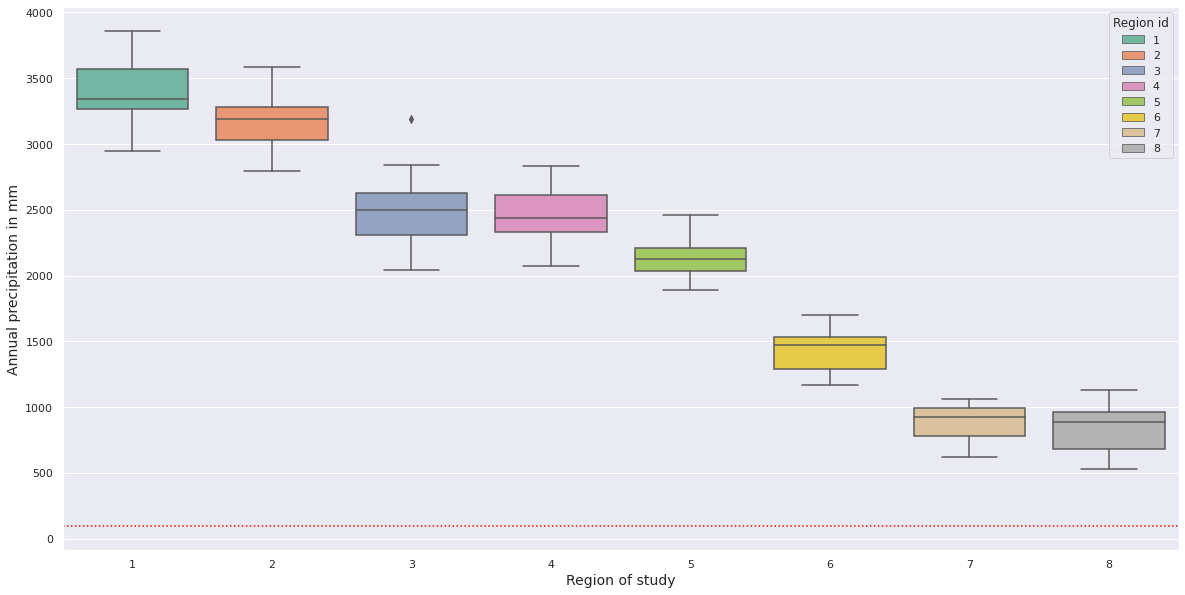

In [11]:
# Average annual monthly precipitation.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).sum().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='precipitation', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
plt.axhline(y = 100, color='red', linestyle='dotted')
graph.set_ylabel("Annual precipitation in mm",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")
fig.savefig("../../reports/figures/final/monthly_mean_precipitation_per_polygon") 

/tmp/ipykernel_2770583/1309001358.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


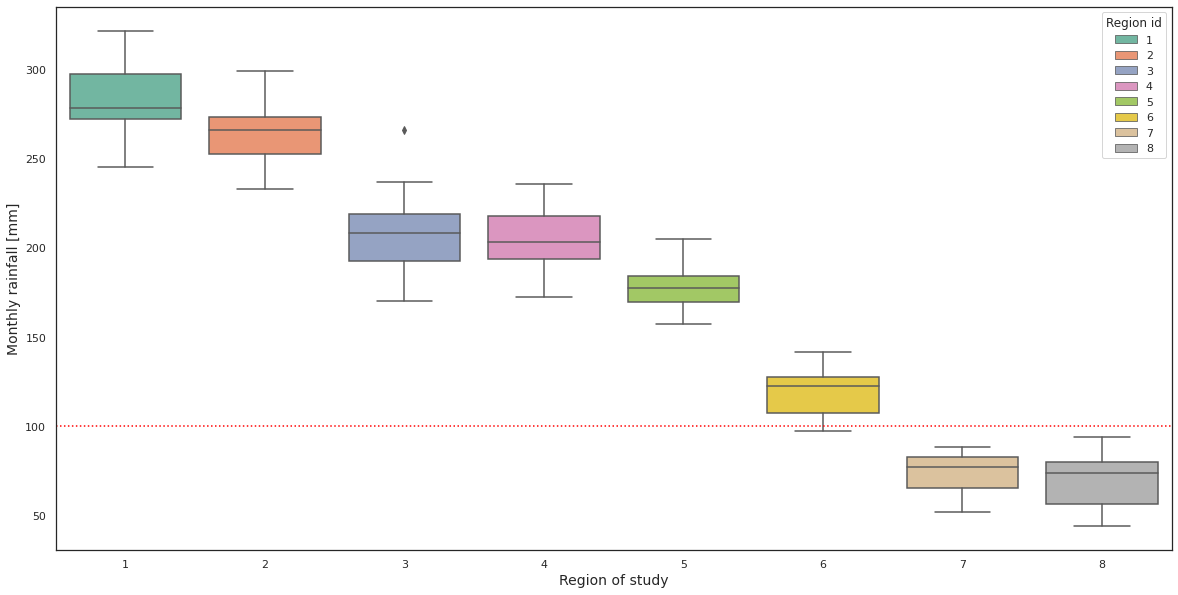

In [268]:
# Average annual monthly precipitation.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='precipitation', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
plt.axhline(y = 100, color='red', linestyle='dotted')
graph.set_ylabel("Monthly rainfall [mm]",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")
fig.savefig("../../reports/figures/final/monthly_mean_precipitation_per_polygon") 

/tmp/ipykernel_1653776/24801809.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


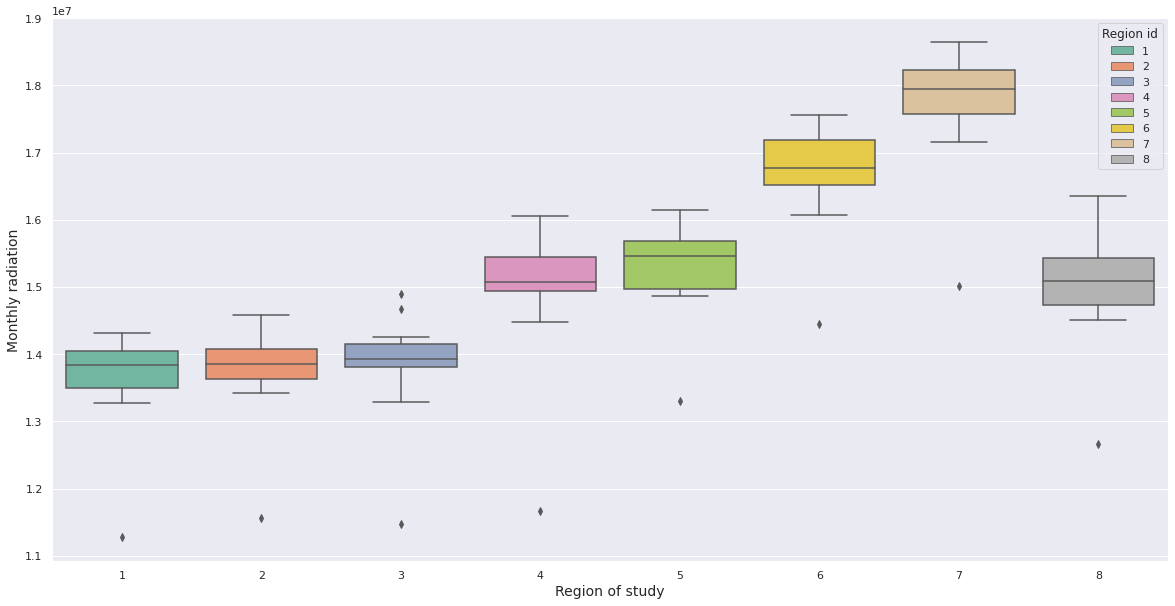

In [223]:
# Average annual monthly radiation.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='radiation', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
graph.set_ylabel("Monthly radiation",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")

/tmp/ipykernel_1653776/3951853773.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


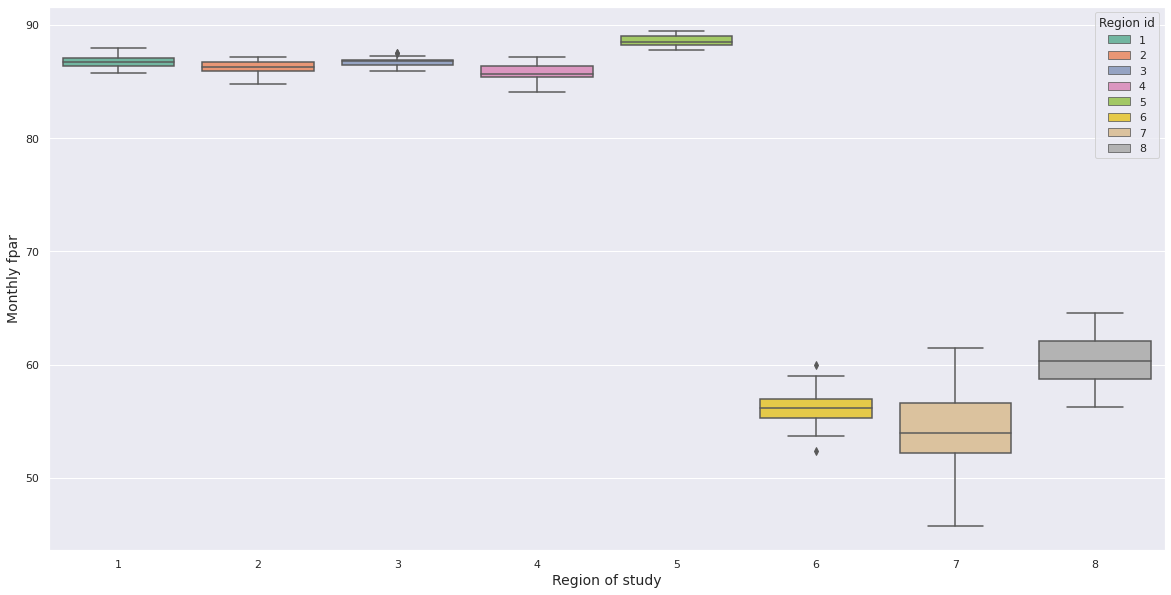

In [214]:
# Average annual monthly fpar.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='fpar', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
graph.set_ylabel("Monthly fpar",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")

/tmp/ipykernel_1653776/2885857347.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


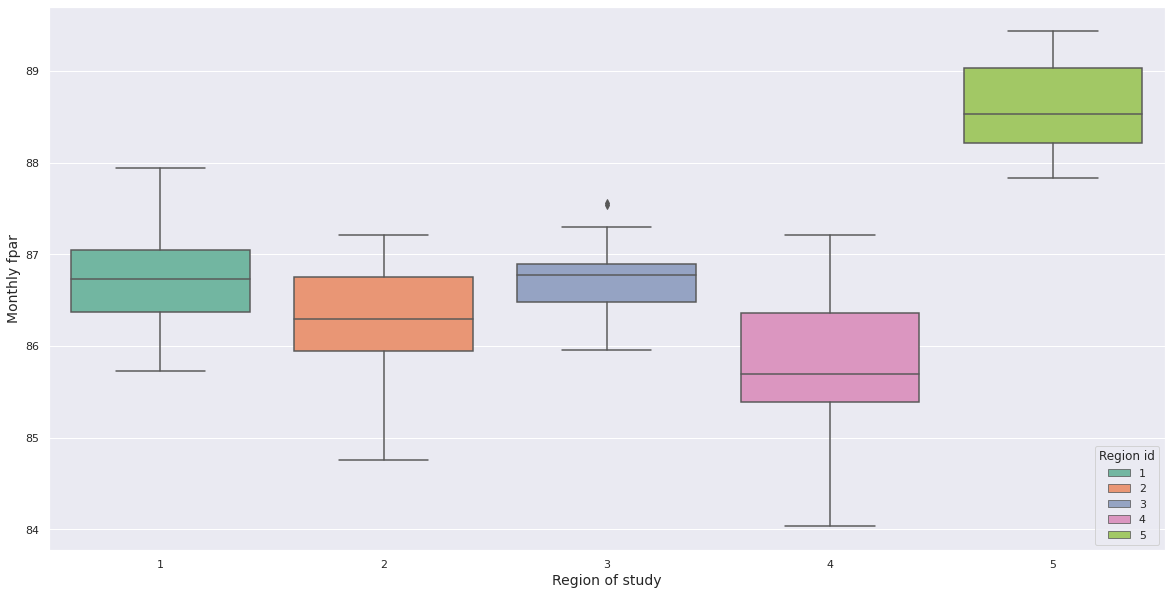

In [221]:
# Average annual monthly fpar.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly[yearly.polygon_id < 6], x='polygon_id', y='fpar', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
graph.set_ylabel("Monthly fpar",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "lower right", title="Region id")

/tmp/ipykernel_1653776/675661210.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


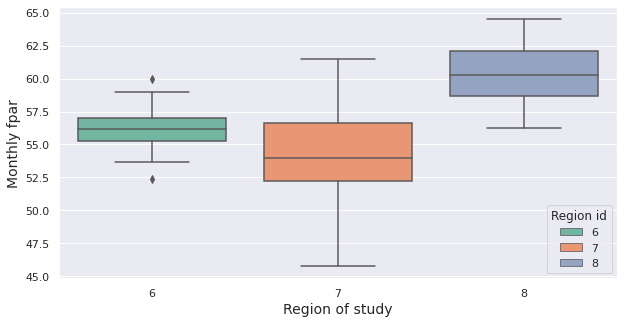

In [219]:
# Average annual monthly fpar.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly[yearly.polygon_id > 5], x='polygon_id', y='fpar', palette=palette, ax=ax, hue='polygon_id', dodge=False)
#graph.axes.set_title('Mean monthly rainfall for each region', fontsize=16)
graph.set_ylabel("Monthly fpar",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "lower right", title="Region id")

/tmp/ipykernel_1653776/2805590388.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


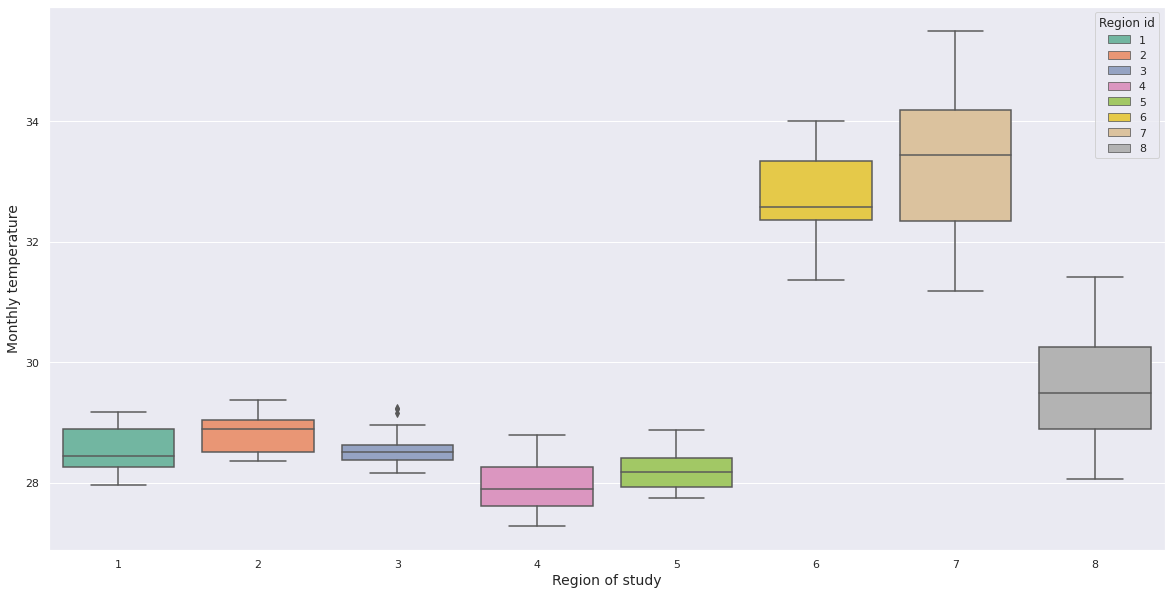

In [224]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='temperature', palette=palette, ax=ax, hue='polygon_id', dodge=False)
graph.set_ylabel("Monthly temperature",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")

/tmp/ipykernel_1653776/1097188160.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


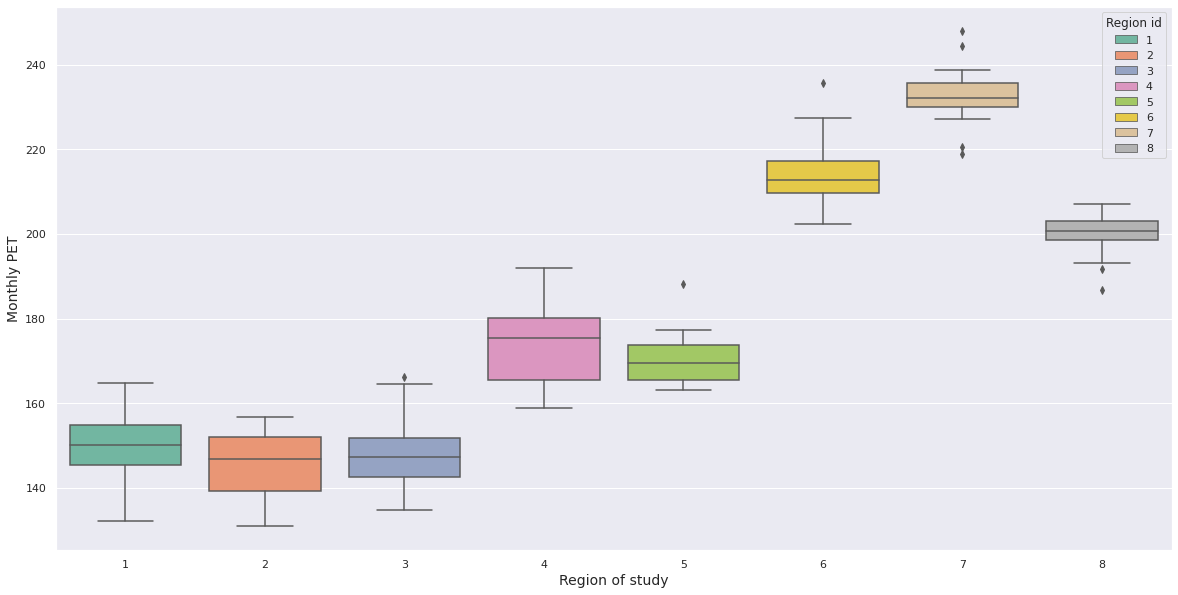

In [228]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='PET', palette=palette, ax=ax, hue='polygon_id', dodge=False)
graph.set_ylabel("Monthly PET",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")

/tmp/ipykernel_2770583/346916390.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()


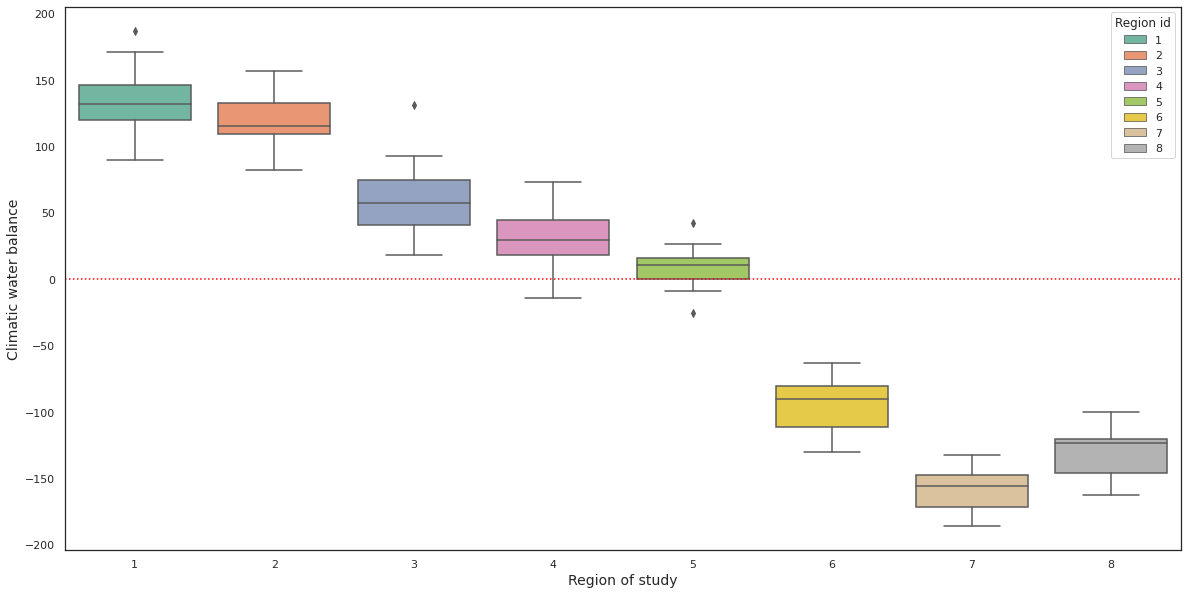

In [269]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
yearly = climate.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(yearly, x='polygon_id', y='P-PET', palette=palette, ax=ax, hue='polygon_id', dodge=False)
graph.set_ylabel("Climatic water balance",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
plt.axhline(y = 0, color='red', linestyle='dotted')
sns.move_legend(graph, "upper right", title="Region id")
fig.savefig("../../reports/figures/final/climatic_water_balance_per_polygon.png") 

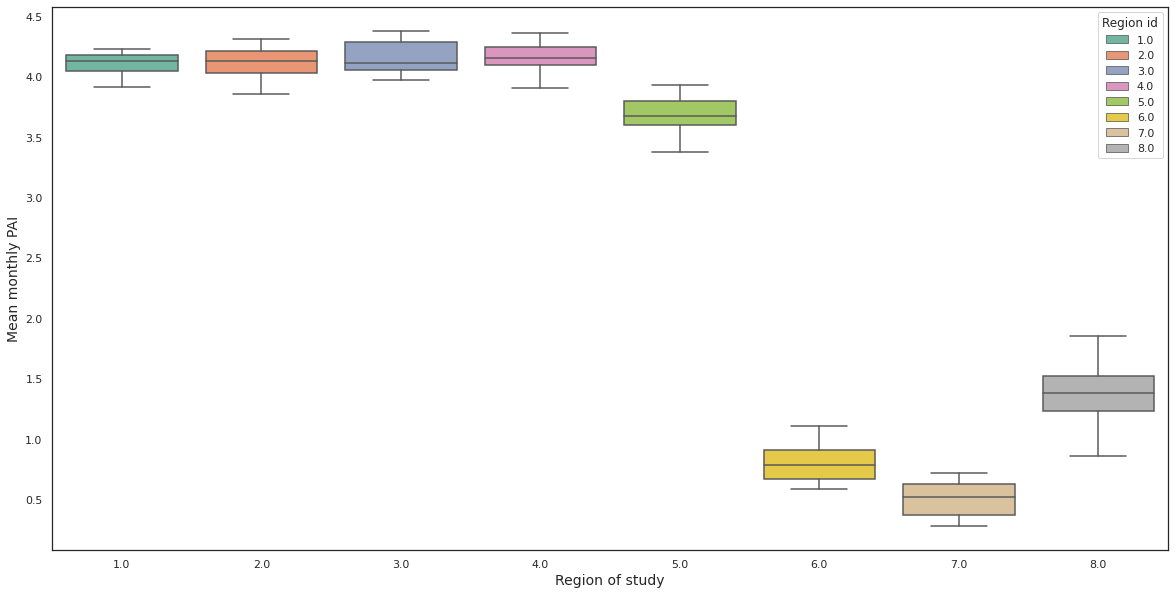

In [270]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#yearly = gedi.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(gedi, x='polygon_id', y='pai', palette=palette, ax=ax, hue='polygon_id', dodge=False)
graph.set_ylabel("Mean monthly PAI",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")
fig.savefig("../../reports/figures/final/monthly_pai_per_polygon.png") 

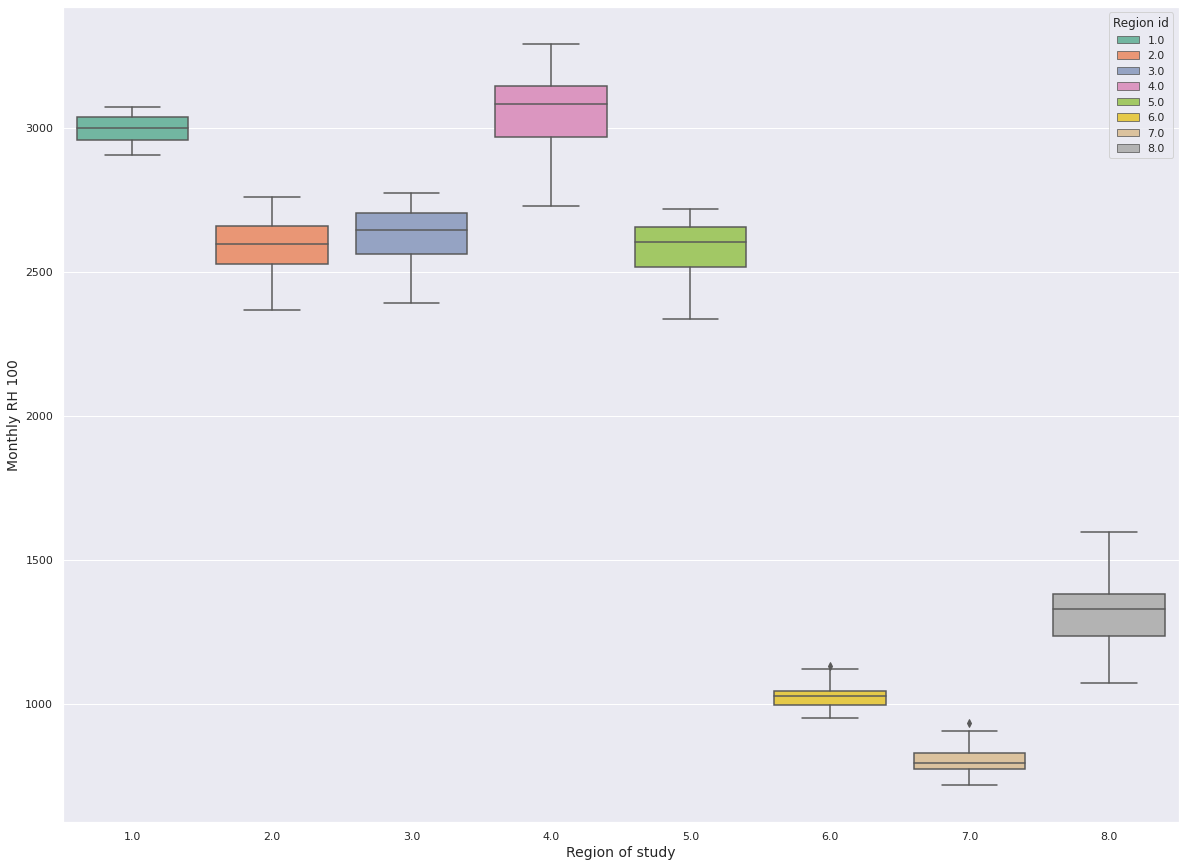

In [286]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
#yearly = gedi.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.boxplot(gedi, x='polygon_id', y='rh100', palette=palette, ax=ax, hue='polygon_id', dodge=False)
graph.set_ylabel("Monthly RH 100",fontsize=14)
graph.set_xlabel("Region of study",fontsize=14)
sns.move_legend(graph, "upper right", title="Region id")

/tmp/ipykernel_1653776/902545370.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  graph = sns.scatterplot(gedi[gedi.polygon_id < 6], x='pai', y='rh100', palette=palette, ax=ax, hue='polygon_id', s=93)


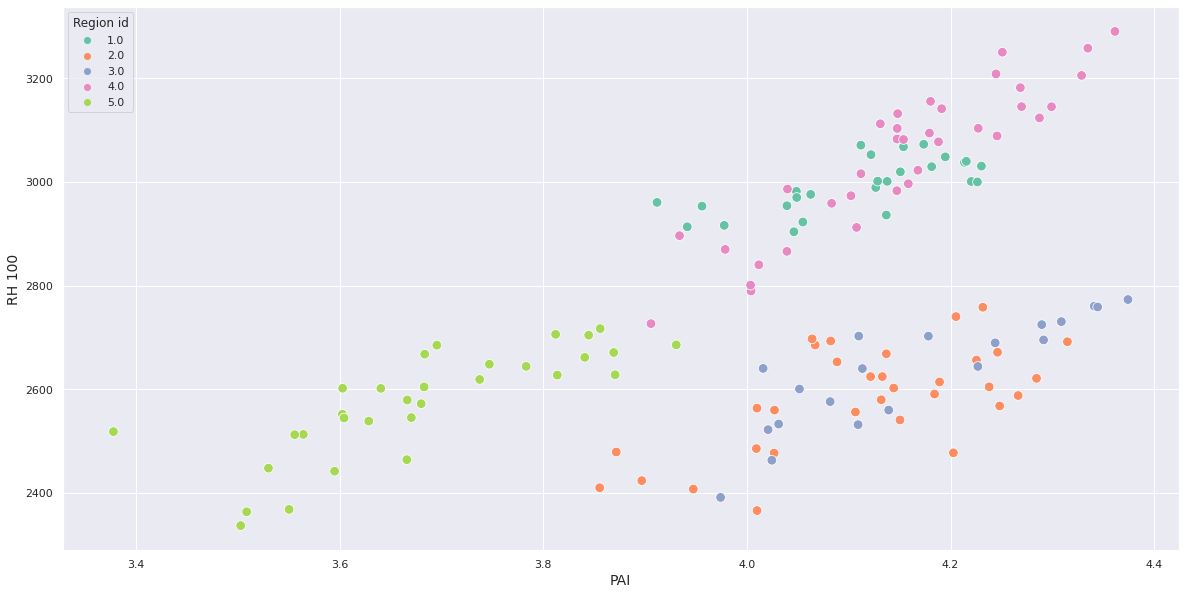

In [294]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#yearly = gedi.groupby(['polygon_id', 'year']).mean().reset_index()
graph = sns.scatterplot(gedi[gedi.polygon_id < 6], x='pai', y='rh100', palette=palette, ax=ax, hue='polygon_id', s=93)
graph.set_ylabel("RH 100",fontsize=14)
graph.set_xlabel("PAI",fontsize=14)
sns.move_legend(graph, "upper left", title="Region id")

In [291]:
# Get gedi footprints
gedi_footprints = pipeline.get_extended_gedi_footprints()

/tmp/ipykernel_1653776/4020638610.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  graph = sns.scatterplot(gedi_footprints[gedi_footprints.polygon_id < 6], x='pai', y='rh100', palette=palette, ax=ax, hue='polygon_id')


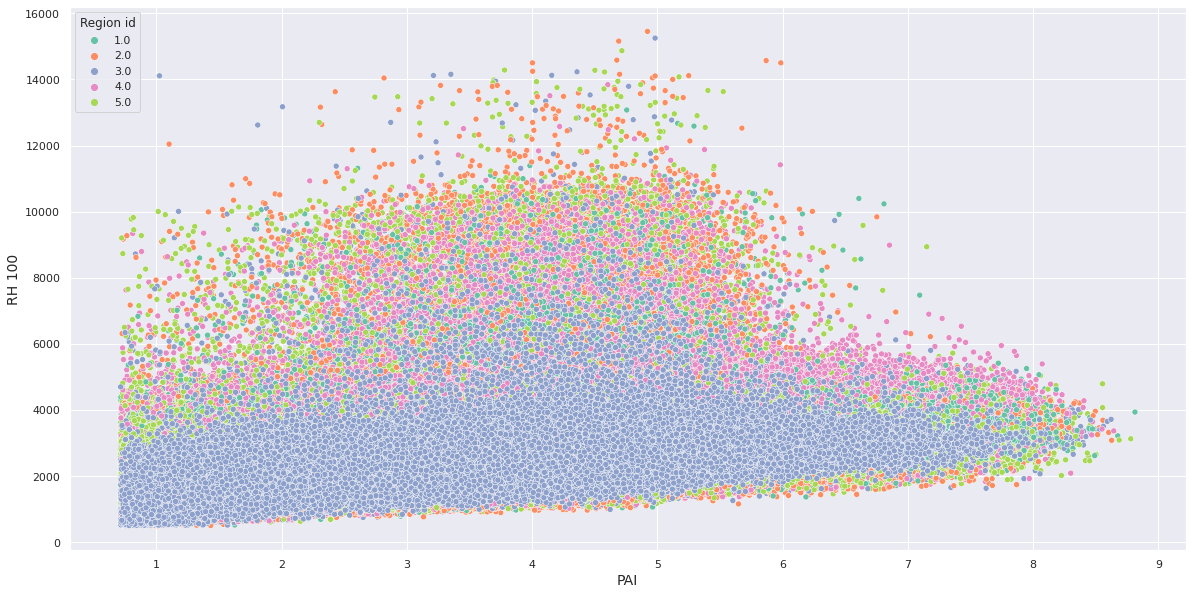

In [293]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
graph = sns.scatterplot(gedi_footprints[gedi_footprints.polygon_id < 6], x='pai', y='rh100', palette=palette, ax=ax, hue='polygon_id')
graph.set_ylabel("RH 100",fontsize=14)
graph.set_xlabel("PAI",fontsize=14)
sns.move_legend(graph, "upper left", title="Region id")

### Seasonal rainfall and dry season

In [51]:
climate_int['datetime'] = pd.to_datetime(climate_int.datetime)
climate_int.datetime

0      2001-01-01
176    2001-02-01
352    2001-03-01
528    2001-04-01
704    2001-05-01
          ...    
1407   2022-08-01
1583   2022-09-01
1759   2022-10-01
1935   2022-11-01
2111   2022-12-01
Name: datetime, Length: 2112, dtype: datetime64[ns]

In [75]:
def format_date(ax):
    for row in ax:
        for axis in row:
            #locator = mdates.AutoDateLocator(minticks=10, maxticks=17)
            locator = mdates.MonthLocator(bymonth=[1, 7])
            axis.xaxis.set_major_locator(locator) 
            axis.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
            x_axis = axis.axes.get_xaxis()
            x_axis.set_label_text('')

def format_date_long_ts(ax):
    for row in ax:
        for axis in row:
            #locator = mdates.AutoDateLocator(minticks=10, maxticks=17)
            locator = mdates.YearLocator()
            axis.xaxis.set_major_locator(locator) 
            axis.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
            x_axis = axis.axes.get_xaxis()
            x_axis.set_label_text('')

def draw_horizontal(ax):
    for row in ax:
        for axis in row:
            axis.axhline(y = 100, color='red', linestyle='dotted')

In [5]:
climate

month  polygon_id  year    datetime   date  precipitation     radiation  \
0         1           1  2001  2001-01-01  01-01     287.395210  1.444521e+07   
1         1           1  2002  2002-01-01  01-02     156.436205  1.615154e+07   
2         1           1  2003  2003-01-01  01-03     192.224859  1.589504e+07   
3         1           1  2004  2004-01-01  01-04     124.213303  1.687764e+07   
4         1           1  2005  2005-01-01  01-05     168.052640  1.612343e+07   
...     ...         ...   ...         ...    ...            ...           ...   
2107     12           8  2018  2018-12-01  12-18     204.183599  1.699328e+07   
2108     12           8  2019  2019-12-01  12-19     102.111351  1.882574e+07   
2109     12           8  2020  2020-12-01  12-20      33.831942  2.017654e+07   
2110     12           8  2021  2021-12-01  12-21     426.831726  1.296895e+07   
2111     12           8  2022  2022-12-01  12-22     385.430891           NaN   

      temperature       fpar         PET       P-PET  
0       28.270778  88.894826  176.270066  111.125144  
1       29.185926  89.622120  207.440509  -51.004304  
2       29.337065  89.497615  178.266904   13.957954  
3       29.124262  89.349133  184.652791  -60.439488  
4       28.732862  89.272441  175.966823   -7.914183  
...           ...        ...         ...         ...  
2107    30.129621  69.579149  250.800548  -46.616949  
2108    32.419237  60.315467  253.403838 -151.292487  
2109    29.424621  67.737927  274.013432 -240.181489  
2110    28.630775  62.093750  232.133668  194.698058  
2111    27.971455  74.463166  201.617435  183.813456  

[2112 rows x 11 columns]

In [6]:
climate_int = interpolate.interpolate_using_linear(climate, ['precipitation', 'radiation', 'temperature', 'fpar', 'PET', 'P-PET'])

In [ ]:
# Average annual monthly temperature.
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
graph = sns.lineplot(, x='pai', y='rh100', palette=palette, ax=ax, hue='polygon_id')
graph.set_ylabel("RH 100",fontsize=14)
graph.set_xlabel("PAI",fontsize=14)
sns.move_legend(graph, "upper left", title="Region id")

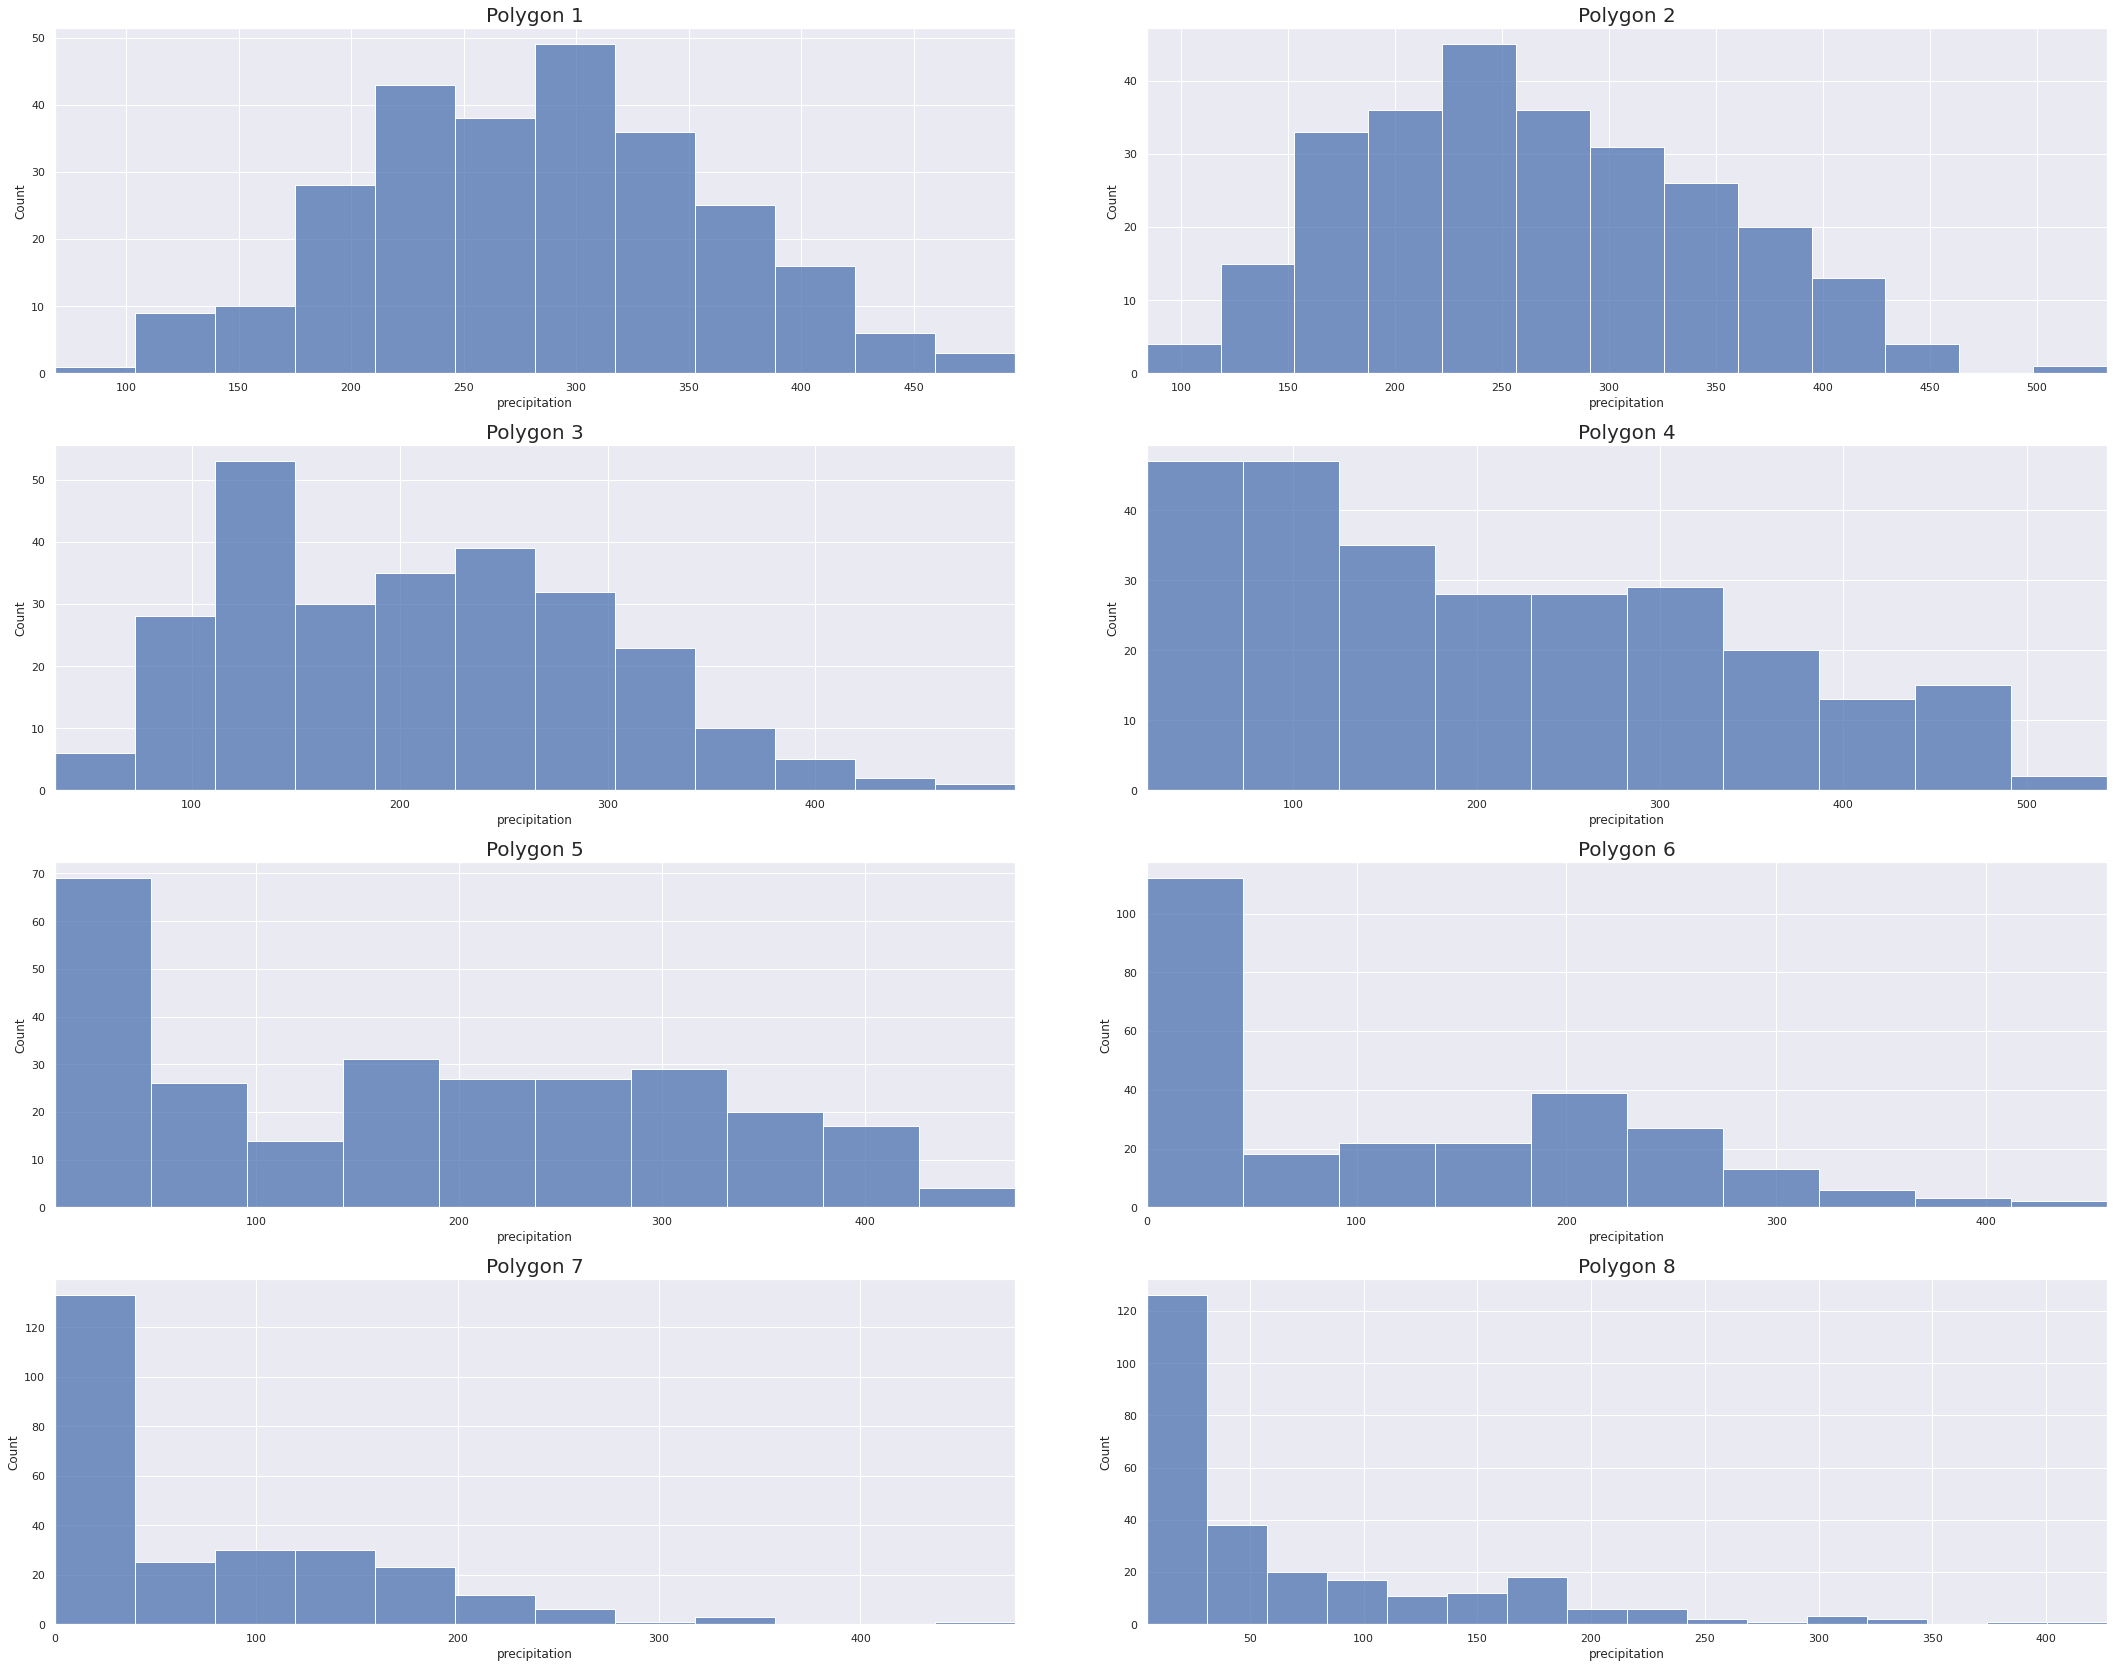

In [172]:

def plot_histogram(df, ax):
    sns.histplot(df, x='precipitation', ax=ax)
    ax.margins(x=0)
fig, ax = plot.plot_per_polygon(climate, "", lambda df, ax: plot_histogram(df, ax))
#plt.margins(x=0)
#format_date_long_ts(ax)
#fig.autofmt_xdate()

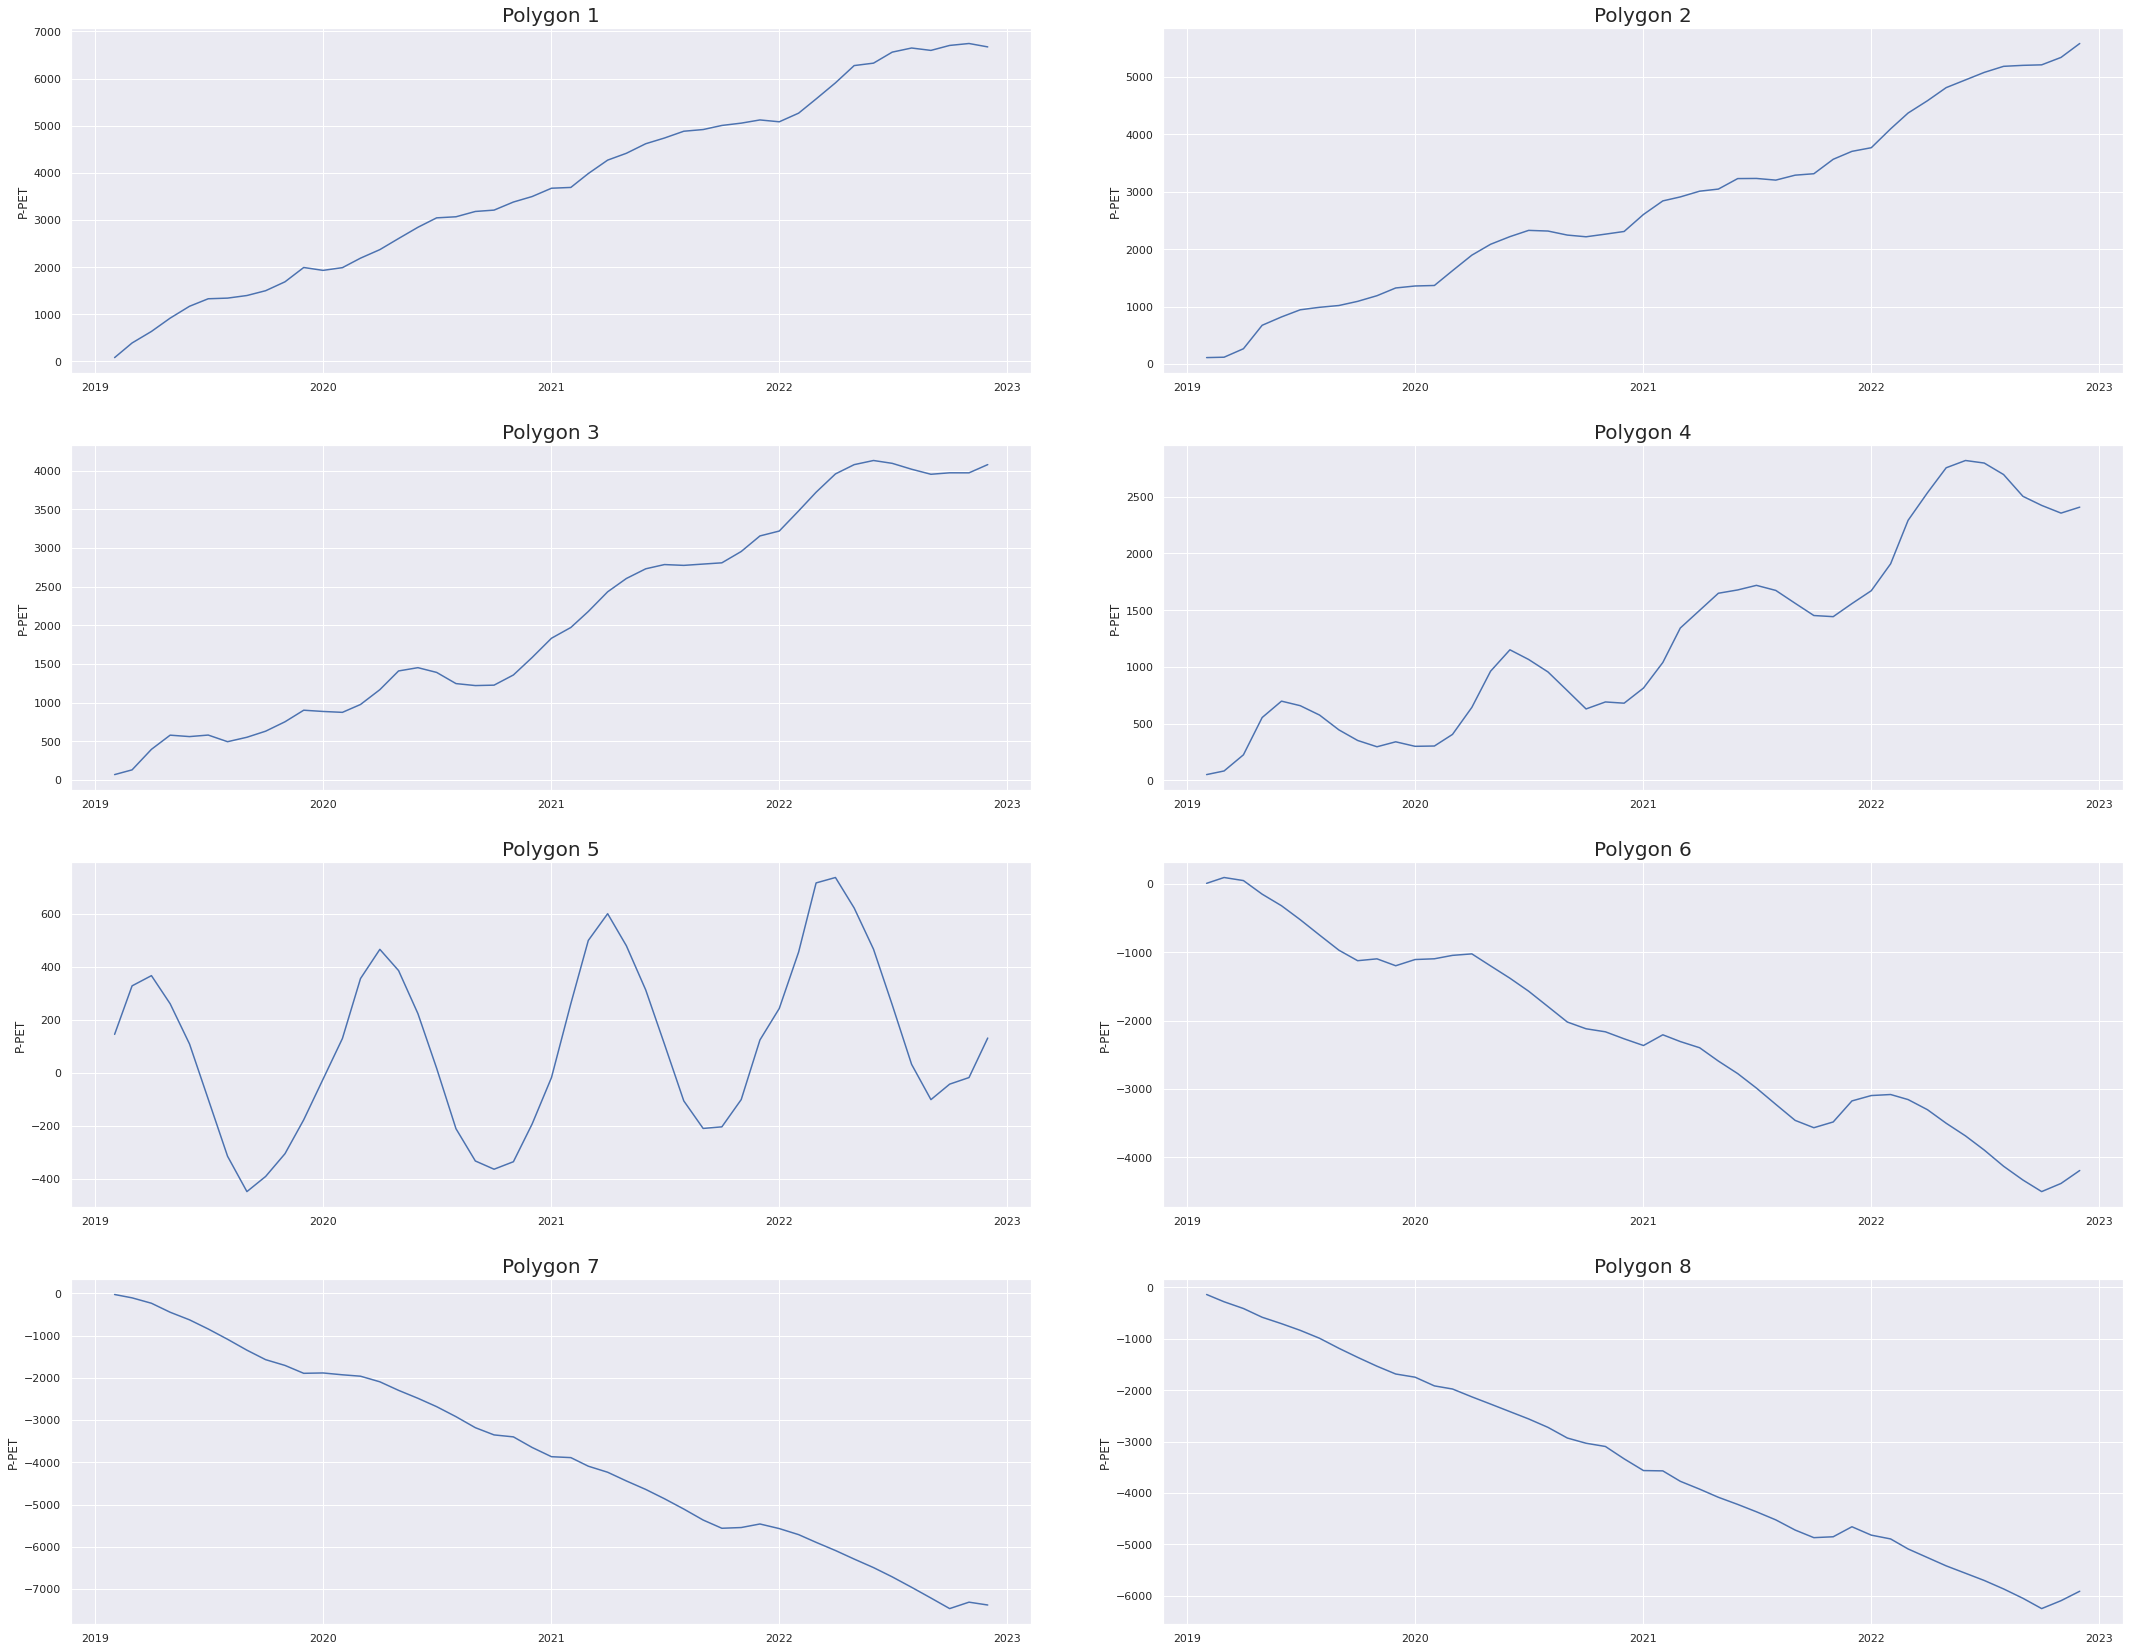

In [111]:

fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2019-01-01'], "", lambda df, ax: sns.lineplot(x=df.datetime, y=df['P-PET'].cumsum(), ax=ax))
format_date_long_ts(ax)
#fig.autofmt_xdate()

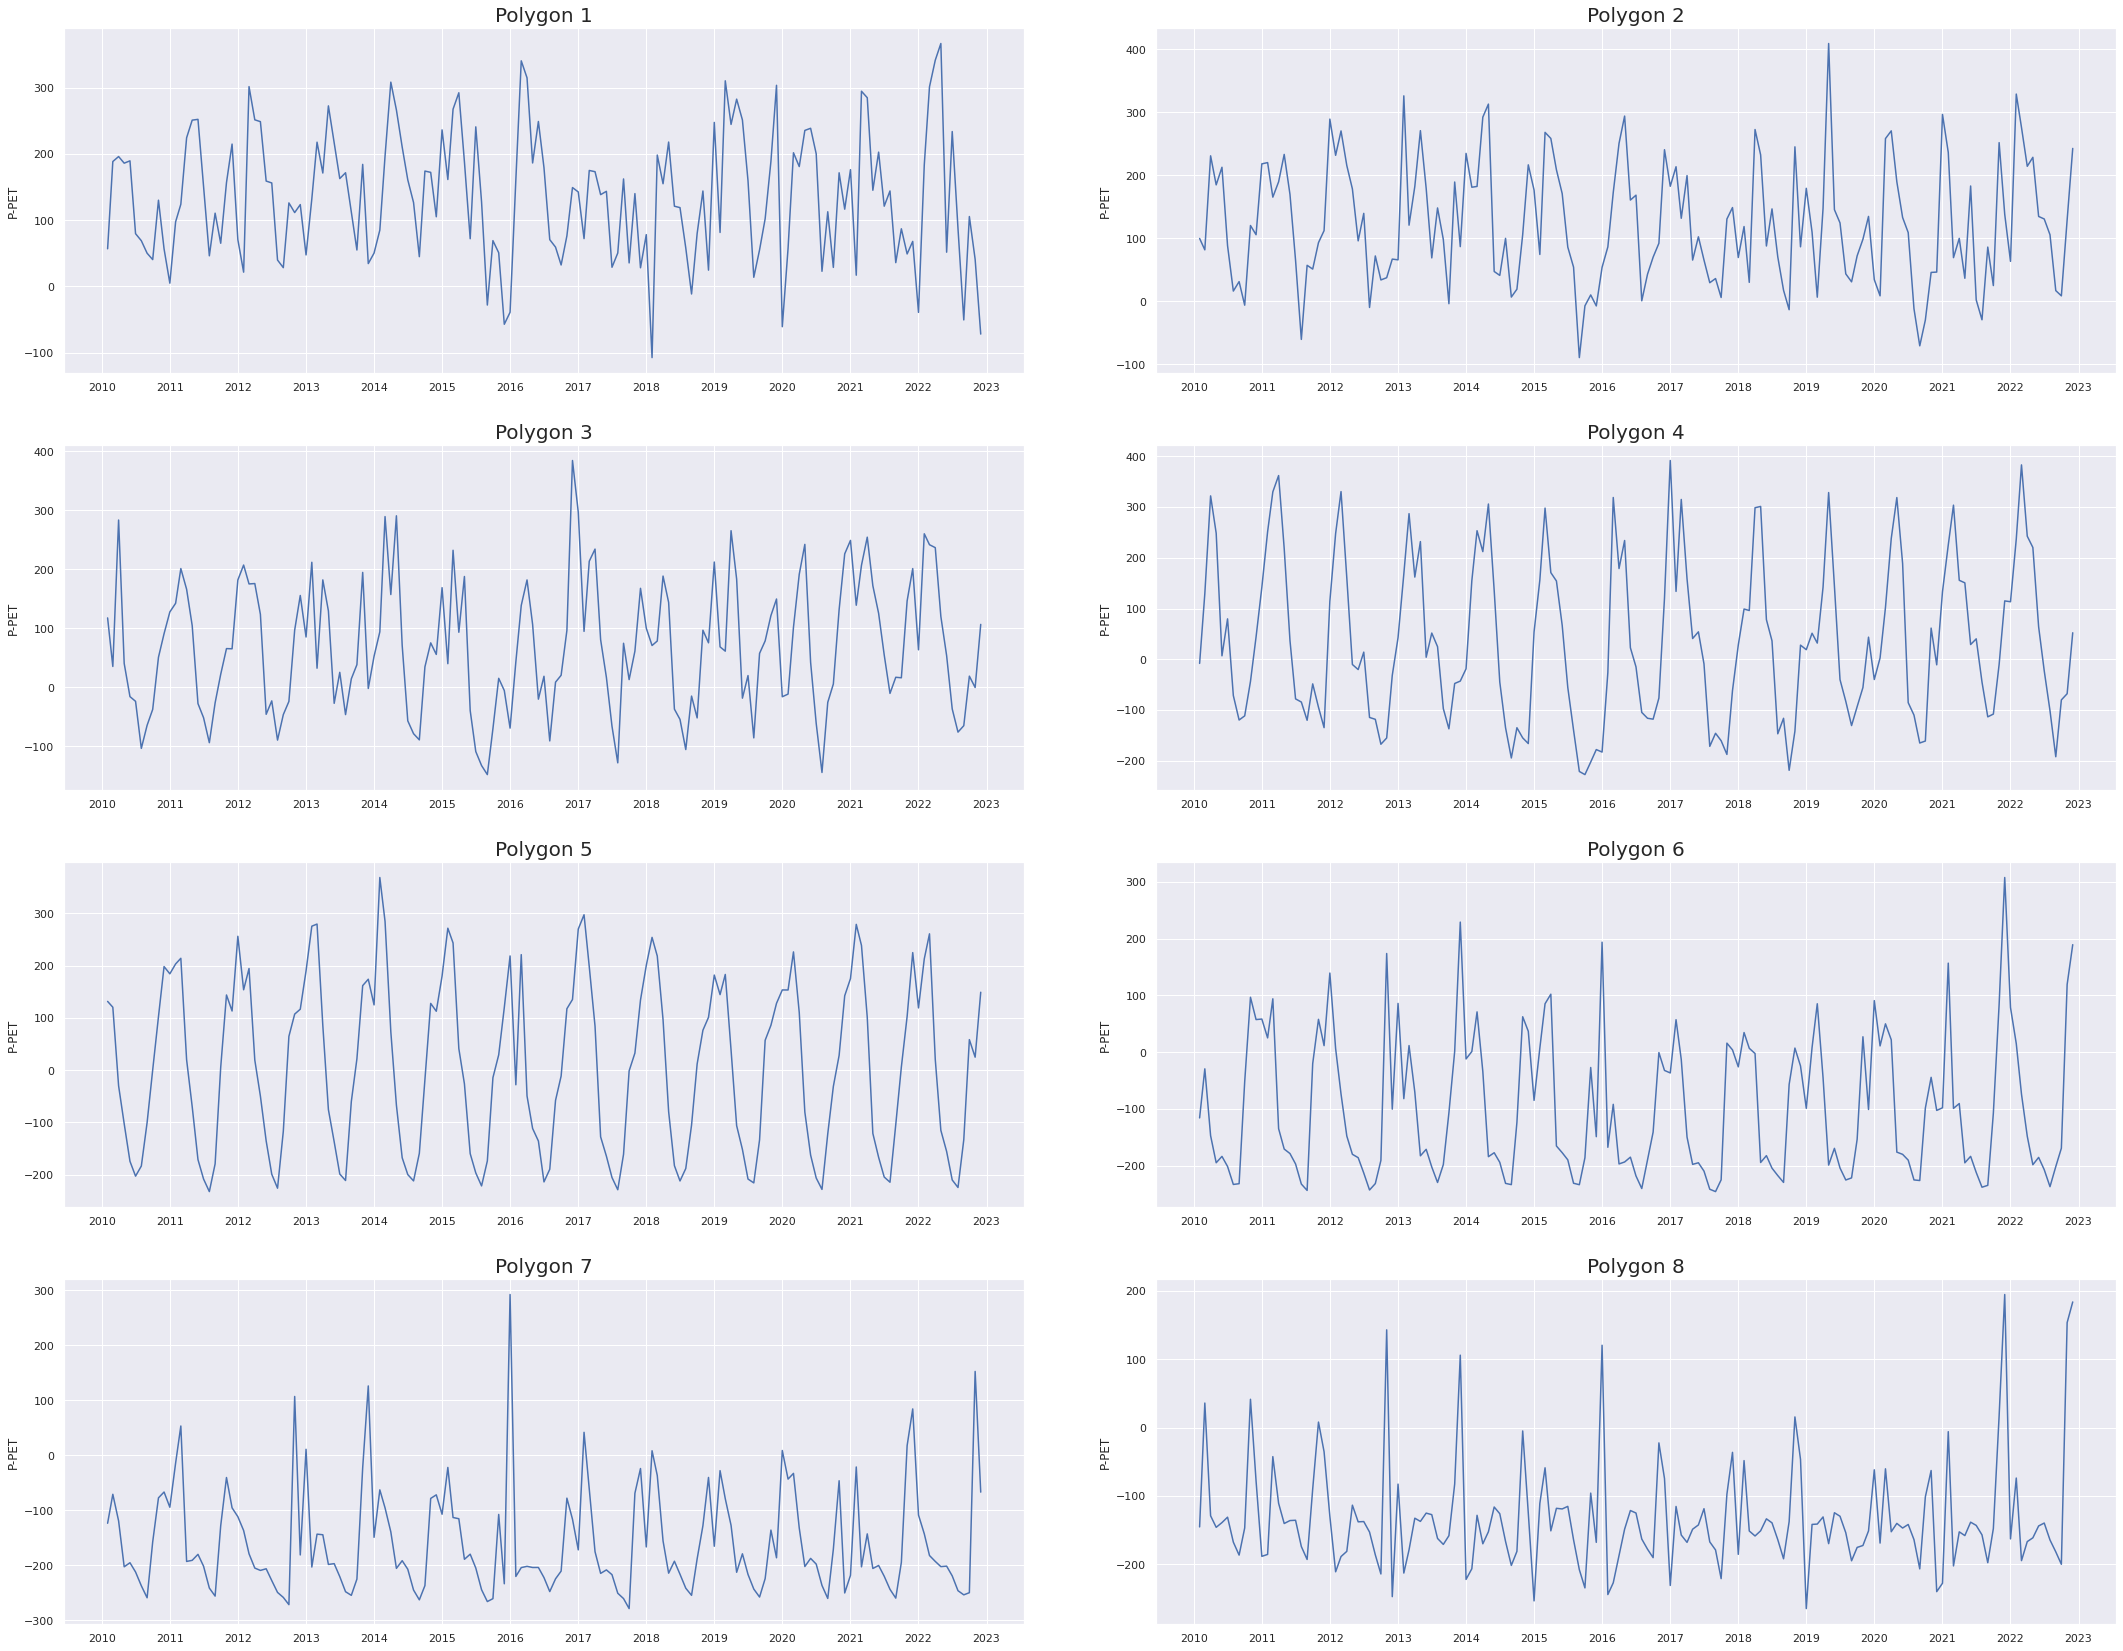

In [107]:
fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2010-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='P-PET', ax=ax))
format_date_long_ts(ax)
#fig.autofmt_xdate()

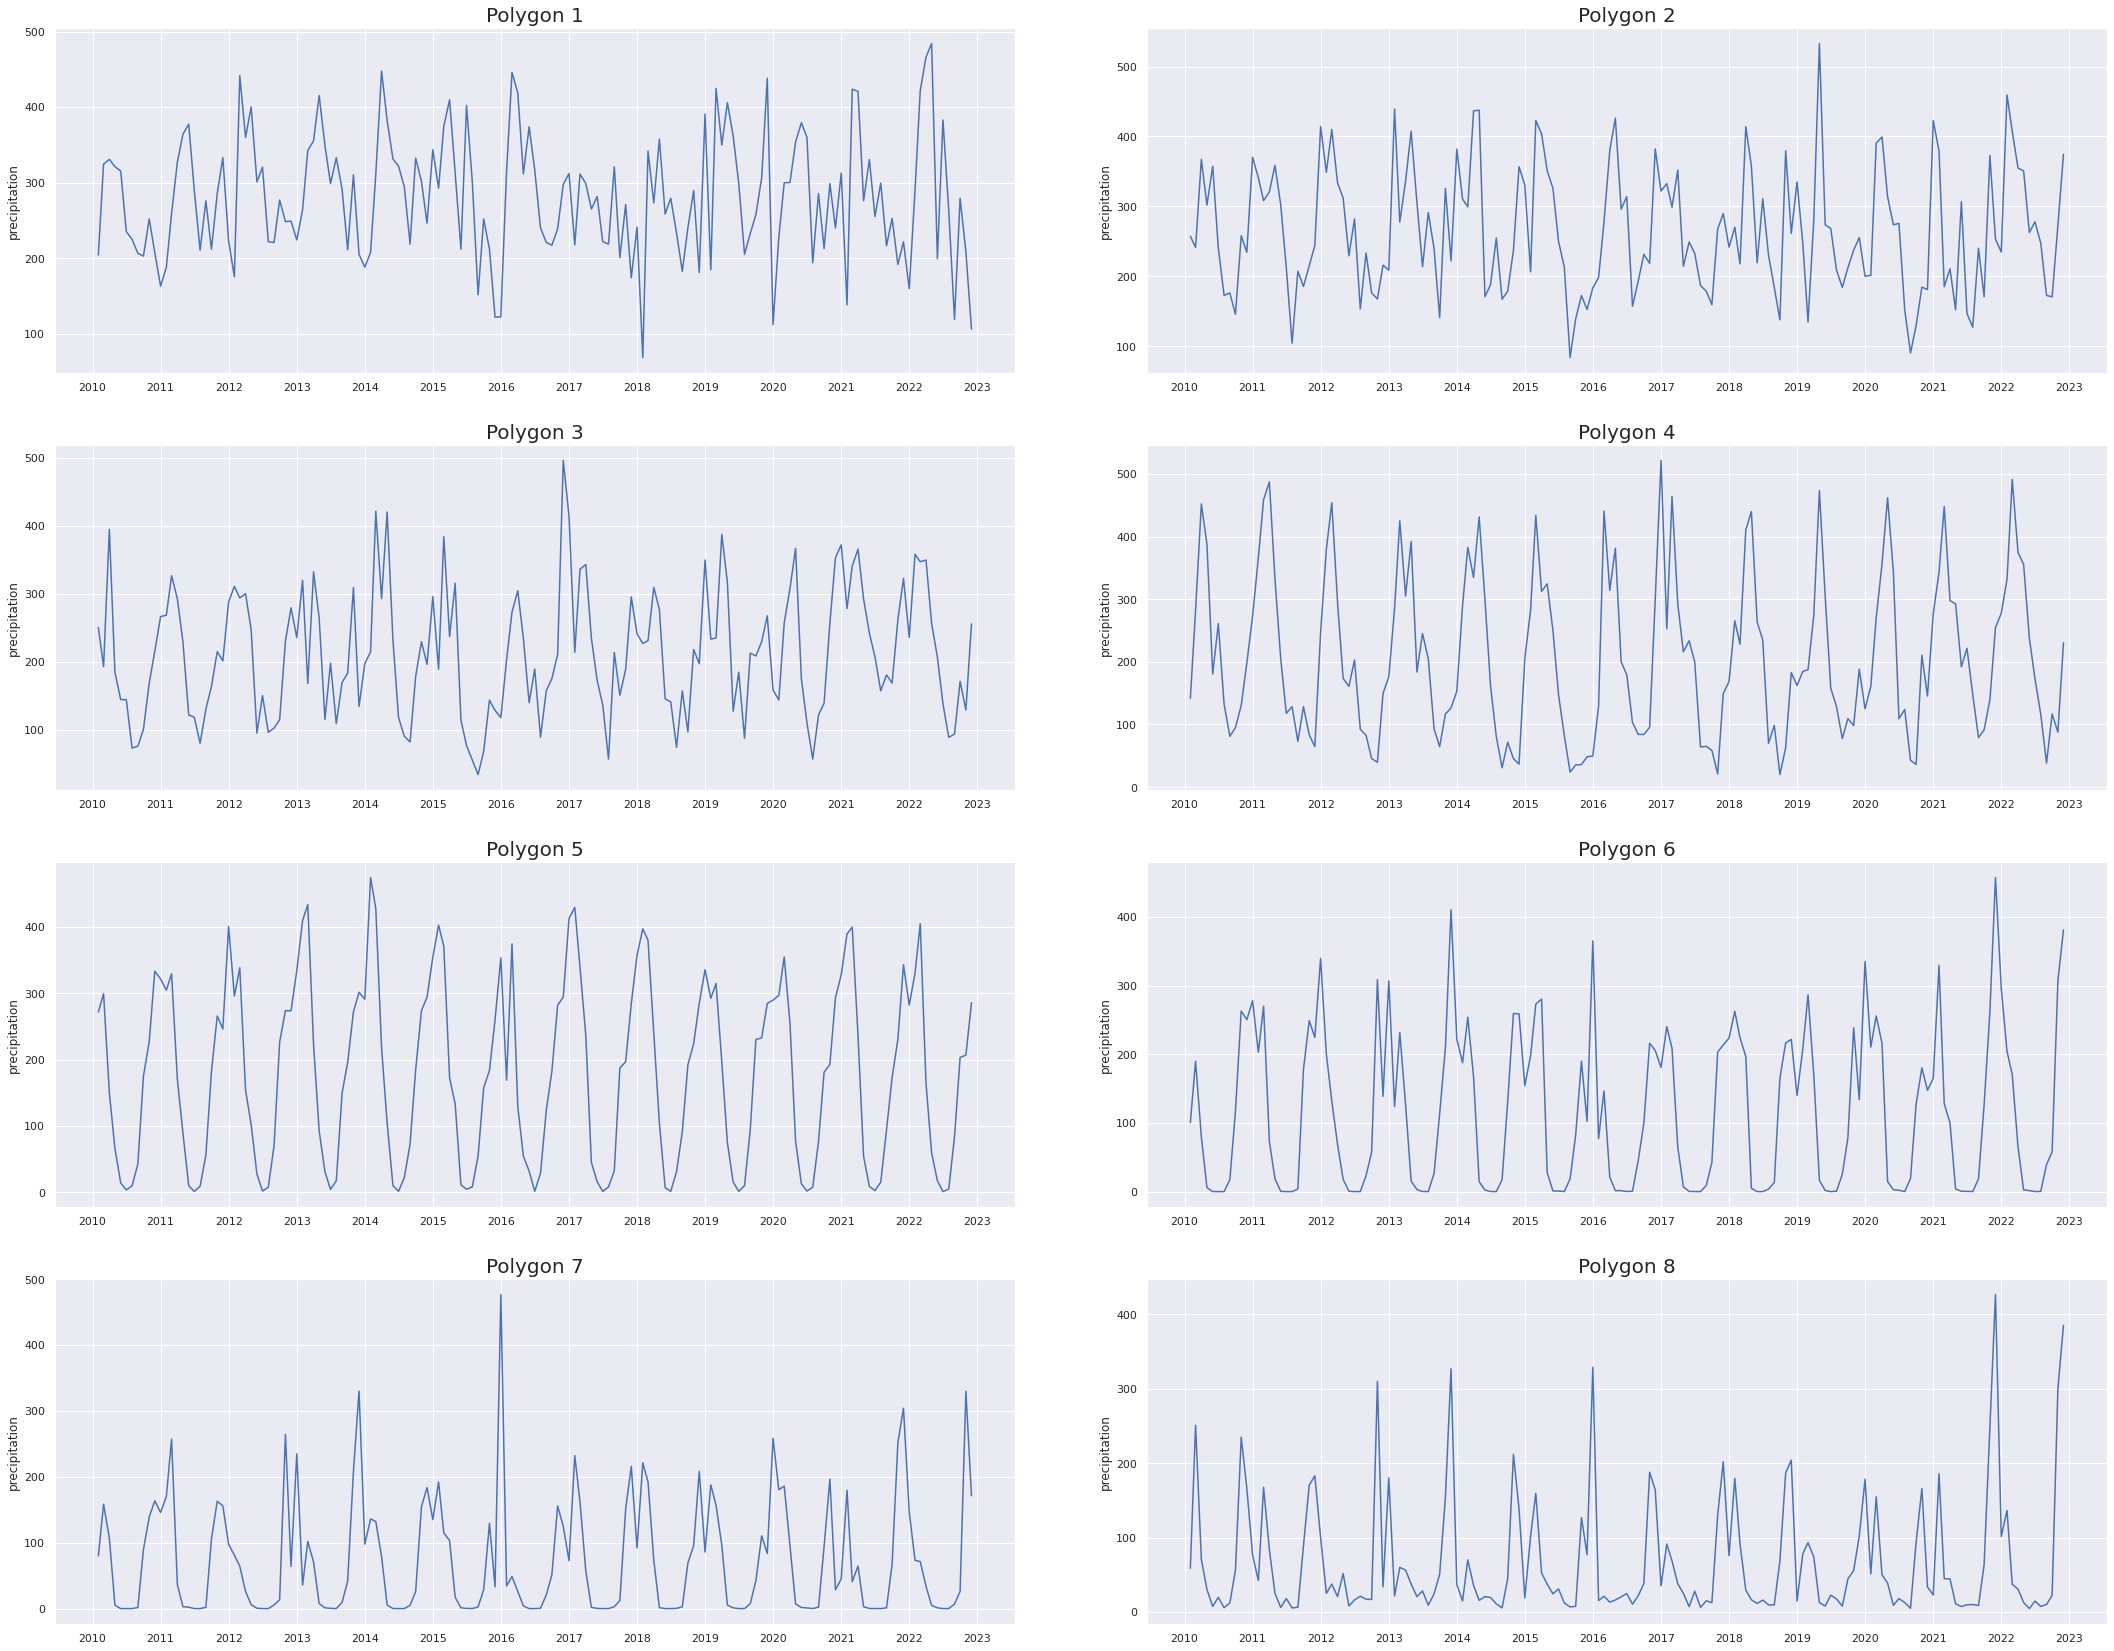

In [78]:
fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2010-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date_long_ts(ax)
#fig.autofmt_xdate()

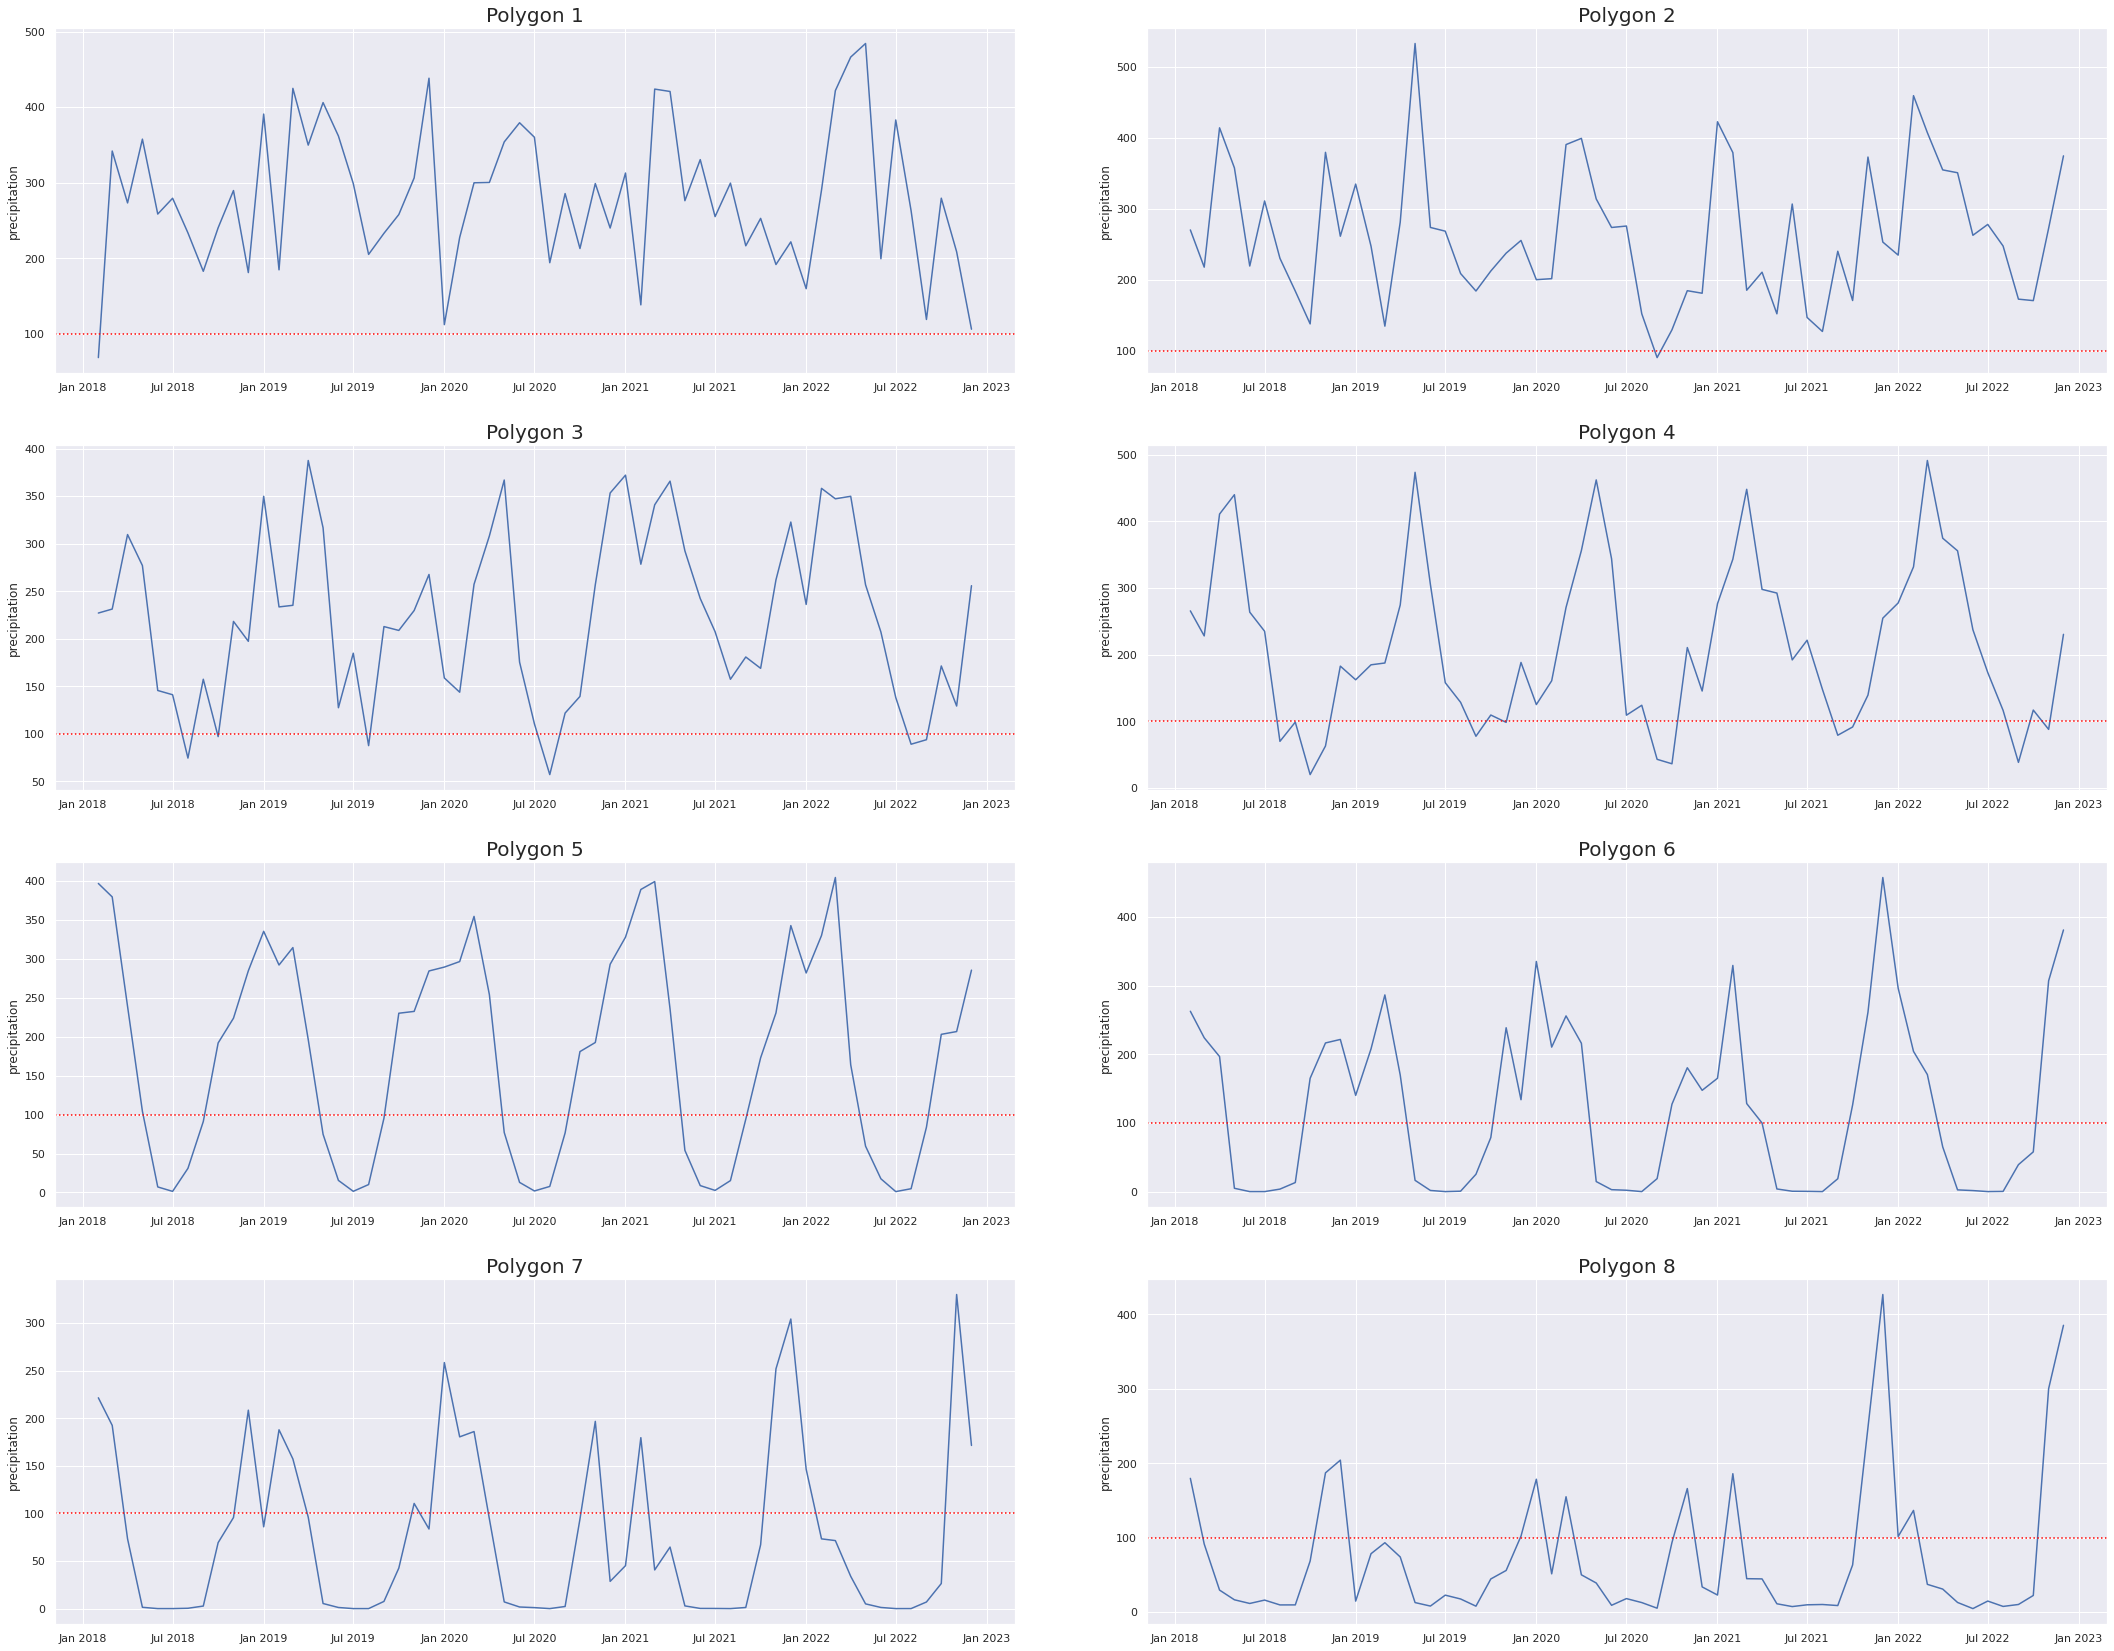

In [62]:
fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2018-1-1'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date(ax)
#fig.autofmt_xdate()

In [80]:
climate_ts = climate_int[climate_int.datetime > '2010-01-01']
climate_seasonal = seasonal.get_ts_seasonal_component_per_polygon(climate_ts, climate_ts.datetime.min(), climate_ts.datetime.max(), columns=climate_columns)
climate_trend = seasonal.get_ts_trend_component_per_polygon(climate_ts, climate_ts.datetime.min(), climate_ts.datetime.max(), columns=climate_columns)

In [81]:
climate_trend = seasonal.get_ts_trend_component_per_polygon(climate_ts, climate_ts.datetime.min(), climate_ts.datetime.max(), columns=climate_columns)

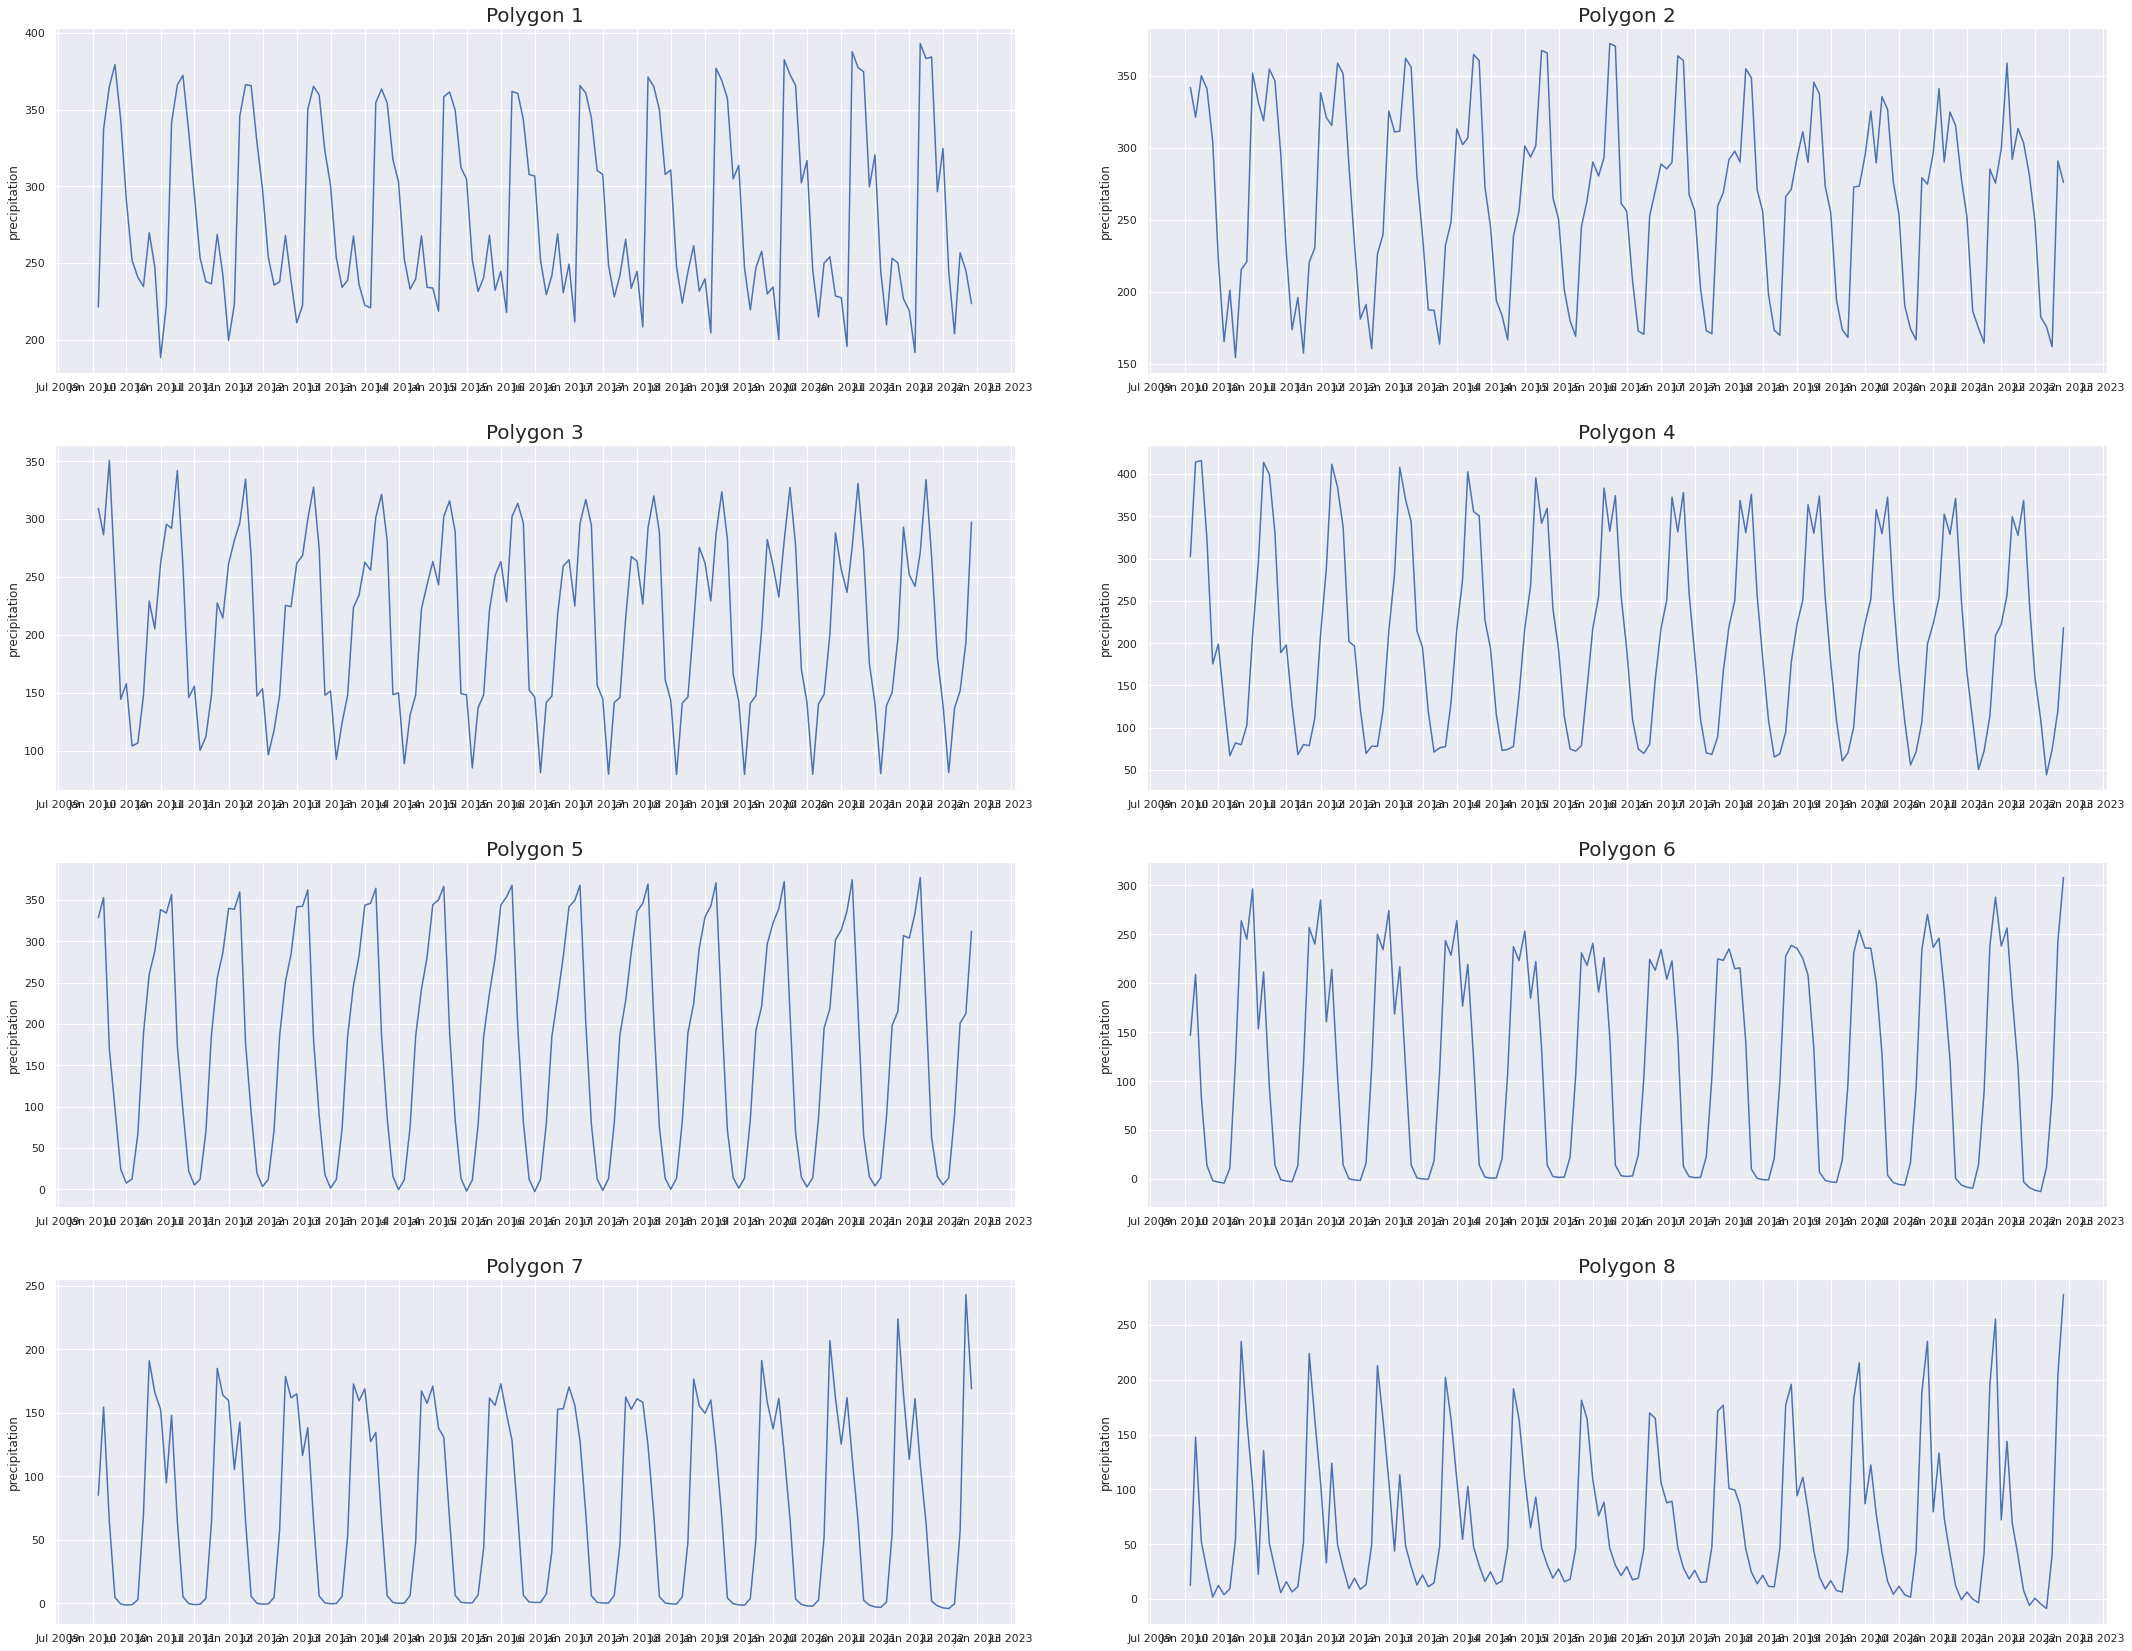

In [82]:
fig, ax = plot.plot_per_polygon(climate_seasonal, "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date(ax)
#fig.autofmt_xdate()

In [86]:
climate_ts_short = climate_int[climate_int.datetime > '2019-01-01']
climate_seasonal_short = seasonal.get_ts_seasonal_component_per_polygon(climate_ts_short, climate_ts_short.datetime.min(), climate_ts_short.datetime.max(), columns=climate_columns)
climate_trend_short= seasonal.get_ts_trend_component_per_polygon(climate_ts_short, climate_ts_short.datetime.min(), climate_ts_short.datetime.max(), columns=climate_columns)

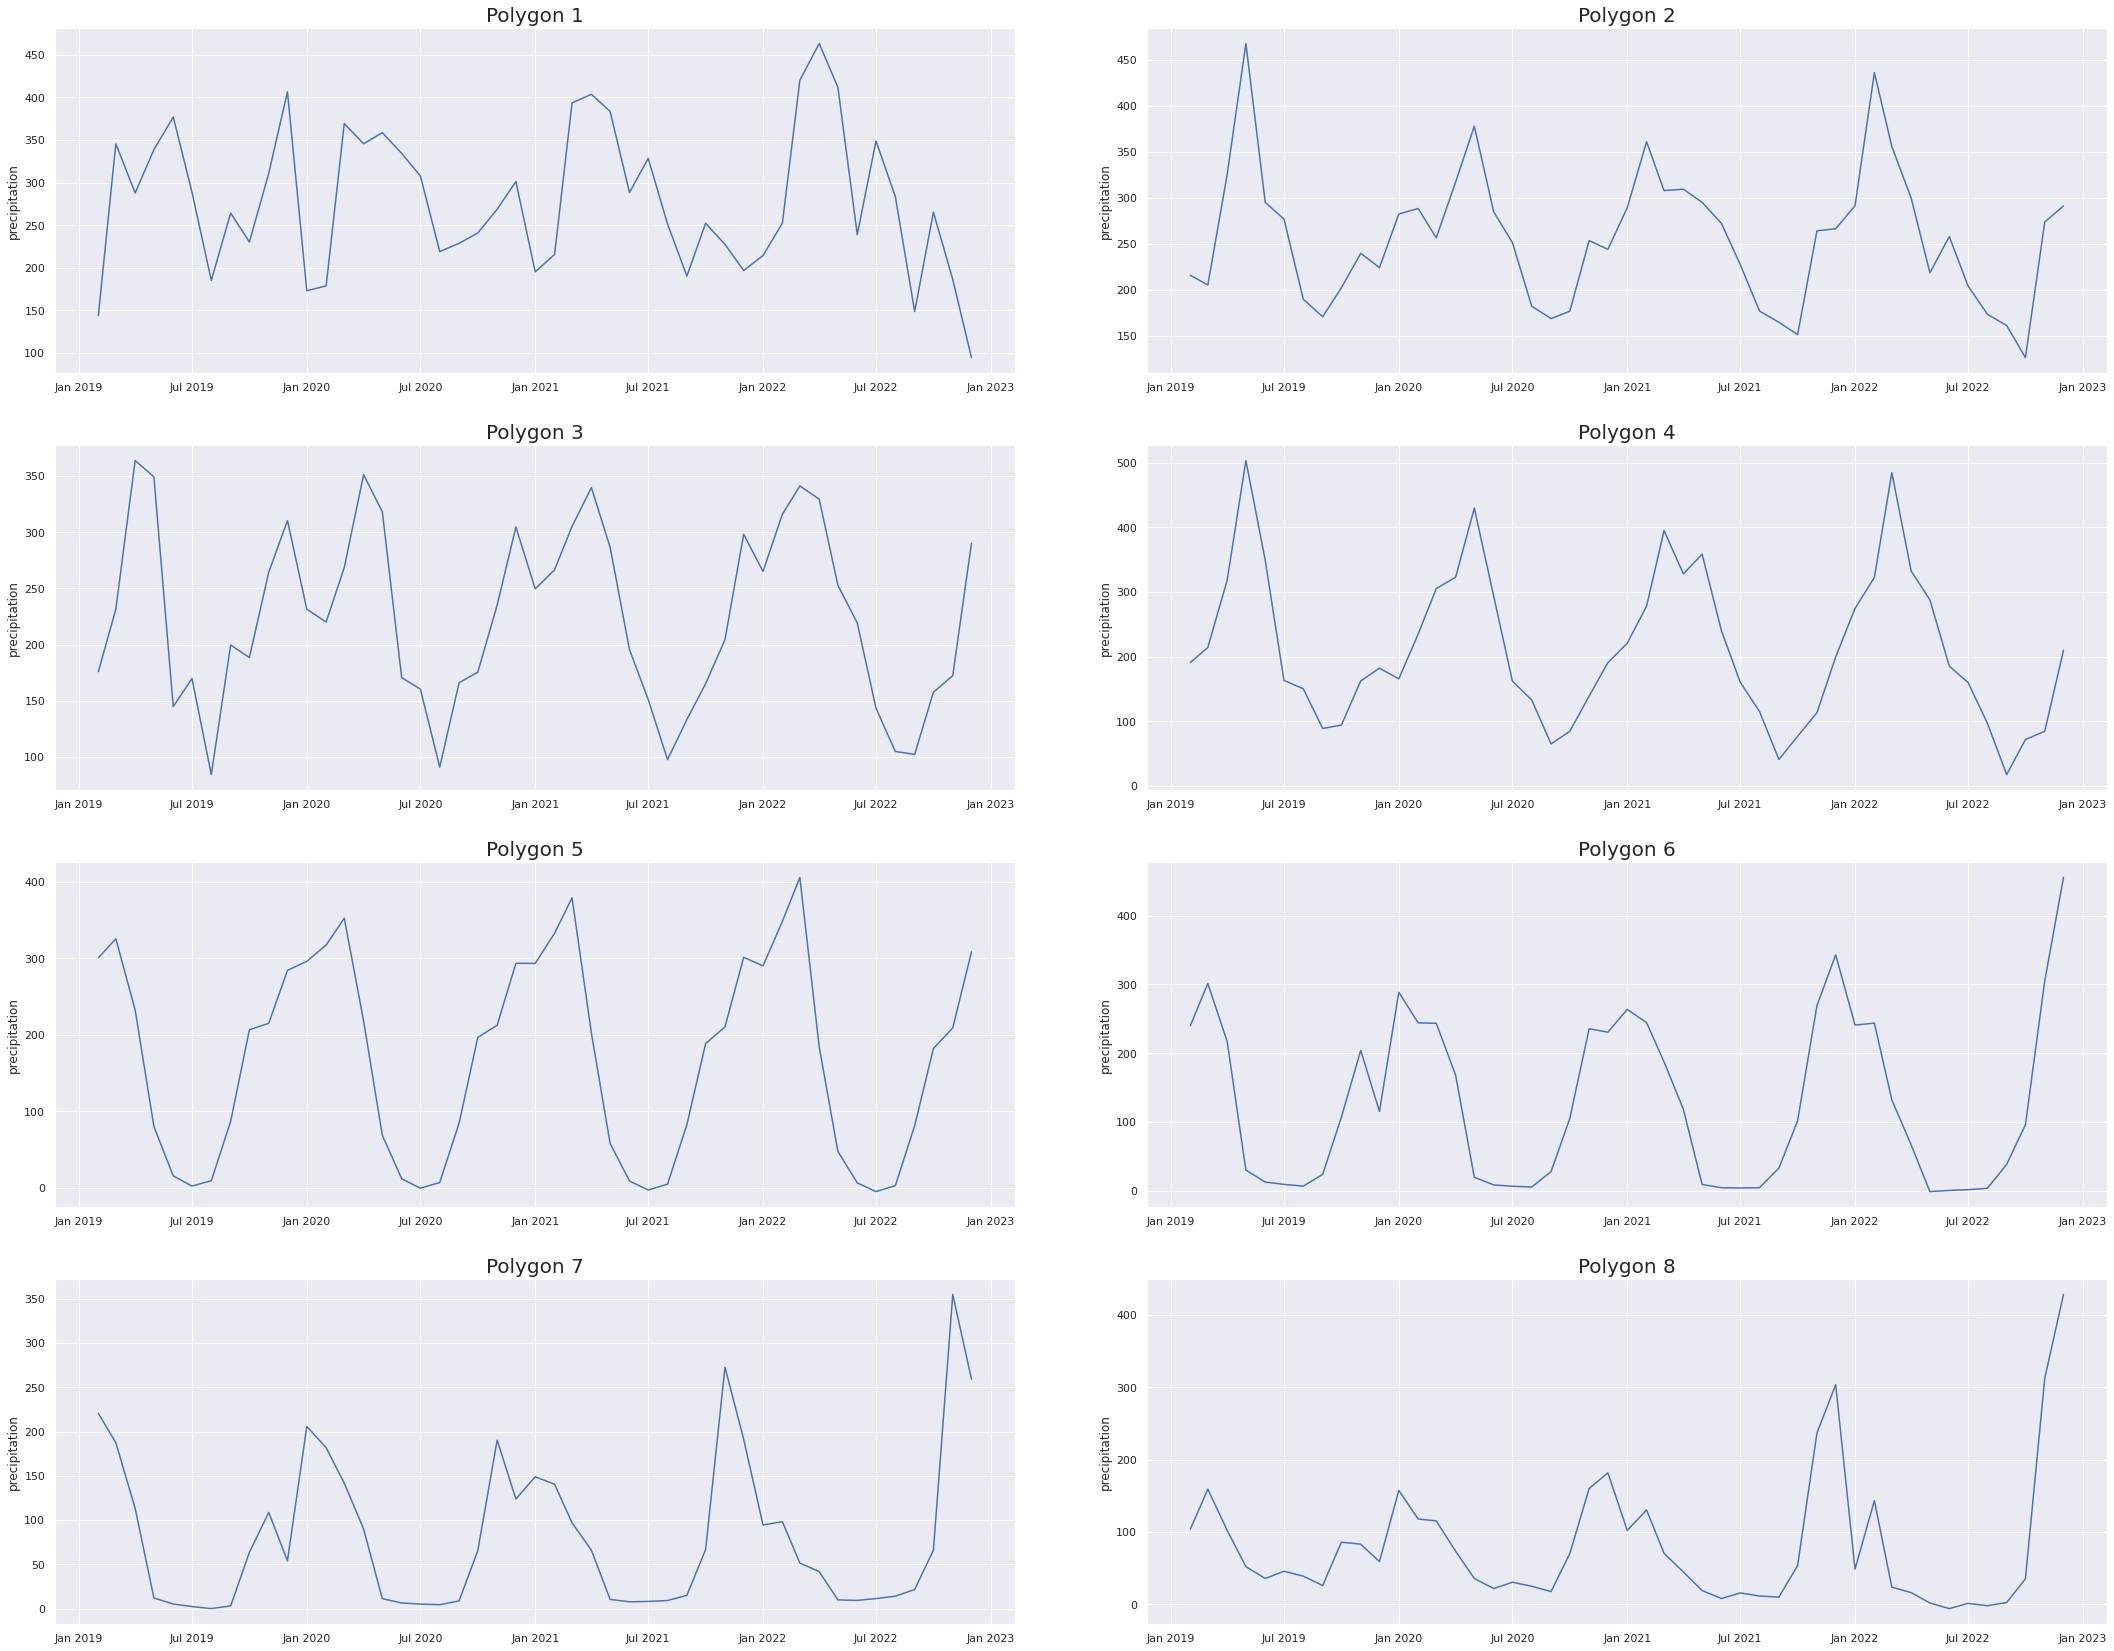

In [87]:
fig, ax = plot.plot_per_polygon(climate_seasonal_short, "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date(ax)
#fig.autofmt_xdate()

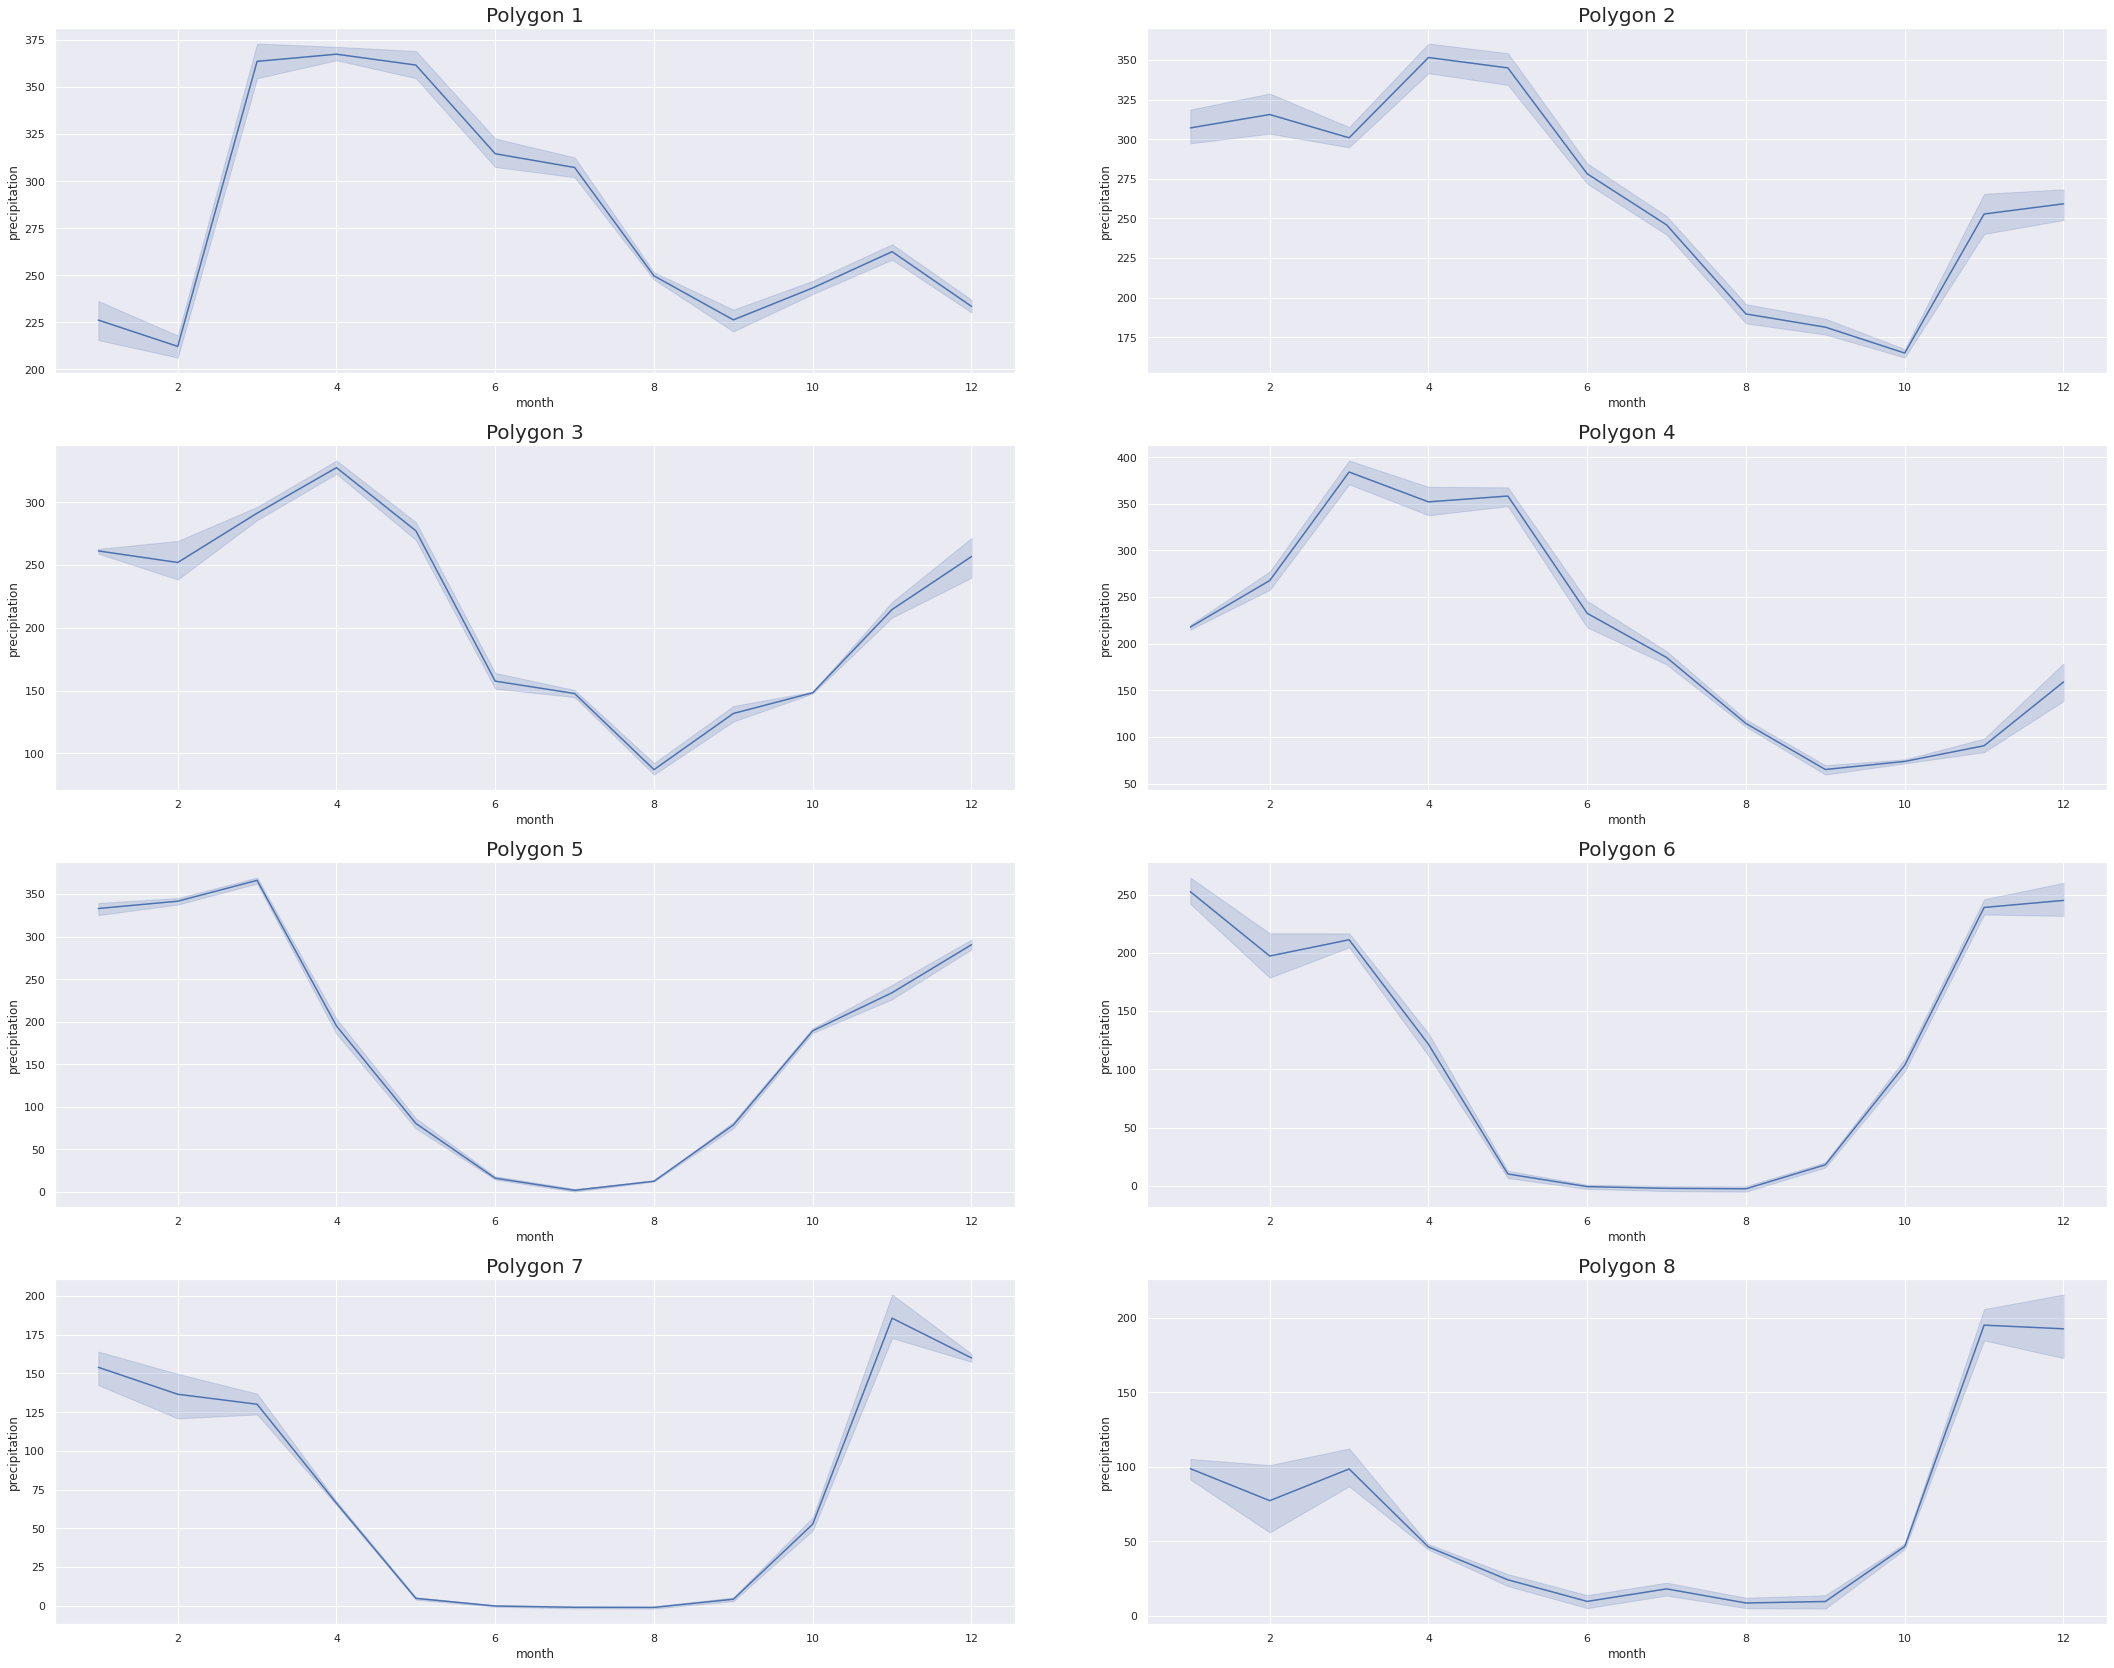

In [94]:
fig, ax = plot.plot_per_polygon(climate_seasonal, "", lambda df, ax: sns.lineplot(df, x='month', y='precipitation', ax=ax))
#format_date(ax)
#fig.autofmt_xdate()

In [ ]:
fig, ax = plot.plot_per_polygon(climate_seasonal[climate_seasonal.datetime > '2019-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date(ax)
#fig.autofmt_xdate()

### Let's determine the duration and timing of dry seasons

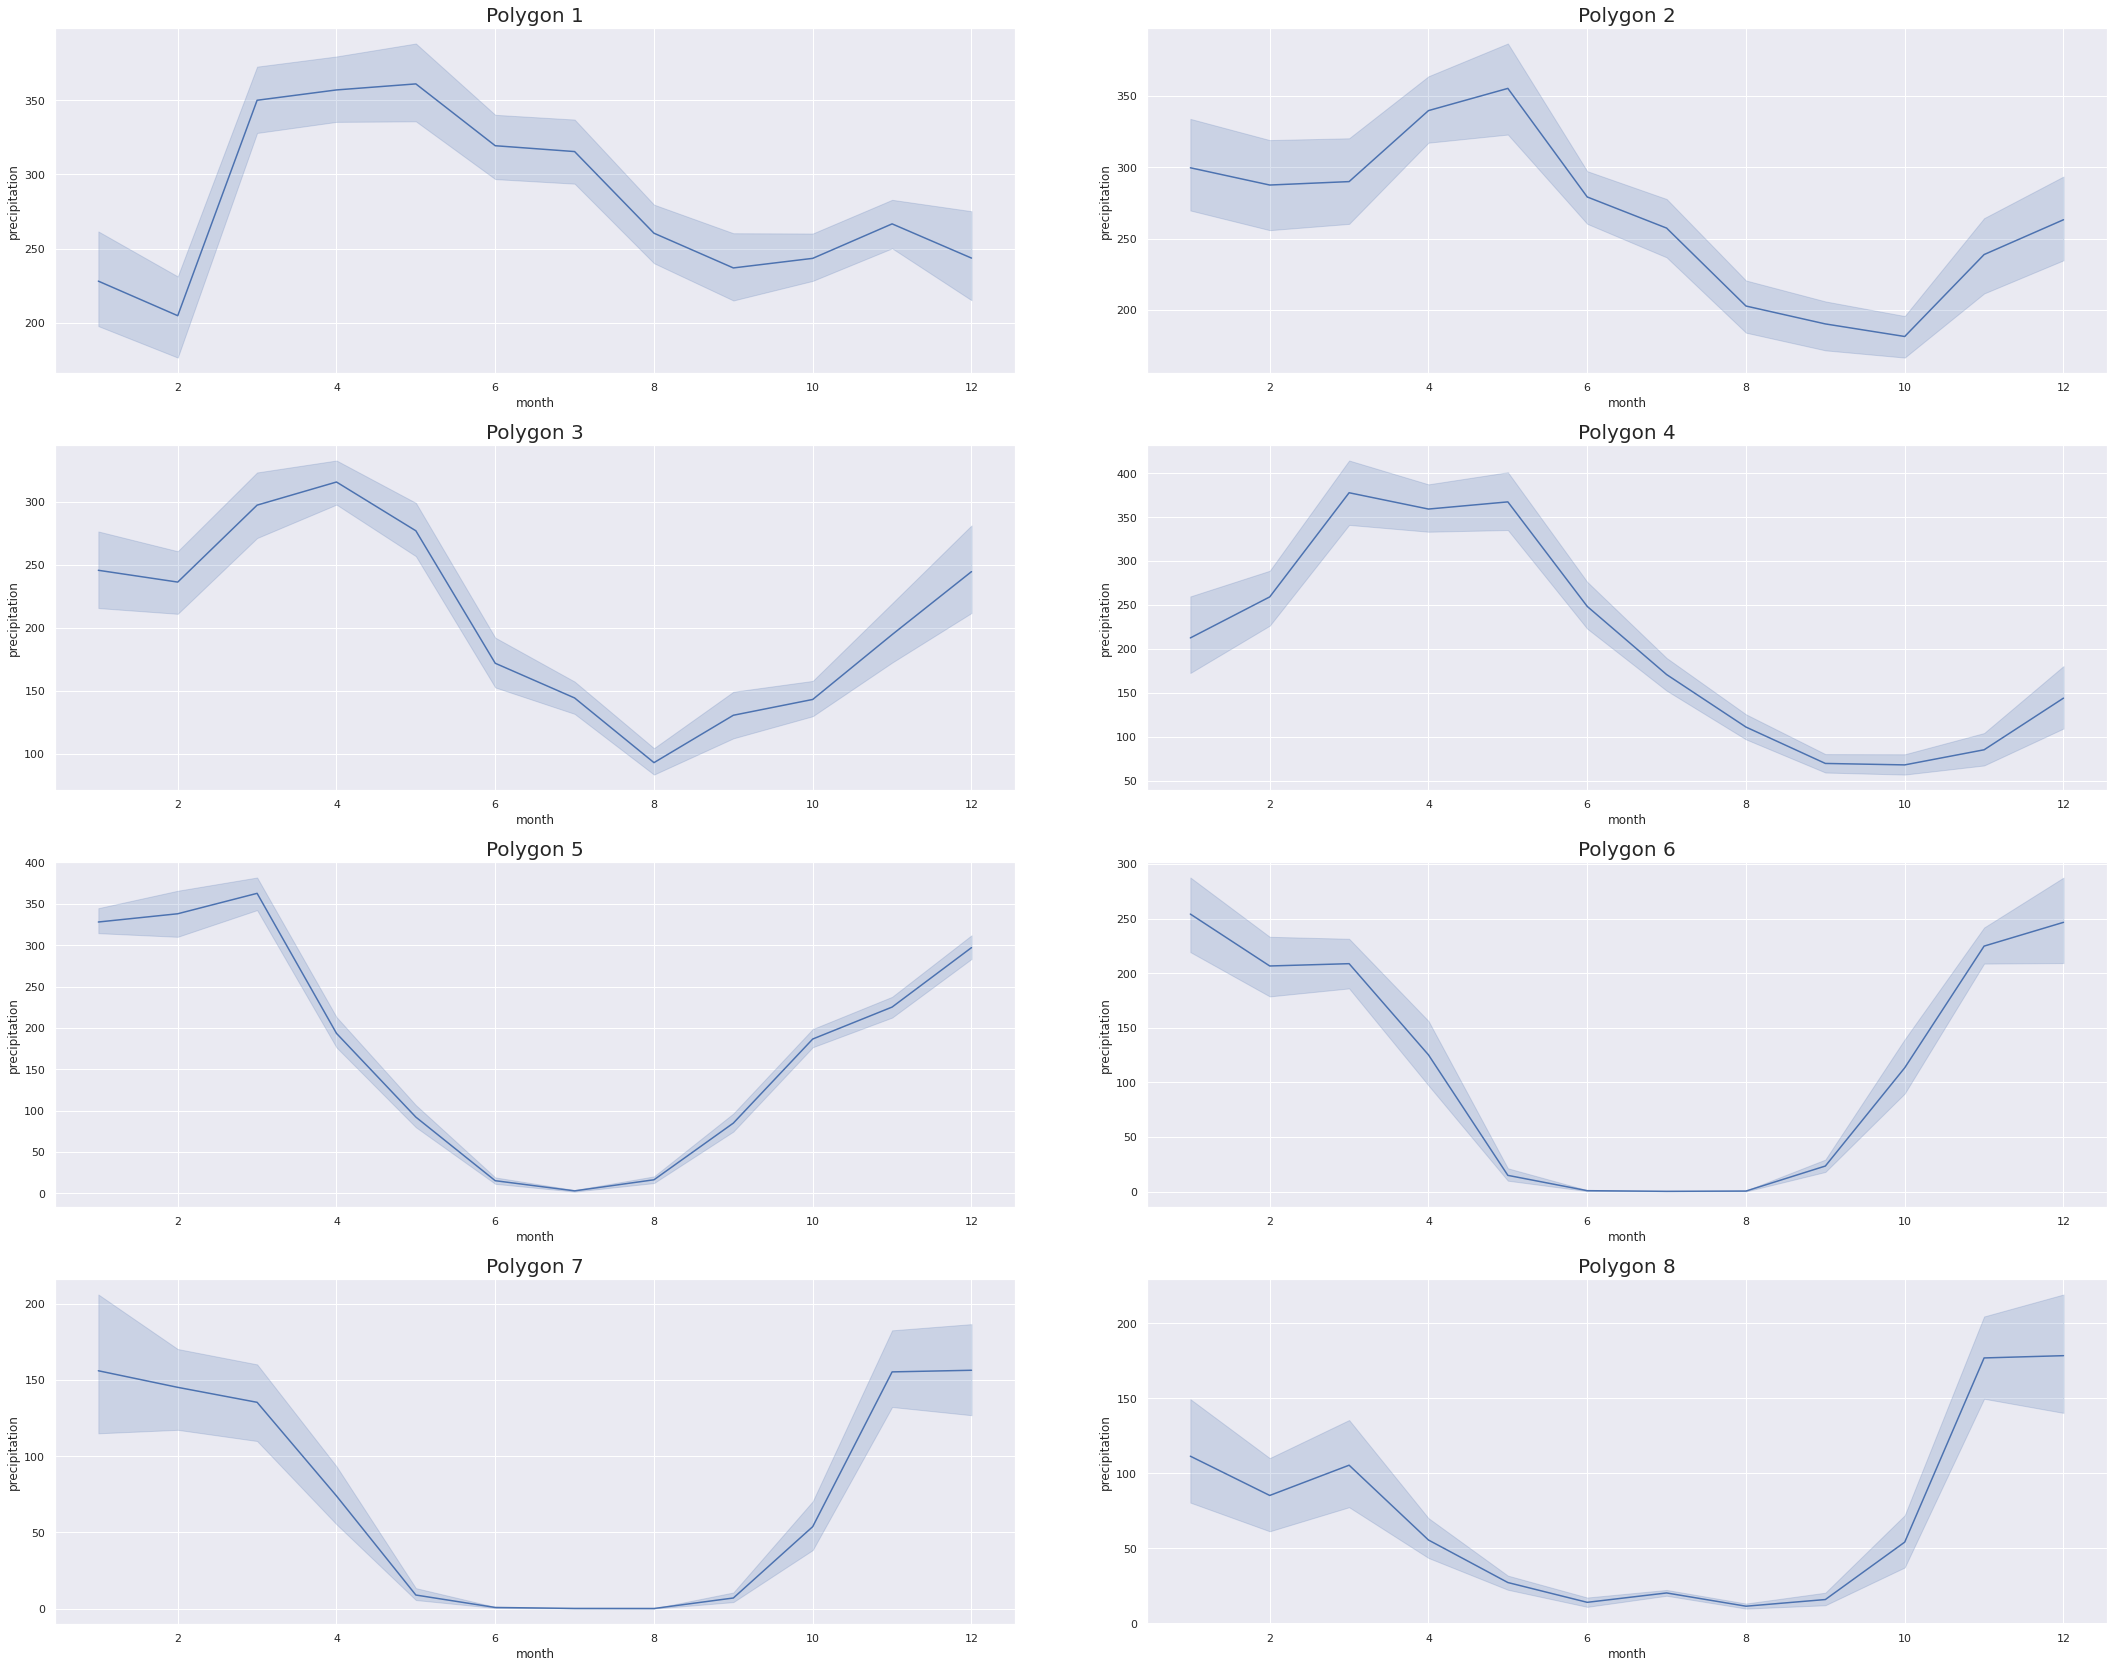

In [97]:
fig, ax = plot.plot_per_polygon(climate, "", lambda df, ax: sns.lineplot(df, x='month', y='precipitation', ax=ax))

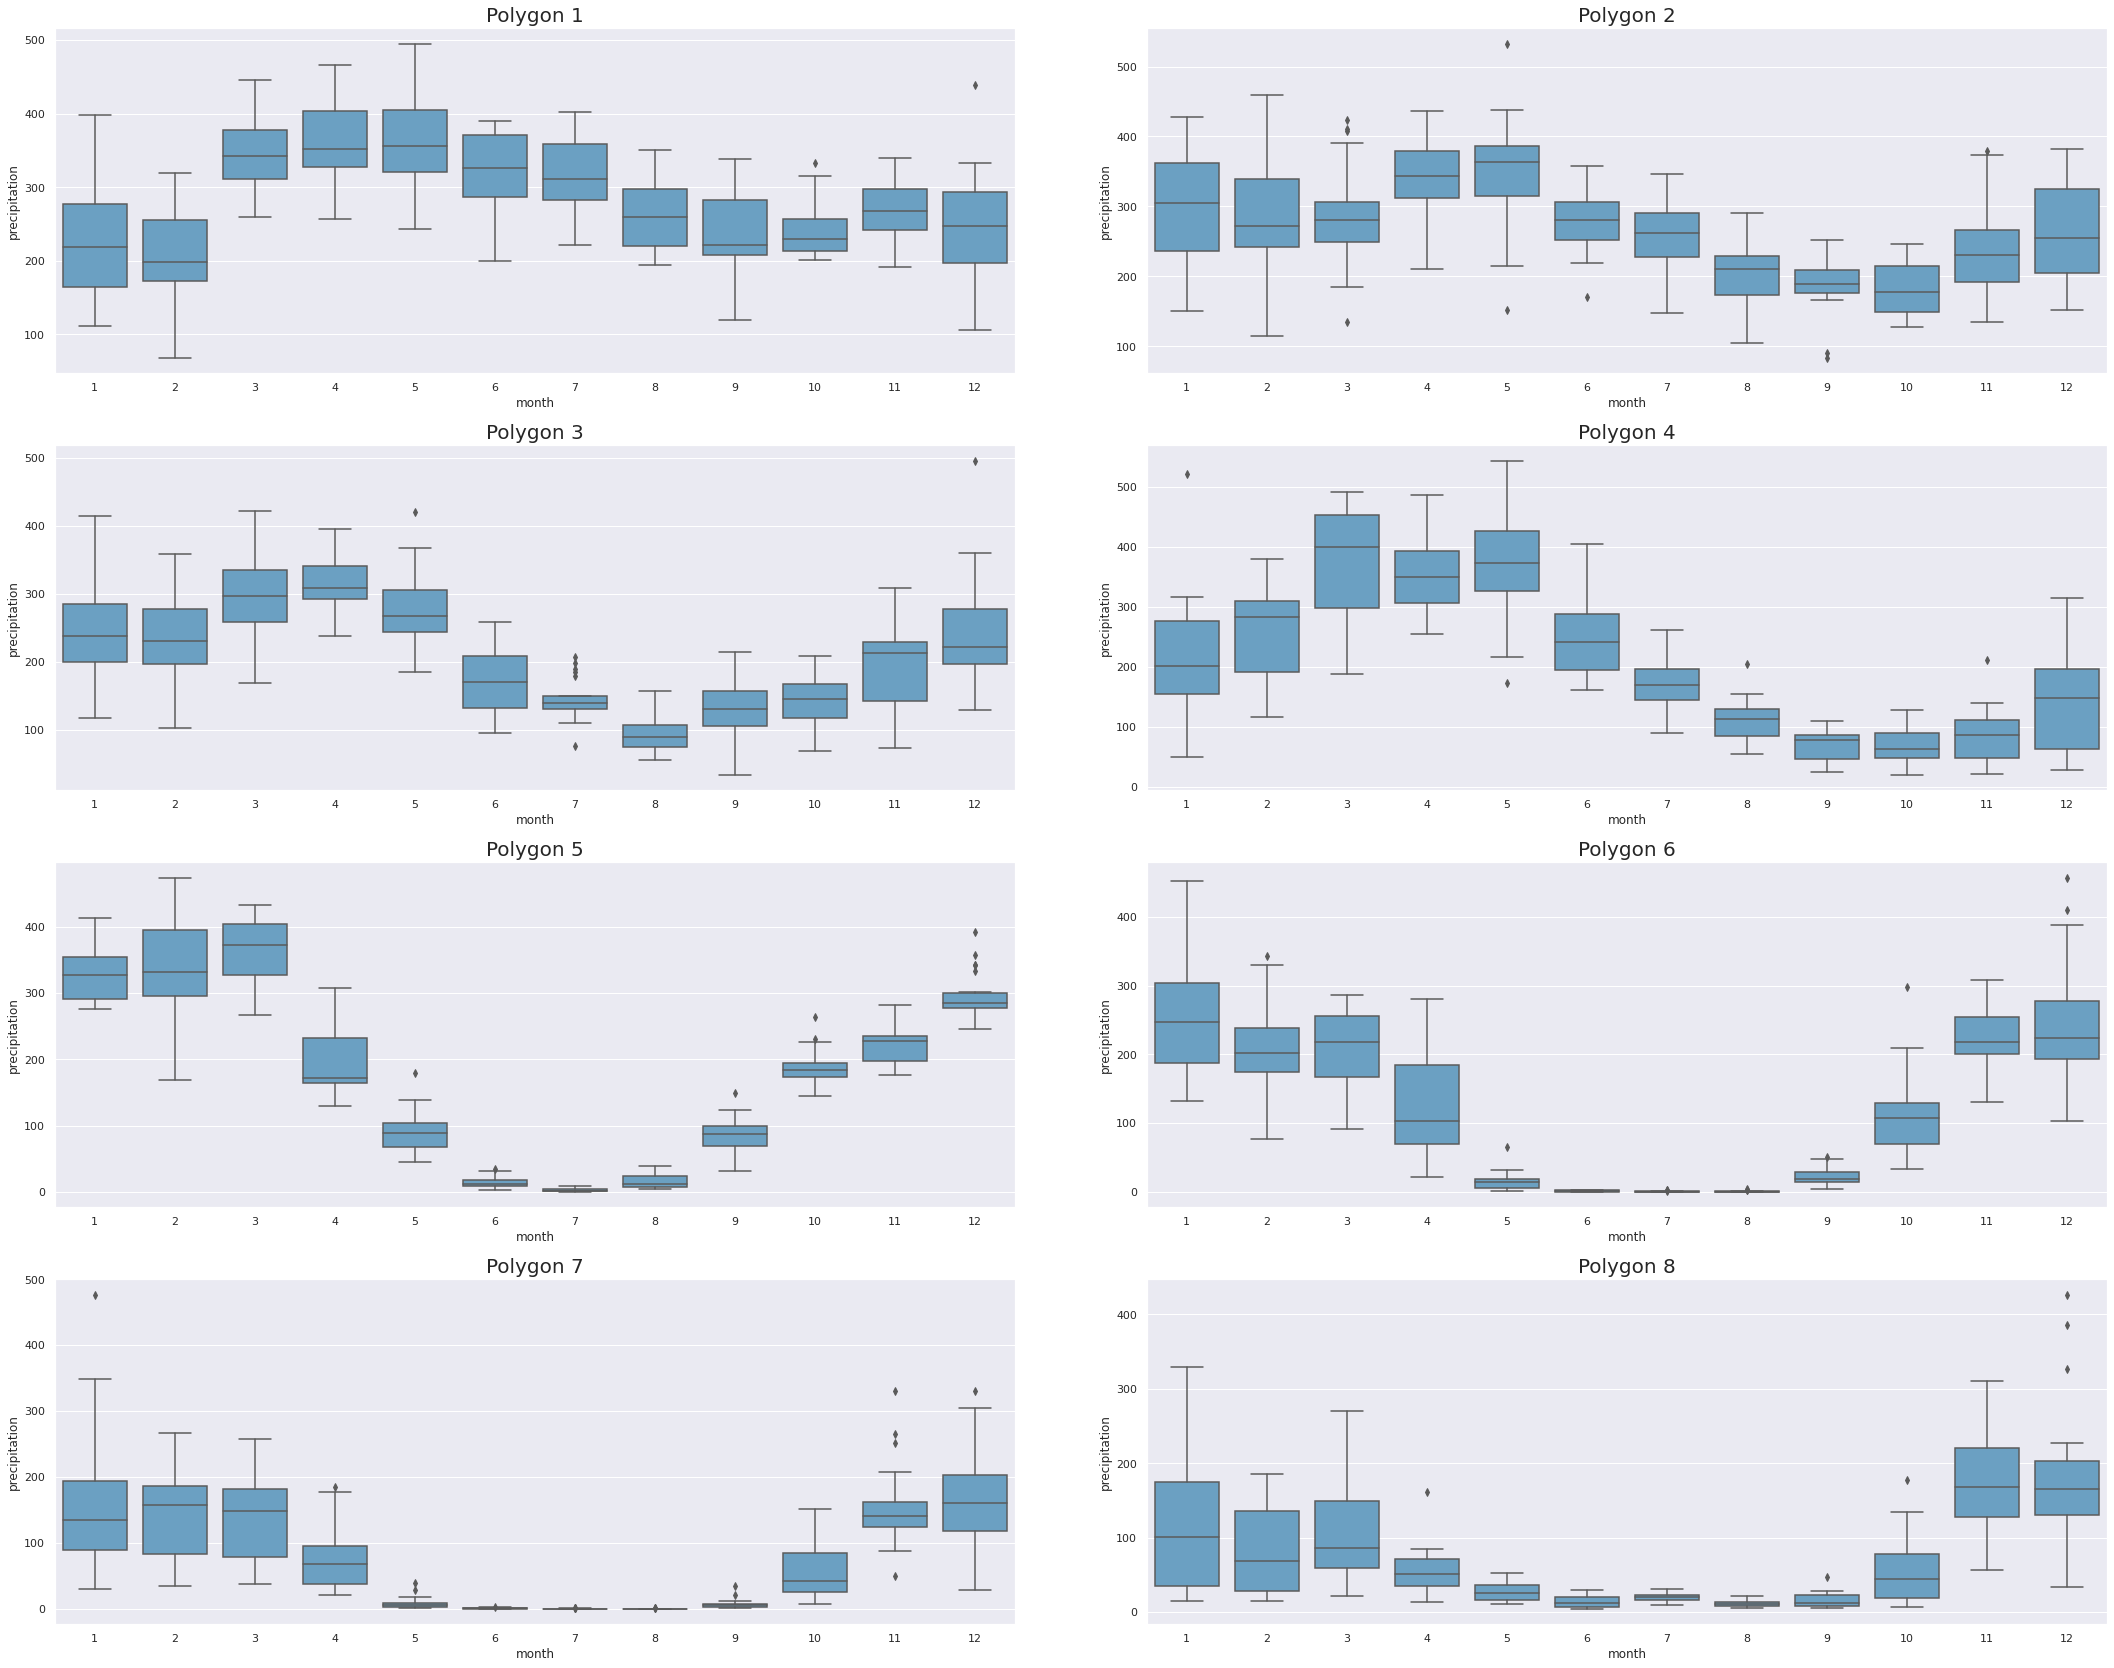

In [104]:
fig, ax = plot.plot_per_polygon(climate, "", lambda df, ax: sns.boxplot(df, x='month', y='precipitation', ax=ax, color=sns.color_palette("Blues", 10)[5]))

In [113]:
climate

month  polygon_id  year    datetime   date  precipitation     radiation  \
0         1           1  2001  2001-01-01  01-01     287.395210  1.444521e+07   
1         1           1  2002  2002-01-01  01-02     156.436205  1.615154e+07   
2         1           1  2003  2003-01-01  01-03     192.224859  1.589504e+07   
3         1           1  2004  2004-01-01  01-04     124.213303  1.687764e+07   
4         1           1  2005  2005-01-01  01-05     168.052640  1.612343e+07   
...     ...         ...   ...         ...    ...            ...           ...   
2107     12           8  2018  2018-12-01  12-18     204.183599  1.699328e+07   
2108     12           8  2019  2019-12-01  12-19     102.111351  1.882574e+07   
2109     12           8  2020  2020-12-01  12-20      33.831942  2.017654e+07   
2110     12           8  2021  2021-12-01  12-21     426.831726  1.296895e+07   
2111     12           8  2022  2022-12-01  12-22     385.430891           NaN   

      temperature       fpar         PET       P-PET  
0       28.270778  88.894826  176.270066  111.125144  
1       29.185926  89.622120  207.440509  -51.004304  
2       29.337065  89.497615  178.266904   13.957954  
3       29.124262  89.349133  184.652791  -60.439488  
4       28.732862  89.272441  175.966823   -7.914183  
...           ...        ...         ...         ...  
2107    30.129621  69.579149  250.800548  -46.616949  
2108    32.419237  60.315467  253.403838 -151.292487  
2109    29.424621  67.737927  274.013432 -240.181489  
2110    28.630775  62.093750  232.133668  194.698058  
2111    27.971455  74.463166  201.617435  183.813456  

[2112 rows x 11 columns]

In [222]:
climate_monthly_avg = climate.groupby(['month', 'polygon_id']).mean(numeric_only=True).drop(columns='year').reset_index()

In [202]:
# output minimum per polygon
for polygon_id in range(1, 9):
    min_month_p = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].precipitation.min()
    print(f'Polygon {polygon_id}: minimum monthly precipitation = {min_month_p}')

Polygon 1: minimum monthly precipitation = 194.70894357499938
Polygon 2: minimum monthly precipitation = 170.97994396866306
Polygon 3: minimum monthly precipitation = 97.64730597440152
Polygon 4: minimum monthly precipitation = 59.44480148919294
Polygon 5: minimum monthly precipitation = 1.7508229832173514
Polygon 6: minimum monthly precipitation = 0.21730848827174687
Polygon 7: minimum monthly precipitation = 0.0051912097403636
Polygon 8: minimum monthly precipitation = 7.319367050298295


Based on this definition, we will classify polygons 1 and 2 as not having a dry season - this makes sense because they are in the Western Amazon.

In [213]:
# Polygon 3
polygon_id = 3
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(5).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 7, 8, 9, 10

month
1     245.585014
2     236.226369
3     297.291120
4     315.643460
5     276.933744
6     171.813093
7     144.263216
8      92.946003
9     130.542393
10    143.085964
11    194.544818
12    244.517196
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5     0.550126
6     0.520539
7     0.483656
8     0.401702
9     0.327465
10    0.273784
11    0.282901
12    0.323109
13    0.384326
14    0.426712
15    0.488557
16    0.537125
17    0.550126
18    0.520539
19    0.483656
20    0.401702
21    0.327465
22    0.273784
23    0.282901
24    0.323109
Name: precipitation, dtype: float64

In [210]:
# Polygon 4
polygon_id = 4
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(6).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 8-9-10-11-12

month
1     212.453928
2     259.166600
3     377.771468
4     359.196644
5     367.360971
6     248.343052
7     170.739331
8     110.939356
9      69.521617
10     67.863732
11     85.077380
12    143.891571
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.737885
7     0.721013
8     0.661058
9     0.536378
10    0.418540
11    0.304363
12    0.262115
13    0.278987
14    0.338942
15    0.463622
16    0.581460
17    0.695637
18    0.737885
19    0.721013
20    0.661058
21    0.536378
22    0.418540
23    0.304363
24    0.262115
Name: precipitation, dtype: float64

In [159]:
# Polygon 5
polygon_id = 5
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(6).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 5-6-7-8-9

month
1     328.015292
2     337.985546
3     362.673217
4     193.421812
5      92.177859
6      15.307394
7       3.008517
8      16.423560
9      84.942436
10    186.578398
11    225.194237
12    297.040321
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.620497
7     0.468821
8     0.318752
9     0.189139
10    0.185945
11    0.248022
12    0.379503
13    0.531179
14    0.681248
15    0.810861
16    0.814055
17    0.751978
18    0.620497
19    0.468821
20    0.318752
21    0.189139
22    0.185945
23    0.248022
24    0.379503
Name: precipitation, dtype: float64

In [160]:
# Polygon 6
polygon_id = 6
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(7).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 4, 5, 6, 7, 8, 9, 10

month
1     254.081768
2     206.577573
3     208.688562
4     125.228724
5      14.968224
6       0.952317
7       0.354718
8       0.611954
9      23.508555
10    113.432817
11    224.767307
12    246.518840
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     0.571147
8     0.392608
9     0.263658
10    0.196562
11    0.266675
12    0.429774
13    0.608073
14    0.753332
15    0.899897
16    0.971546
17    0.902190
18    0.744539
19    0.571147
20    0.392608
21    0.263658
22    0.196562
23    0.266675
24    0.429774
Name: precipitation, dtype: float64

In [162]:
# Polygon 7
polygon_id = 7
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(7).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 4, 5, 6, 7, 8, 9, 10

month
1     156.035873
2     145.156519
3     135.332382
4      73.919977
5       8.911831
6       0.755529
7       0.120798
8       0.078836
9       6.966823
10     53.788765
11    155.296288
12    156.360549
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     0.582748
8     0.408050
9     0.253254
10    0.161912
11    0.253067
12    0.418234
13    0.592174
14    0.754638
15    0.906145
16    0.981143
17    0.930874
18    0.757762
19    0.582748
20    0.408050
21    0.253254
22    0.161912
23    0.253067
24    0.418234
Name: precipitation, dtype: float64

In [221]:
# Polygon 8
polygon_id = 8
polygon_data = climate_monthly_avg[climate_monthly_avg.polygon_id==polygon_id].set_index('month')
print(polygon_data.precipitation)
polygon_data_copy = polygon_data.copy()
polygon_data_copy.index = polygon_data_copy.index + 12
polygon_data = pd.concat([polygon_data, polygon_data_copy])
polygon_data.precipitation.rolling(6).sum() / (polygon_data.precipitation.sum() / 2)
# ==> dry season 2, 4,5,6,7,8,9,10

month
1     111.307127
2      85.142272
3     105.300771
4      55.429477
5      27.103459
6      13.905648
7      20.155068
8      11.318718
9      15.765282
10     54.048917
11    176.800101
12    178.312121
Name: precipitation, dtype: float64


month
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.465942
7     0.359280
8     0.272895
9     0.168125
10    0.166509
11    0.341677
12    0.534058
13    0.640720
14    0.727105
15    0.831875
16    0.833491
17    0.658323
18    0.465942
19    0.359280
20    0.272895
21    0.168125
22    0.166509
23    0.341677
24    0.534058
Name: precipitation, dtype: float64

In [239]:
dry_season = {3: (6, 11), 4: (7, 13), 5: (5, 10), 6:(5, 10), 7:(4 ,10), 8: (2, 11)}

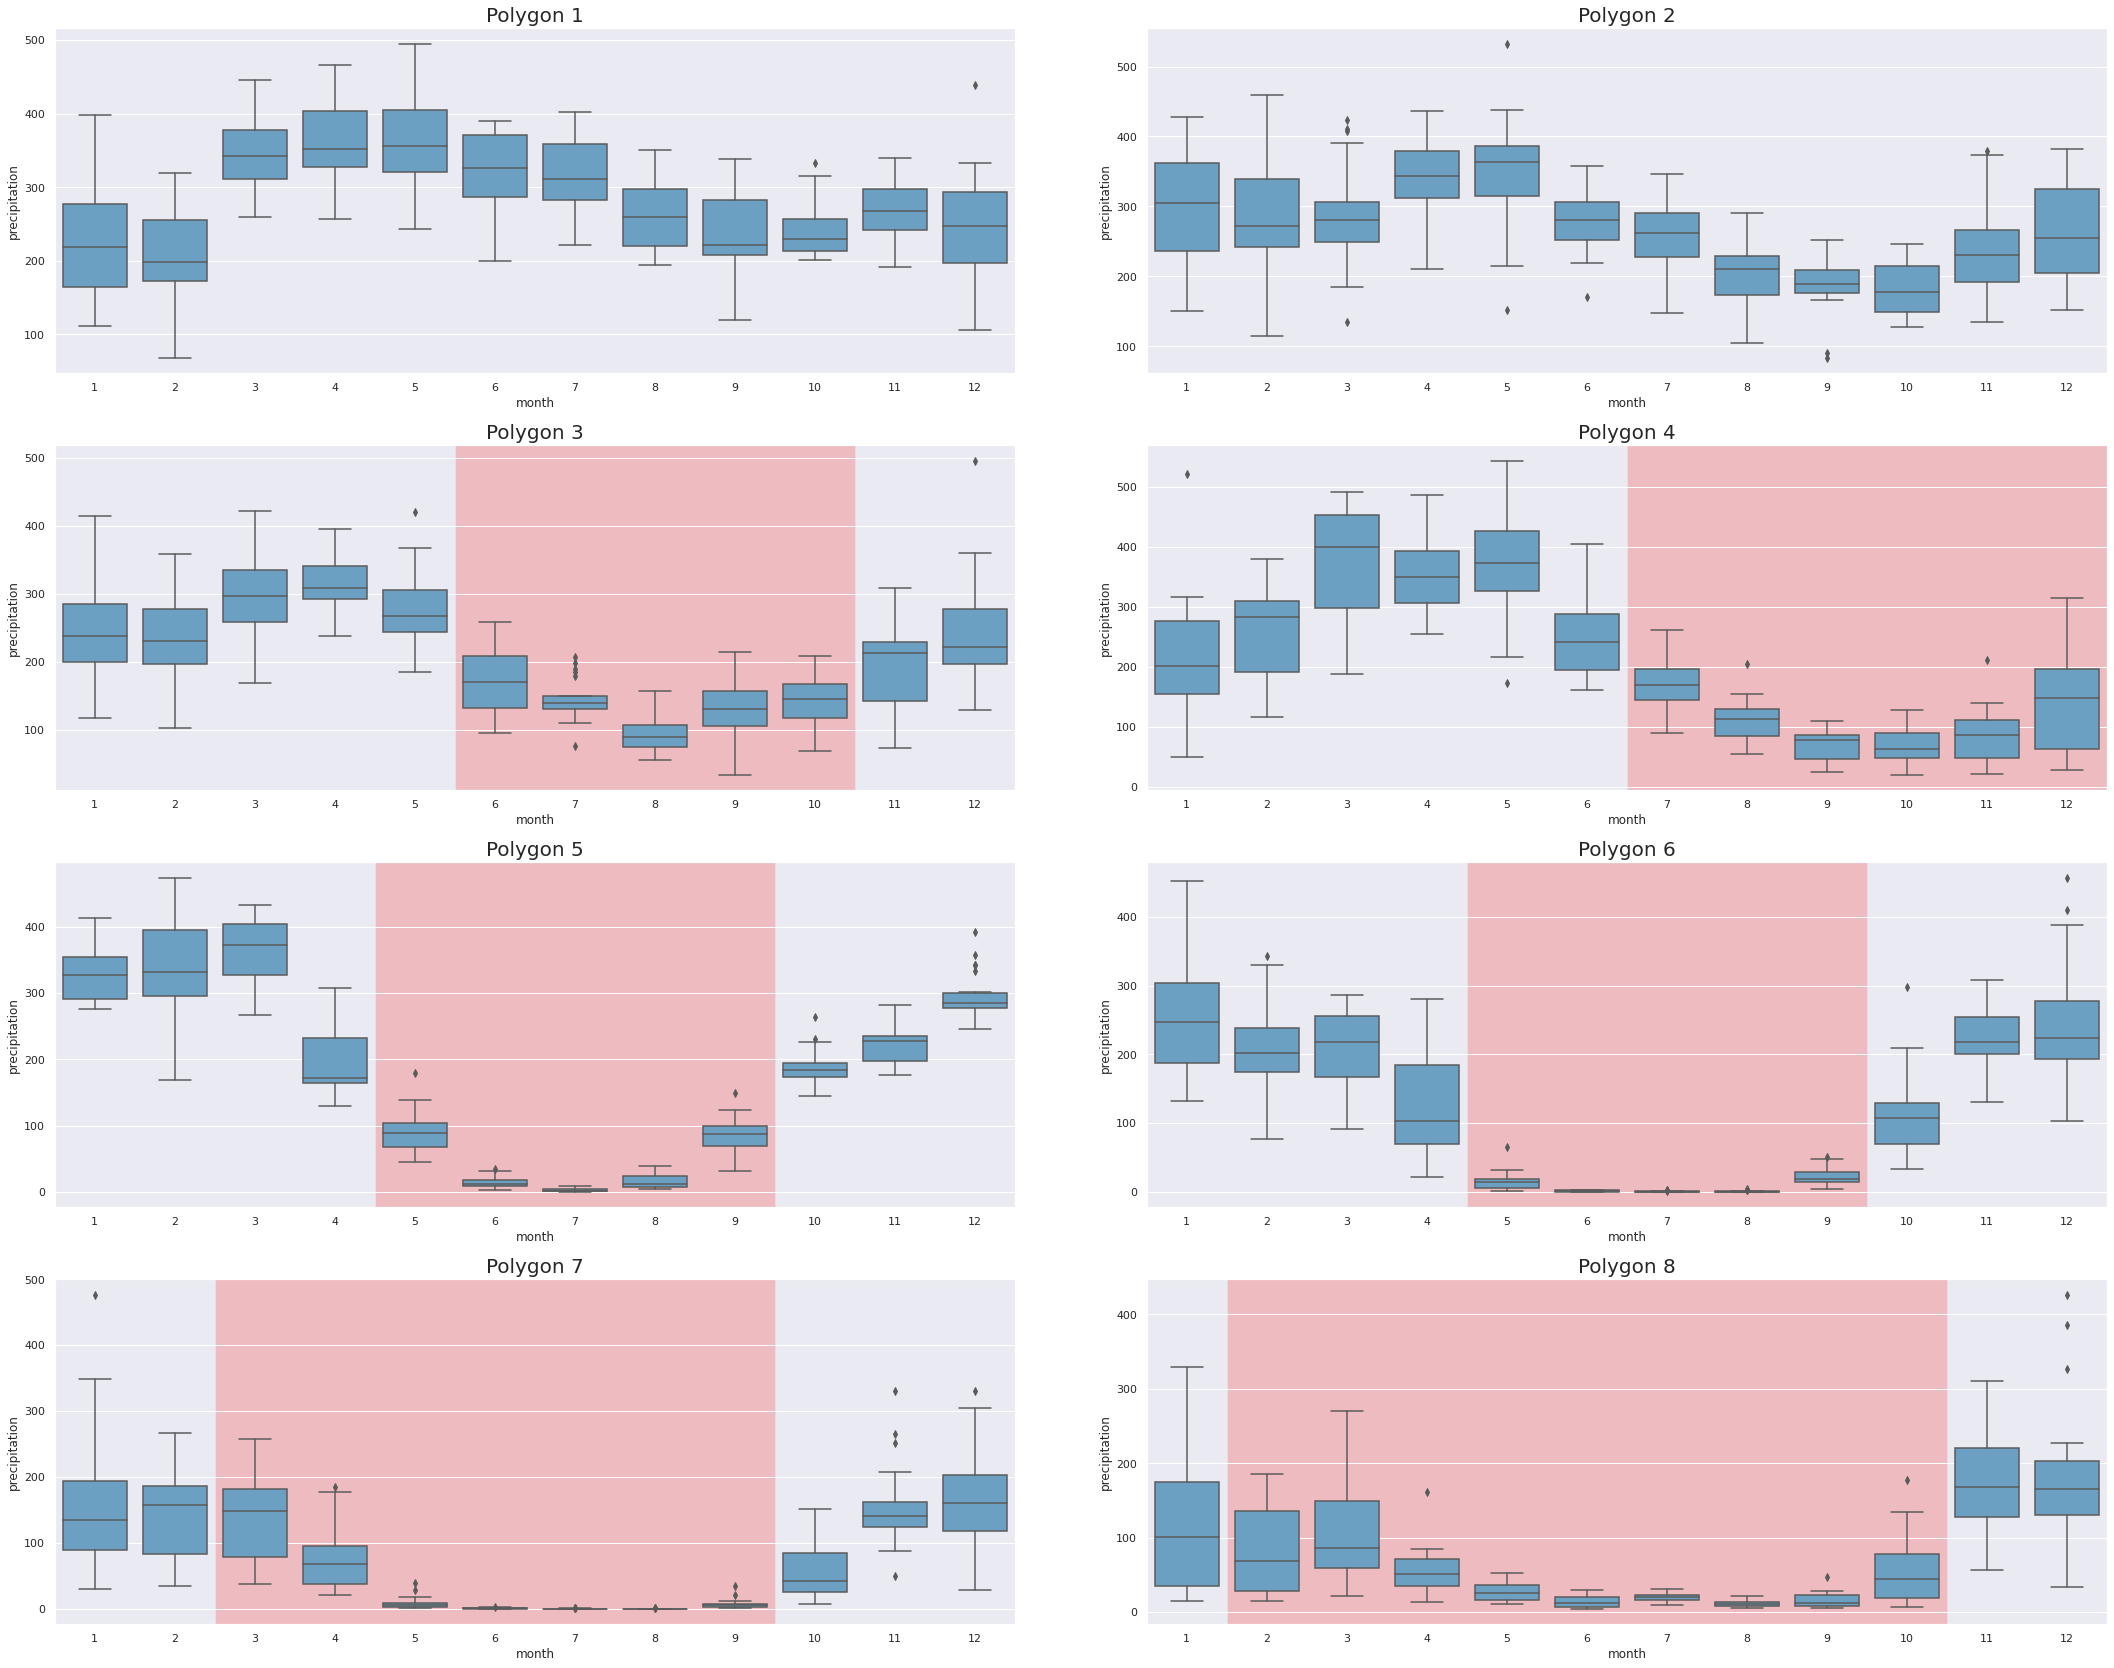

In [236]:
def plot_dry_seaon_per_polygon(data: pd.DataFrame, title, plot_func, fig=None, ax=None,
                     sharey=False, twin_axis=False
                     ) -> plt.figure:
    if fig is None and ax is None:
        fig, ax = plt.subplots(4, 2, figsize=(30, 24), sharey=sharey)
        fig.suptitle(title, fontsize=30)
        fig.tight_layout(pad=3.0, h_pad=4.0, w_pad=8.0)

    for i in range(8):
        subplot = ax[i // 2, i % 2]

        if i+1 in dry_season:
            subplot.axvspan(dry_season[i+1][0] - 1.5, dry_season[i+1][1] - 1.5, facecolor='red', alpha=0.2, zorder=-100)
        # Select polygon from the data. Polygon IDs go from 1 to 8.
        polygon_id = i + 1
        polygon_data = data[data['polygon_id'] == polygon_id]

        # Plot.
        if twin_axis:
            plot_func(polygon_data, subplot.twinx())
        else:
            plot_func(polygon_data, subplot)
        subplot.set_title(f"Polygon {polygon_id}", fontsize=20)

    return fig, ax
fig, ax = plot_dry_seaon_per_polygon(climate, "", lambda df, ax: sns.boxplot(df, x='month', y='precipitation', ax=ax, color=sns.color_palette("Blues", 10)[5]))
#for i in range(8):
#    subplot = ax[i // 2, i % 2]
#    subplot.fill_between(x=range(-1,10), y1=1, y2=5, alpha=0.1, color='red')

In [ ]:
fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2010-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax))
format_date_long_ts(ax)
#fig.autofmt_xdate()

2018-05-01 00:00:00
2018-05-16 00:00:00
2018-06-16 00:00:00
lala
2018-06-01 00:00:00
2018-06-16 00:00:00
2018-07-16 00:00:00
lala
2018-07-01 00:00:00
2018-07-16 00:00:00
2018-08-16 00:00:00
lala
2018-08-01 00:00:00
2018-08-16 00:00:00
2018-09-16 00:00:00
lala
2018-09-01 00:00:00
2018-09-16 00:00:00
2018-10-16 00:00:00
lala
2019-05-01 00:00:00
2019-05-16 00:00:00
2019-06-16 00:00:00
lala
2019-06-01 00:00:00
2019-06-16 00:00:00
2019-07-16 00:00:00
lala
2019-07-01 00:00:00
2019-07-16 00:00:00
2019-08-16 00:00:00
lala
2019-08-01 00:00:00
2019-08-16 00:00:00
2019-09-16 00:00:00
lala
2019-09-01 00:00:00
2019-09-16 00:00:00
2019-10-16 00:00:00
lala
2020-05-01 00:00:00
2020-05-16 00:00:00
2020-06-16 00:00:00
lala
2020-06-01 00:00:00
2020-06-16 00:00:00
2020-07-16 00:00:00
lala
2020-07-01 00:00:00
2020-07-16 00:00:00
2020-08-16 00:00:00
lala
2020-08-01 00:00:00
2020-08-16 00:00:00
2020-09-16 00:00:00
lala
2020-09-01 00:00:00
2020-09-16 00:00:00
2020-10-16 00:00:00
lala
2021-05-01 00:00:00
2021-

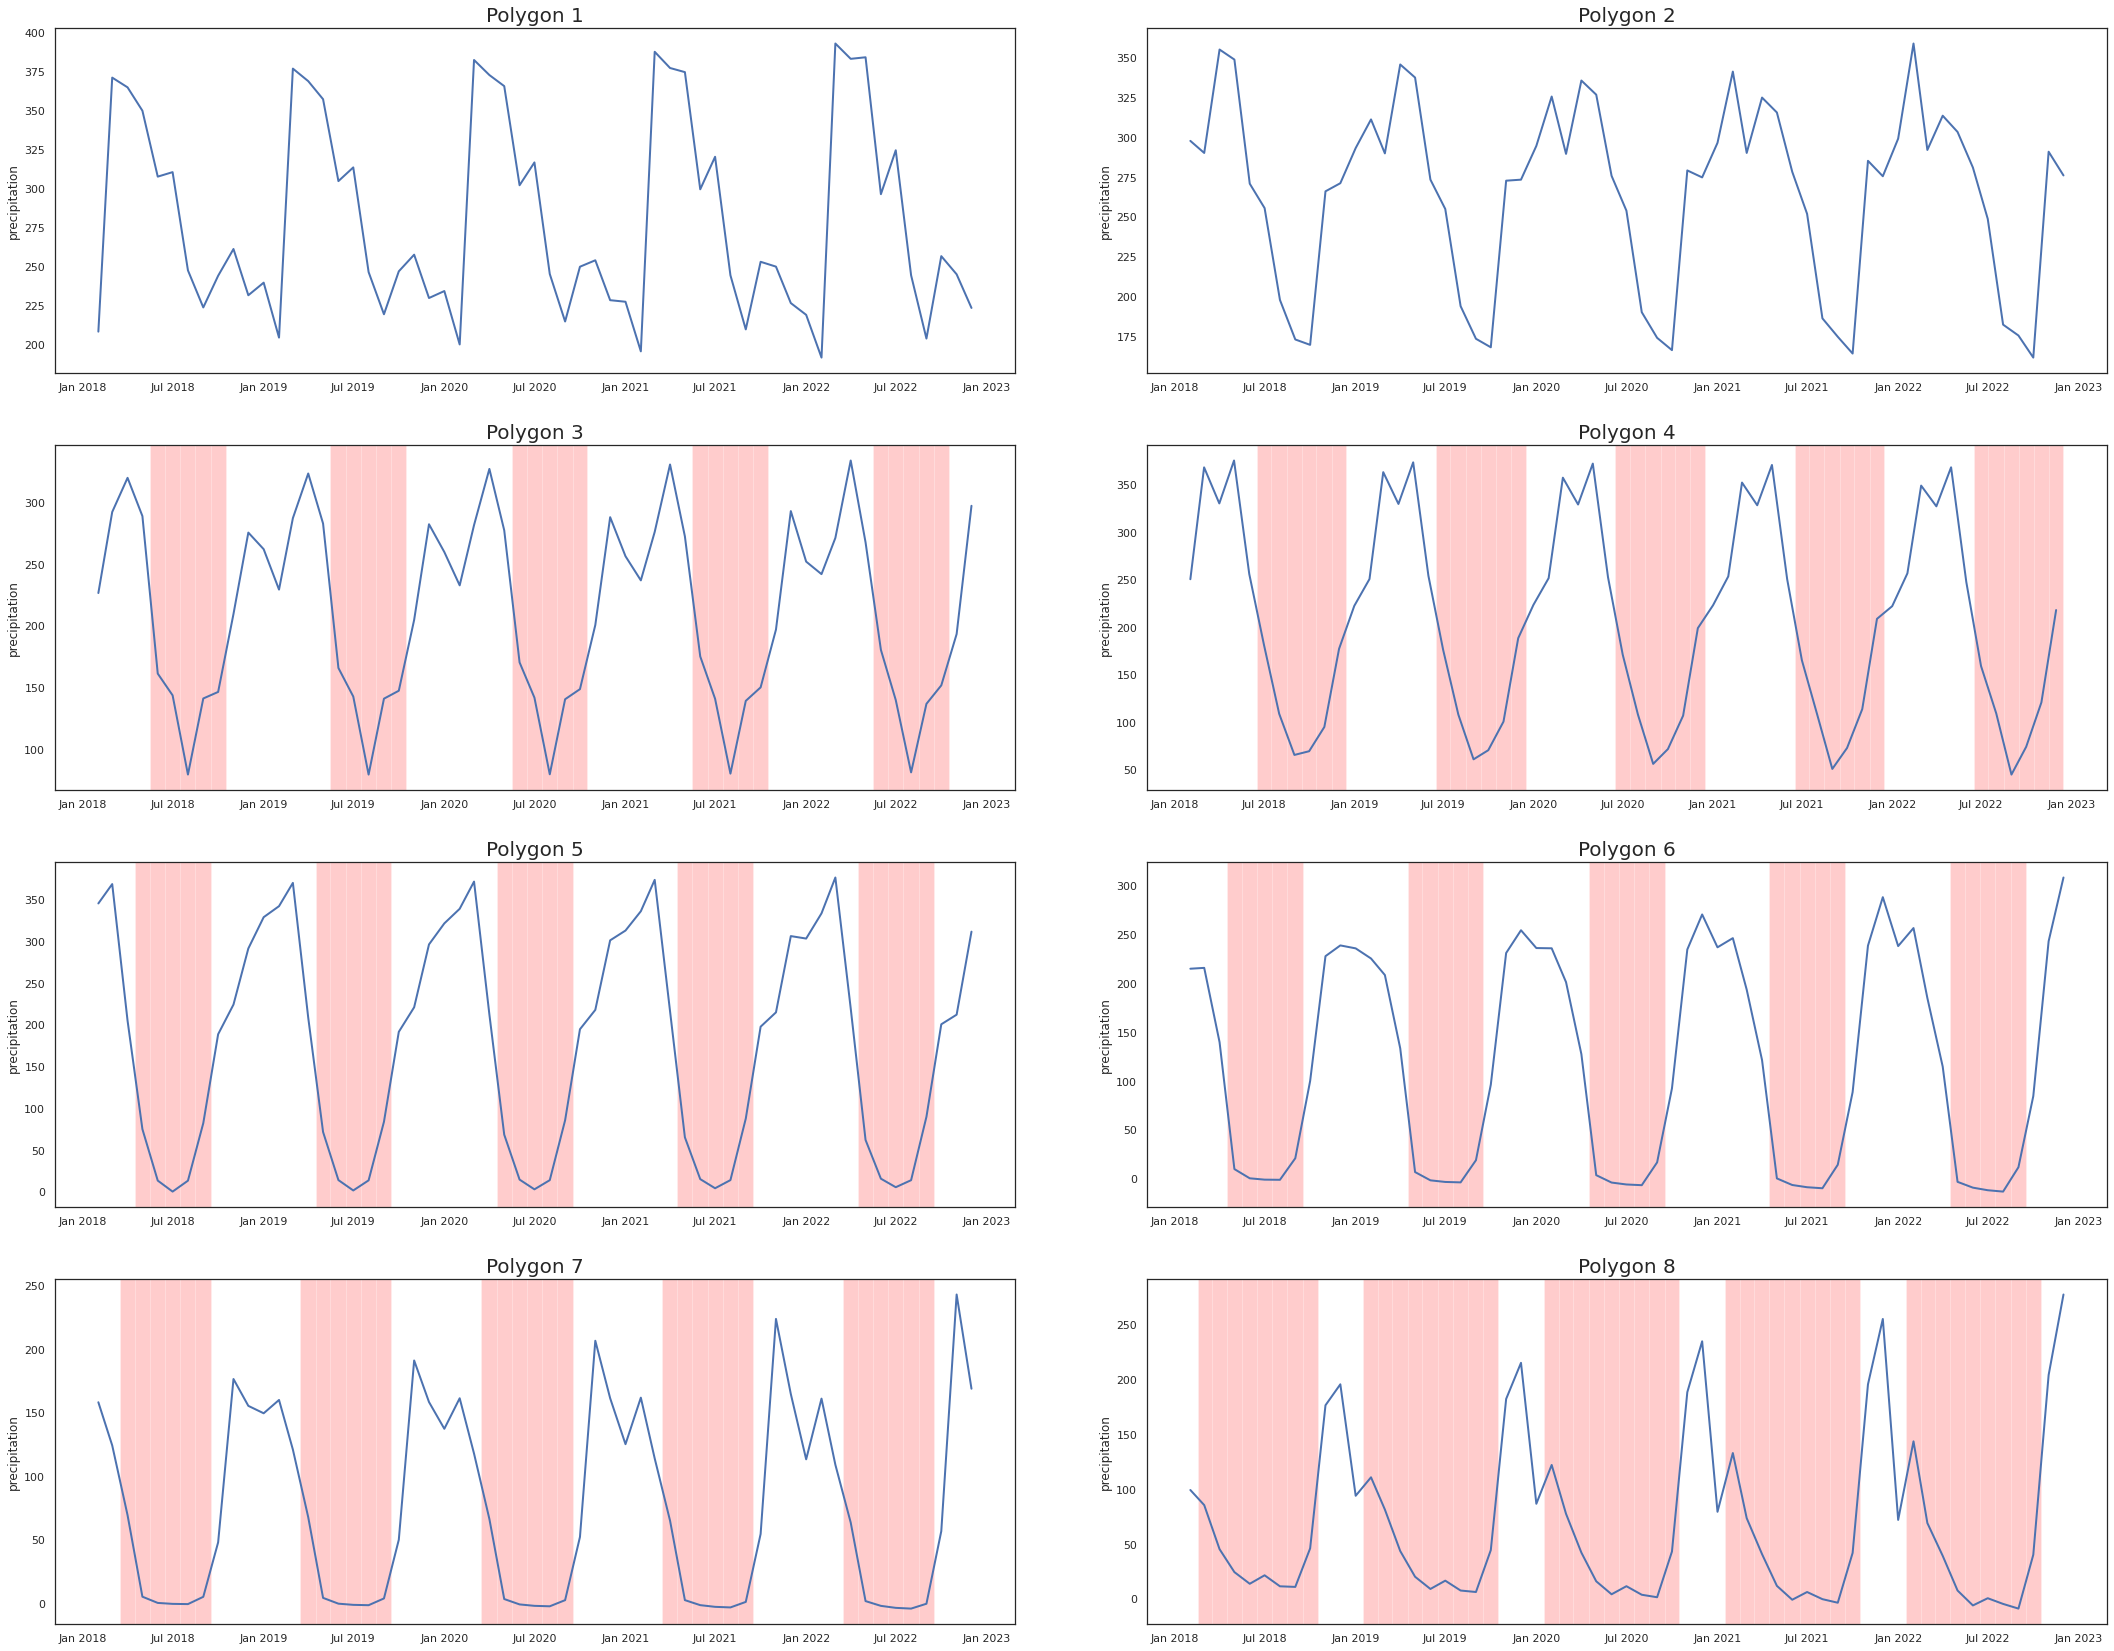

In [258]:

def plot_dry_months_per_polygon(data: pd.DataFrame, title, plot_func, fig=None, ax=None,
                     sharey=False, twin_axis=False
                     ) -> plt.figure:
    if fig is None and ax is None:
        fig, ax = plt.subplots(4, 2, figsize=(30, 24), sharey=sharey)
        fig.suptitle(title, fontsize=30)
        fig.tight_layout(pad=3.0, h_pad=4.0, w_pad=8.0)

    for i in range(8):
        subplot = ax[i // 2, i % 2]

        # Select polygon from the data. Polygon IDs go from 1 to 8.
        polygon_id = i + 1
        polygon_data = data[data['polygon_id'] == polygon_id]

        if i+1 in dry_season:
            dry_months = polygon_data[polygon_data.month.isin(range(dry_season[i+1][0] - 1, dry_season[i+1][1] - 1))]
            for month in dry_months.datetime:
                print(month)
                print(pd.DateOffset(days=15) + month)
                print(pd.DateOffset(months=1, days=15) + month)
                print('lala')
                subplot.axvspan(pd.DateOffset(days=15) + month, pd.DateOffset(months=1, days=15) + month, facecolor='red', alpha=0.2, zorder=-100)

        # Plot.
        if twin_axis:
            plot_func(polygon_data, subplot.twinx())
        else:
            plot_func(polygon_data, subplot)
        subplot.set_title(f"Polygon {polygon_id}", fontsize=20)

    return fig, ax
sns.set_style('white')
fig, ax = plot_dry_months_per_polygon(climate_seasonal[climate_seasonal.datetime > '2018-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax, linewidth=2))
format_date(ax)
#fig.autofmt_xdate()

2019-05-01 00:00:00
2019-05-16 00:00:00
2019-06-16 00:00:00
lala
2019-06-01 00:00:00
2019-06-16 00:00:00
2019-07-16 00:00:00
lala
2019-07-01 00:00:00
2019-07-16 00:00:00
2019-08-16 00:00:00
lala
2019-08-01 00:00:00
2019-08-16 00:00:00
2019-09-16 00:00:00
lala
2019-09-01 00:00:00
2019-09-16 00:00:00
2019-10-16 00:00:00
lala
2020-05-01 00:00:00
2020-05-16 00:00:00
2020-06-16 00:00:00
lala
2020-06-01 00:00:00
2020-06-16 00:00:00
2020-07-16 00:00:00
lala
2020-07-01 00:00:00
2020-07-16 00:00:00
2020-08-16 00:00:00
lala
2020-08-01 00:00:00
2020-08-16 00:00:00
2020-09-16 00:00:00
lala
2020-09-01 00:00:00
2020-09-16 00:00:00
2020-10-16 00:00:00
lala
2021-05-01 00:00:00
2021-05-16 00:00:00
2021-06-16 00:00:00
lala
2021-06-01 00:00:00
2021-06-16 00:00:00
2021-07-16 00:00:00
lala
2021-07-01 00:00:00
2021-07-16 00:00:00
2021-08-16 00:00:00
lala
2021-08-01 00:00:00
2021-08-16 00:00:00
2021-09-16 00:00:00
lala
2021-09-01 00:00:00
2021-09-16 00:00:00
2021-10-16 00:00:00
lala
2022-05-01 00:00:00
2022-

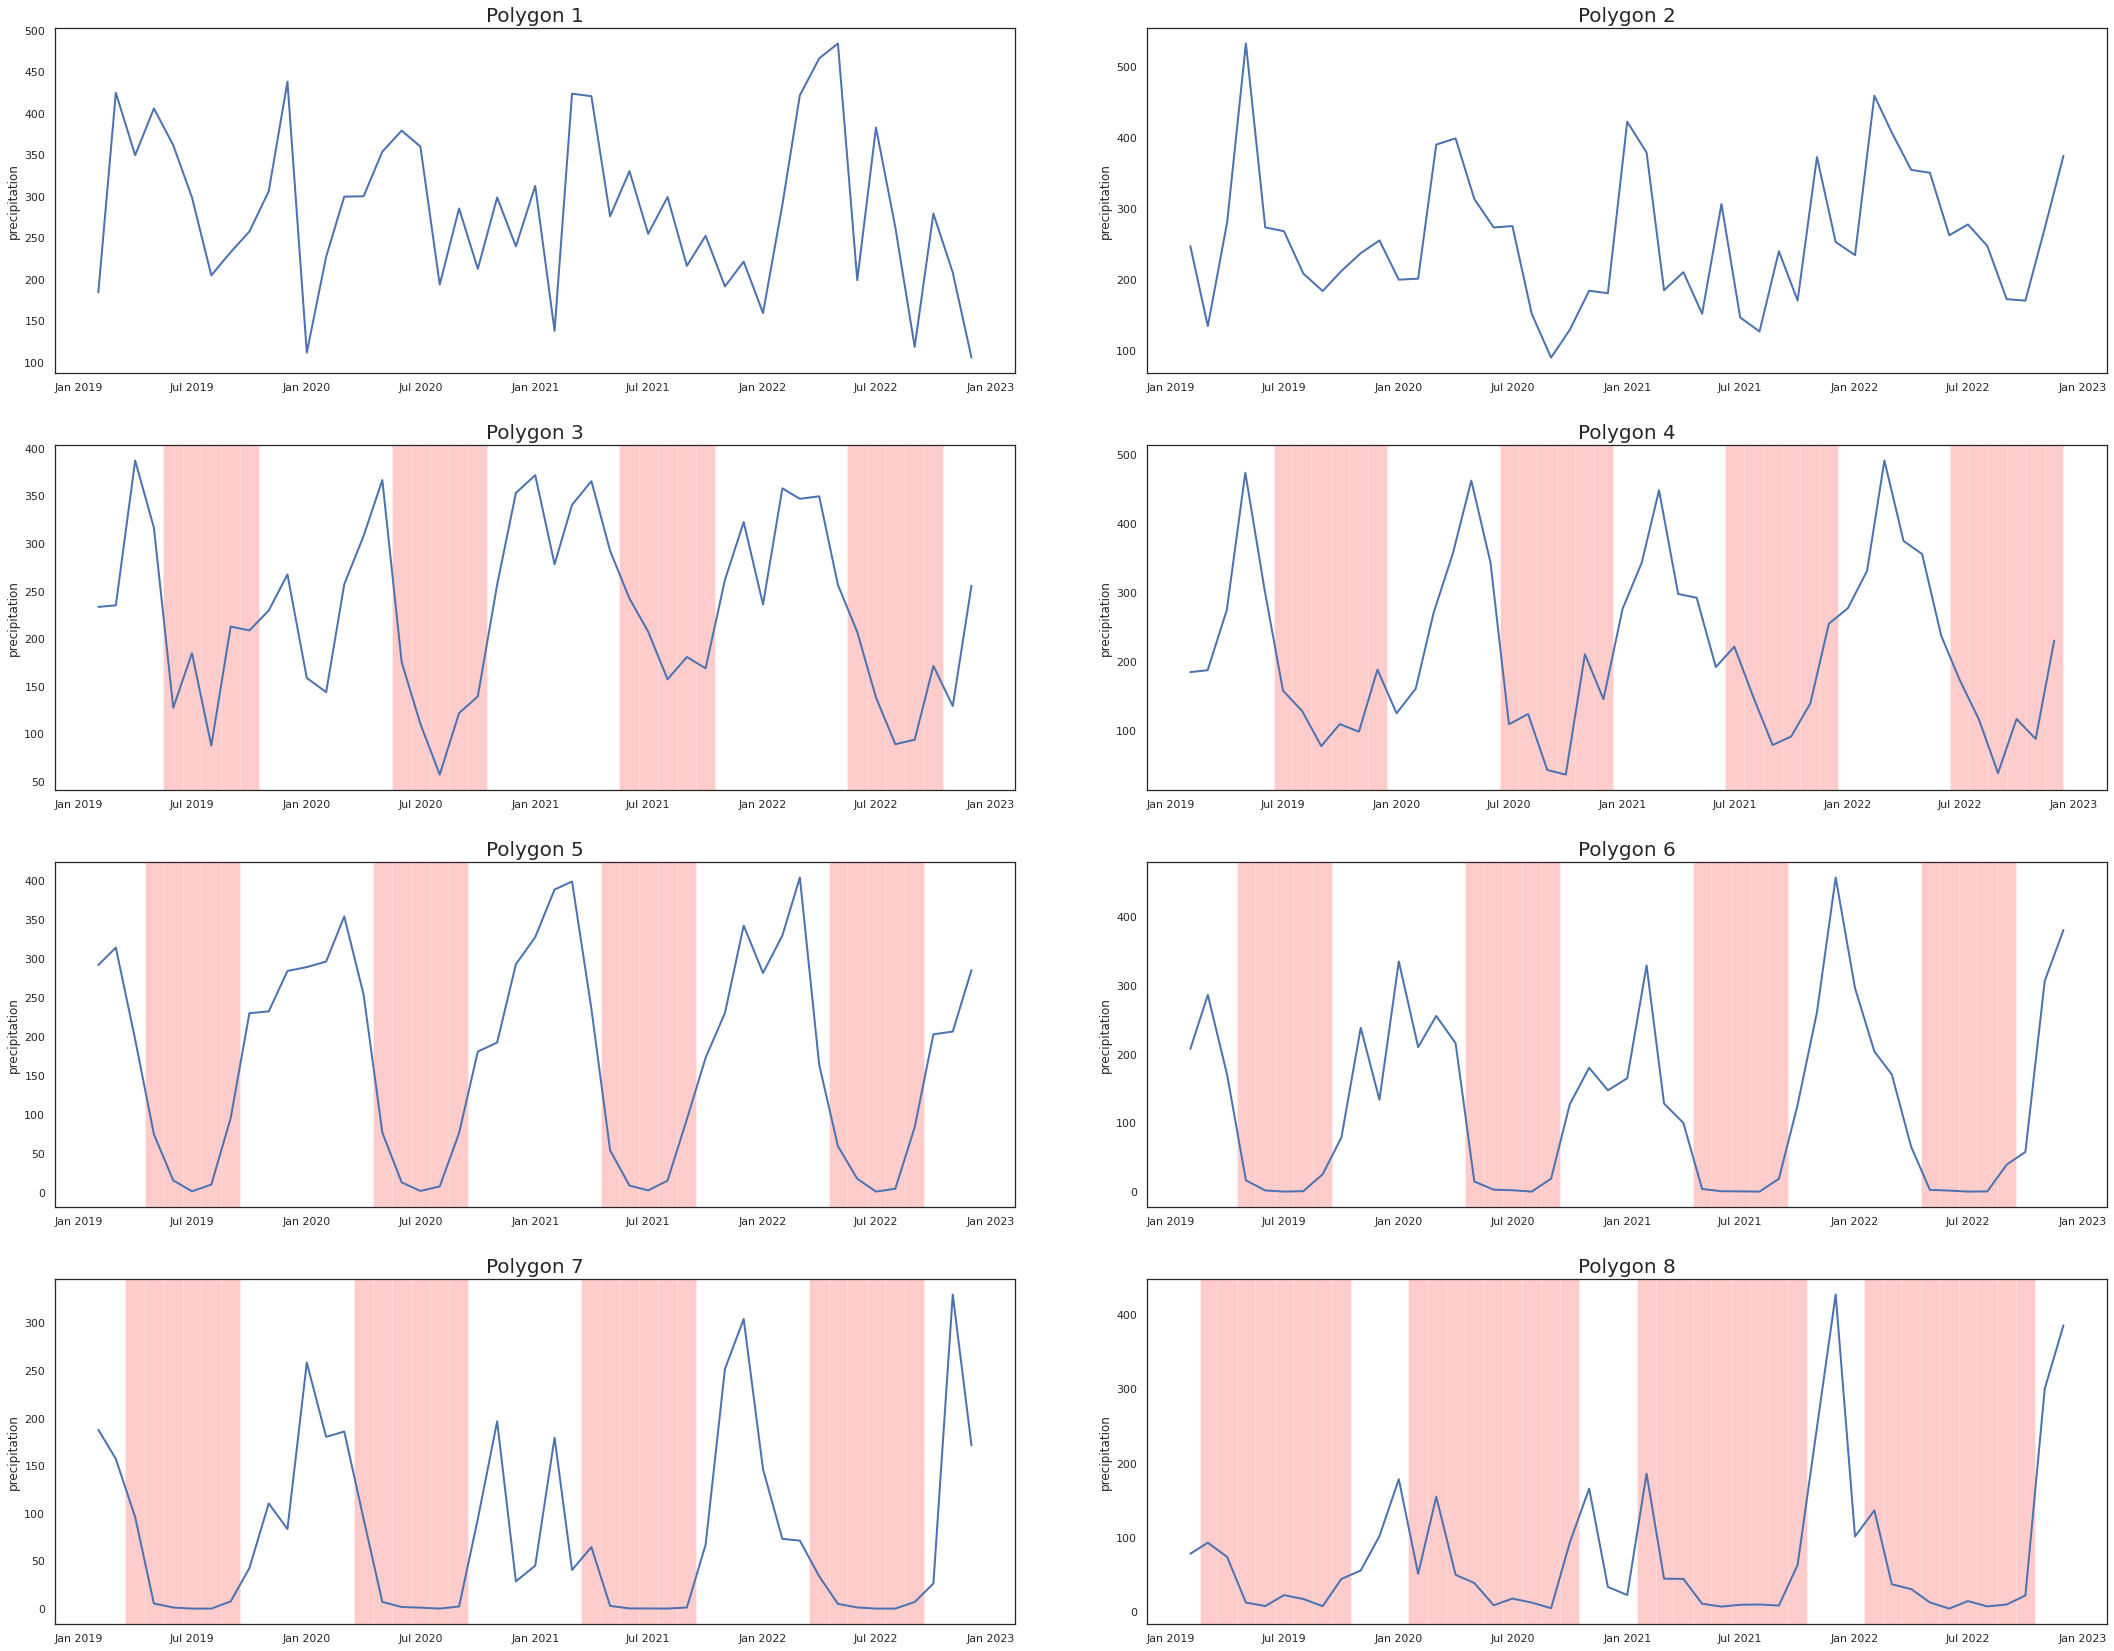

In [264]:

def plot_dry_months_per_polygon(data: pd.DataFrame, title, plot_func, fig=None, ax=None,
                     sharey=False, twin_axis=False
                     ) -> plt.figure:
    if fig is None and ax is None:
        fig, ax = plt.subplots(4, 2, figsize=(30, 24), sharey=sharey)
        fig.suptitle(title, fontsize=30)
        fig.tight_layout(pad=3.0, h_pad=4.0, w_pad=8.0)

    for i in range(8):
        subplot = ax[i // 2, i % 2]

        # Select polygon from the data. Polygon IDs go from 1 to 8.
        polygon_id = i + 1
        polygon_data = data[data['polygon_id'] == polygon_id]

        if i+1 in dry_season:
            dry_months = polygon_data[polygon_data.month.isin(range(dry_season[i+1][0] - 1, dry_season[i+1][1] - 1))]
            for month in dry_months.datetime:
                print(month)
                print(pd.DateOffset(days=15) + month)
                print(pd.DateOffset(months=1, days=15) + month)
                print('lala')
                subplot.axvspan(pd.DateOffset(days=15) + month, pd.DateOffset(months=1, days=15) + month, facecolor='red', alpha=0.2, zorder=-100)

        # Plot.
        if twin_axis:
            plot_func(polygon_data, subplot.twinx())
        else:
            plot_func(polygon_data, subplot)
        subplot.set_title(f"Polygon {polygon_id}", fontsize=20)

    return fig, ax
sns.set_style('white')
fig, ax = plot_dry_months_per_polygon(climate_int[climate_int.datetime > '2019-01-01'], "", lambda df, ax: sns.lineplot(df, x='datetime', y='precipitation', ax=ax, linewidth=2))
format_date(ax)
#fig.autofmt_xdate()

### Modeling water deficit

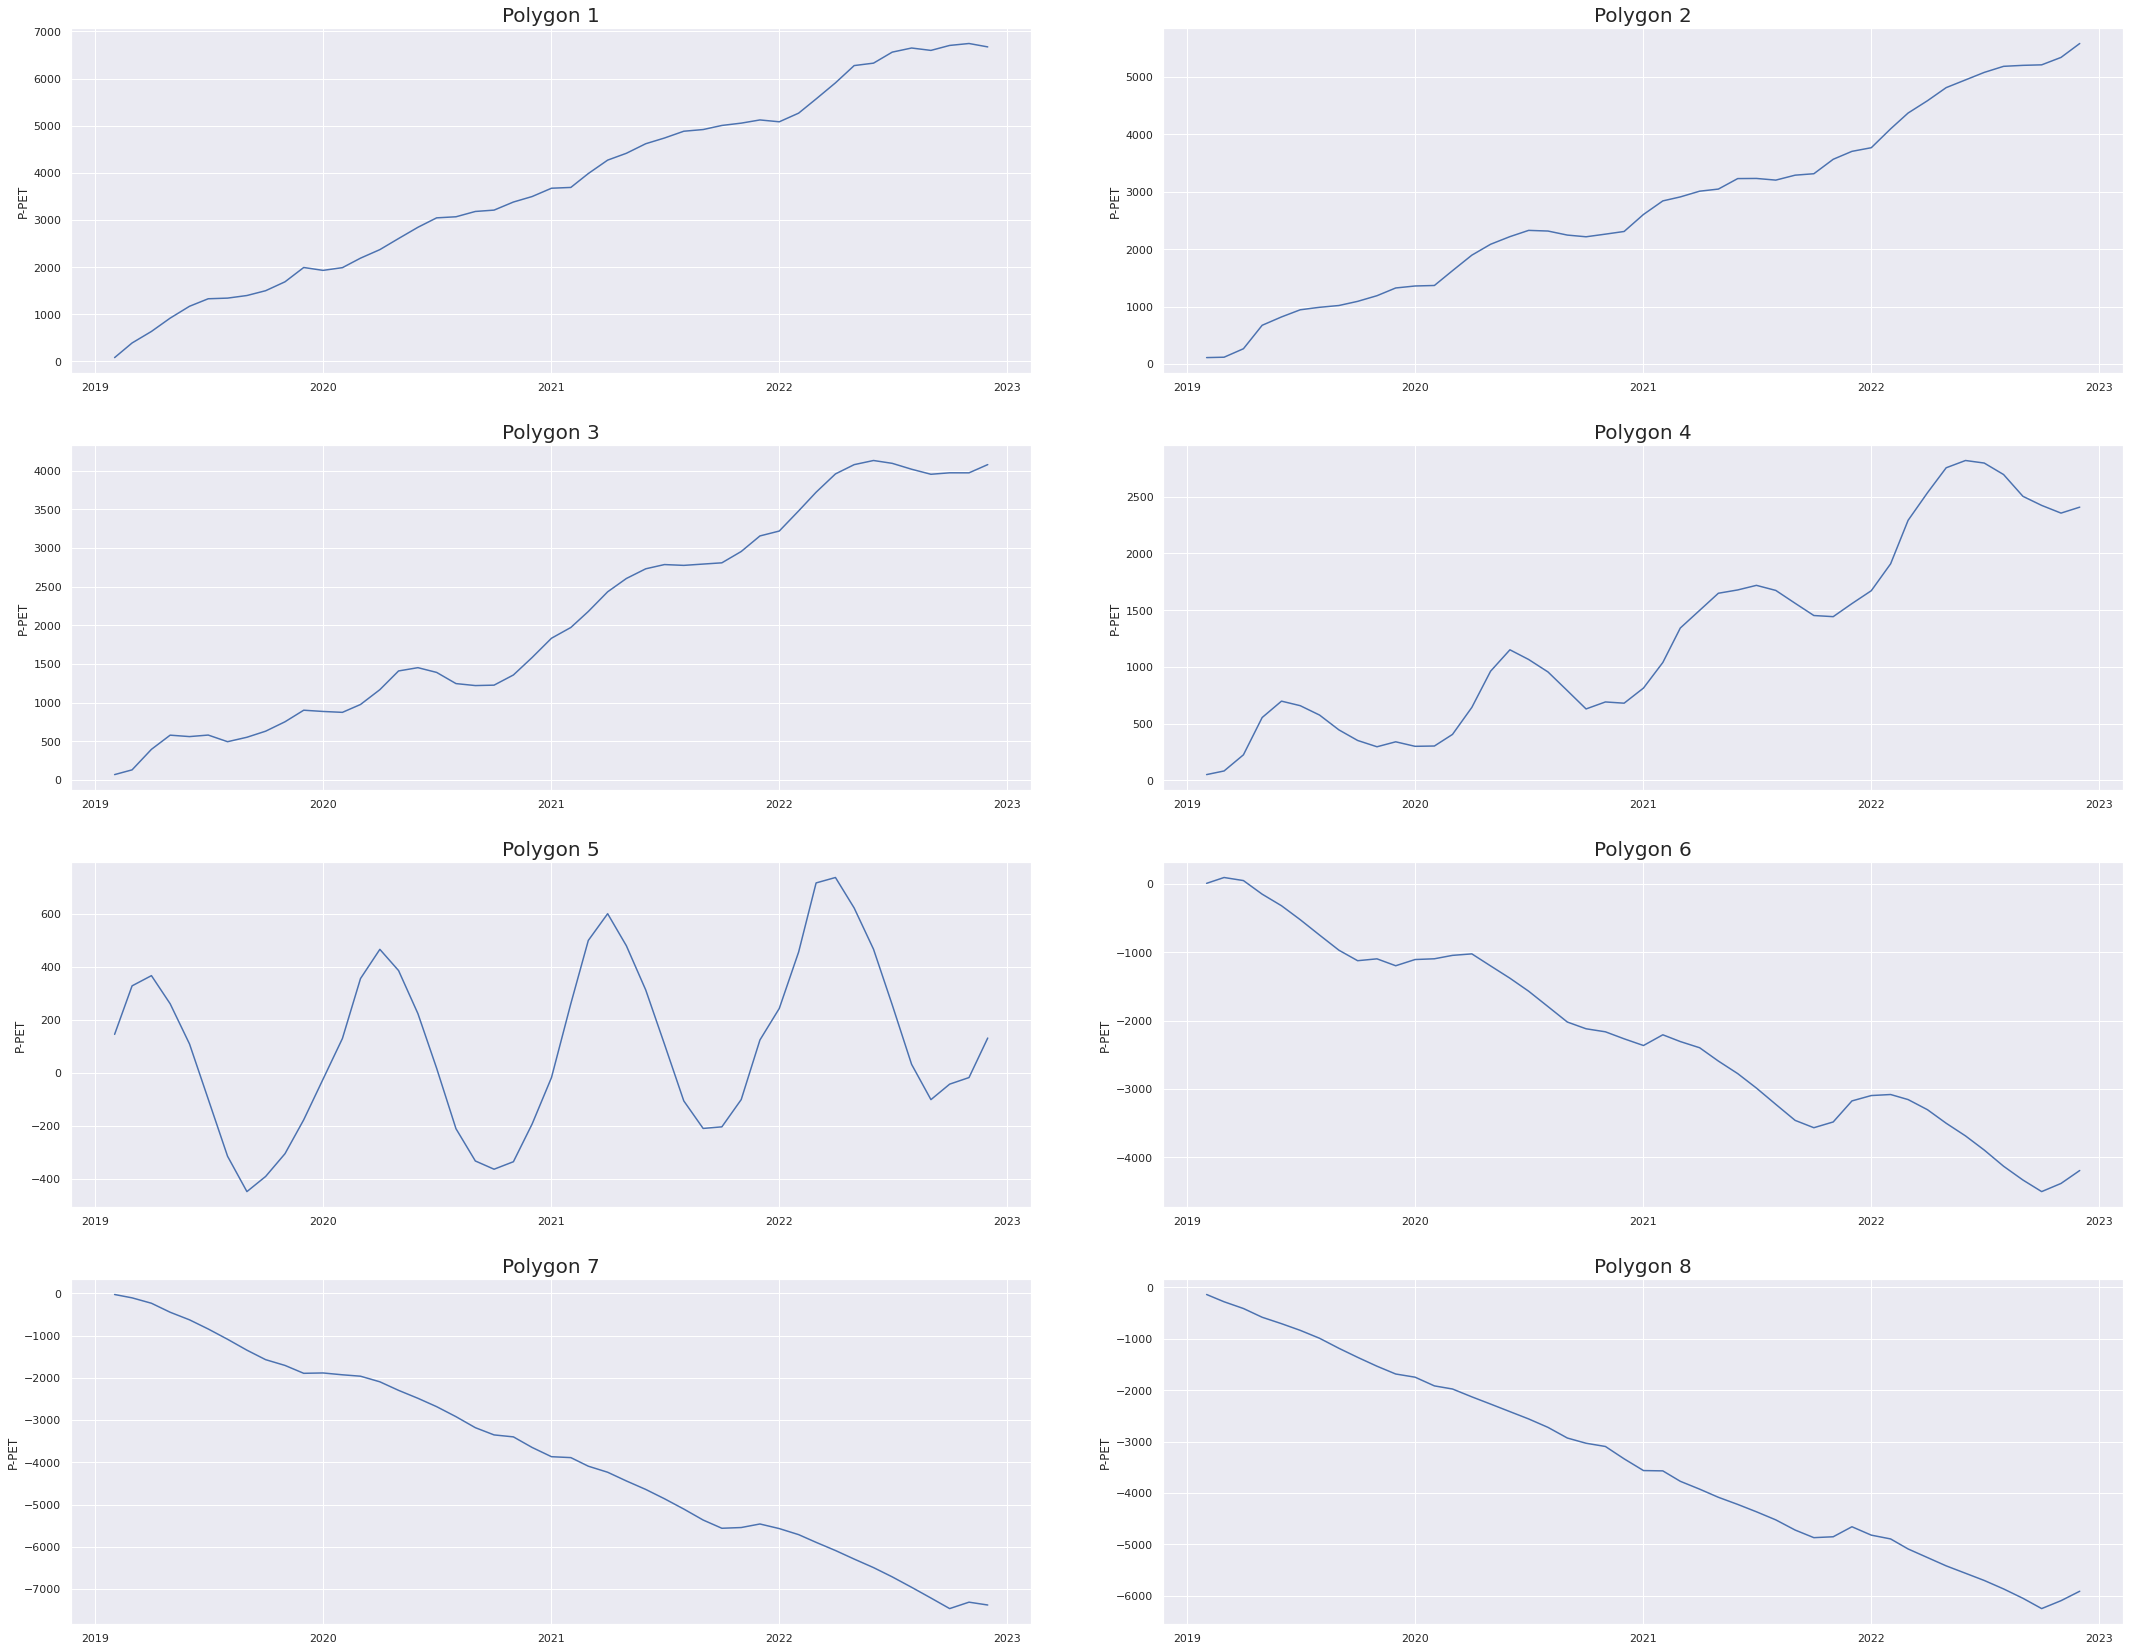

In [112]:

fig, ax = plot.plot_per_polygon(climate_int[climate_int.datetime > '2019-01-01'], "", lambda df, ax: sns.lineplot(x=df.datetime, y=df['P-PET'].cumsum(), ax=ax))
format_date_long_ts(ax)
#fig.autofmt_xdate()

### PAI_Z Comparison across polygons

In [59]:
gedi_all= pipeline.get_filtered_gedi_footprints()

In [60]:
# For some reason, pai_z is a string, so convert to a numpy array
gedi_all['pai_z_np'] = gedi_all.apply(lambda row: np.flip(np.trim_zeros(np.array(row.pai_z[1:-1].split(", ")).astype(float))), axis = 1)

In [61]:
def pad_numpy_array(df):
    pai_array = df.pai_z_np
    return np.pad(pai_array, (0, 30-pai_array.size), 'constant')

gedi_all['pai_z_padded'] = gedi_all.apply(pad_numpy_array, axis = 1)

In [62]:
def calc_pai_z_delta(df):
    pai_array = df.pai_z_padded
    pai_rolled = np.roll(pai_array, 1)
    pai_delta = pai_array - pai_rolled
    pai_delta[pai_delta < 0] = 0
    return pai_delta

gedi_all['pai_z_delta_np'] = gedi_all.apply(calc_pai_z_delta, axis=1)

In [63]:
# Calculate vertical means for each polygon.
vertical_means = []
for polygon_id in range(1, 9):
    polygon_data = gedi_all[(gedi_all.polygon_id==polygon_id)]
    vertical_means.append(np.mean(polygon_data.pai_z_padded.to_numpy(), axis=0))

In [64]:
# Calculate vertical means for each polygon.
delta_means = []
for polygon_id in range(1, 9):
    polygon_data = gedi_all[(gedi_all.polygon_id==polygon_id)]
    delta_means.append(np.mean(polygon_data.pai_z_delta_np.to_numpy(), axis=0))

In [95]:
vertical_means_pdf= pd.DataFrame(vertical_means)
vertical_means_pdf['polygon_id'] = vertical_means_pdf.index + 1
vertical_df = vertical_means_pdf.set_index('polygon_id').transpose().reset_index().melt(id_vars=['index'], value_vars=[1, 2, 3, 4, 5, 6, 7, 8])

In [96]:
delta_means_pdf= pd.DataFrame(delta_means)
delta_means_pdf['polygon_id'] = delta_means_pdf.index + 1
delta_df = delta_means_pdf.set_index('polygon_id').transpose().reset_index().melt(id_vars=['index'], value_vars=[1, 2, 3, 4, 5, 6, 7, 8])

In [97]:
vertical_df.to_csv("../../data/interim/pai_z_means_per_polygon.csv")
delta_df.to_csv("../../data/interim/pai_z_delta_means_per_polygon.csv")

In [101]:
delta_df

index polygon_id     value
0        0          1  0.118975
1        1          1  0.542571
2        2          1  0.785257
3        3          1  0.776298
4        4          1  0.642466
..     ...        ...       ...
235     25          8  0.000007
236     26          8  0.000009
237     27          8  0.000015
238     28          8  0.000023
239     29          8  0.000015

[240 rows x 3 columns]

(0.0, 12.0)

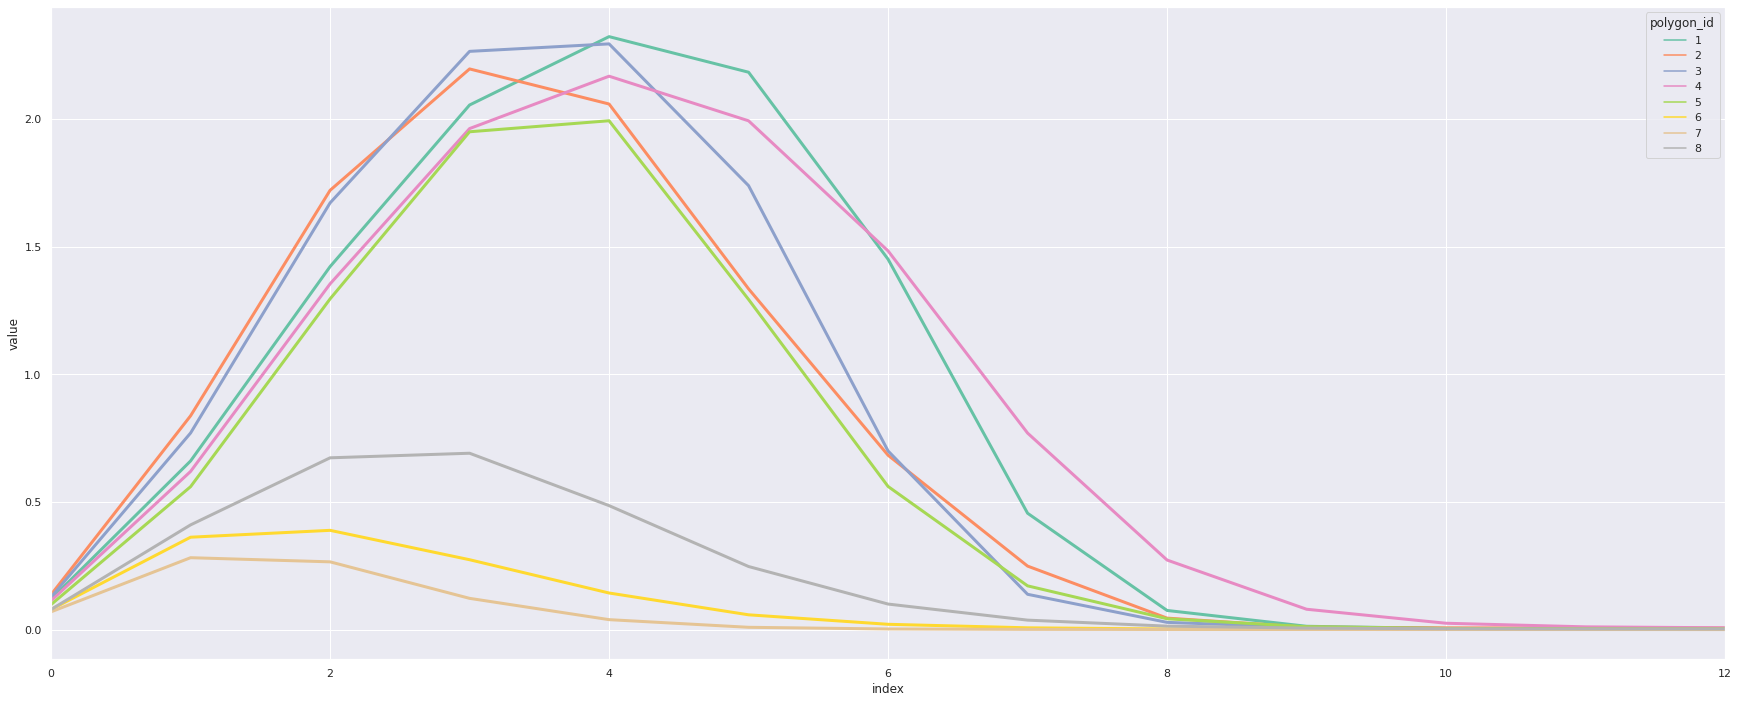

In [161]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(30, 12))
graph = sns.lineplot(vertical_df, x='index', y='value', hue='polygon_id', palette=palette, ax=ax, linewidth=3)
ax.set_xlim(0, 12)

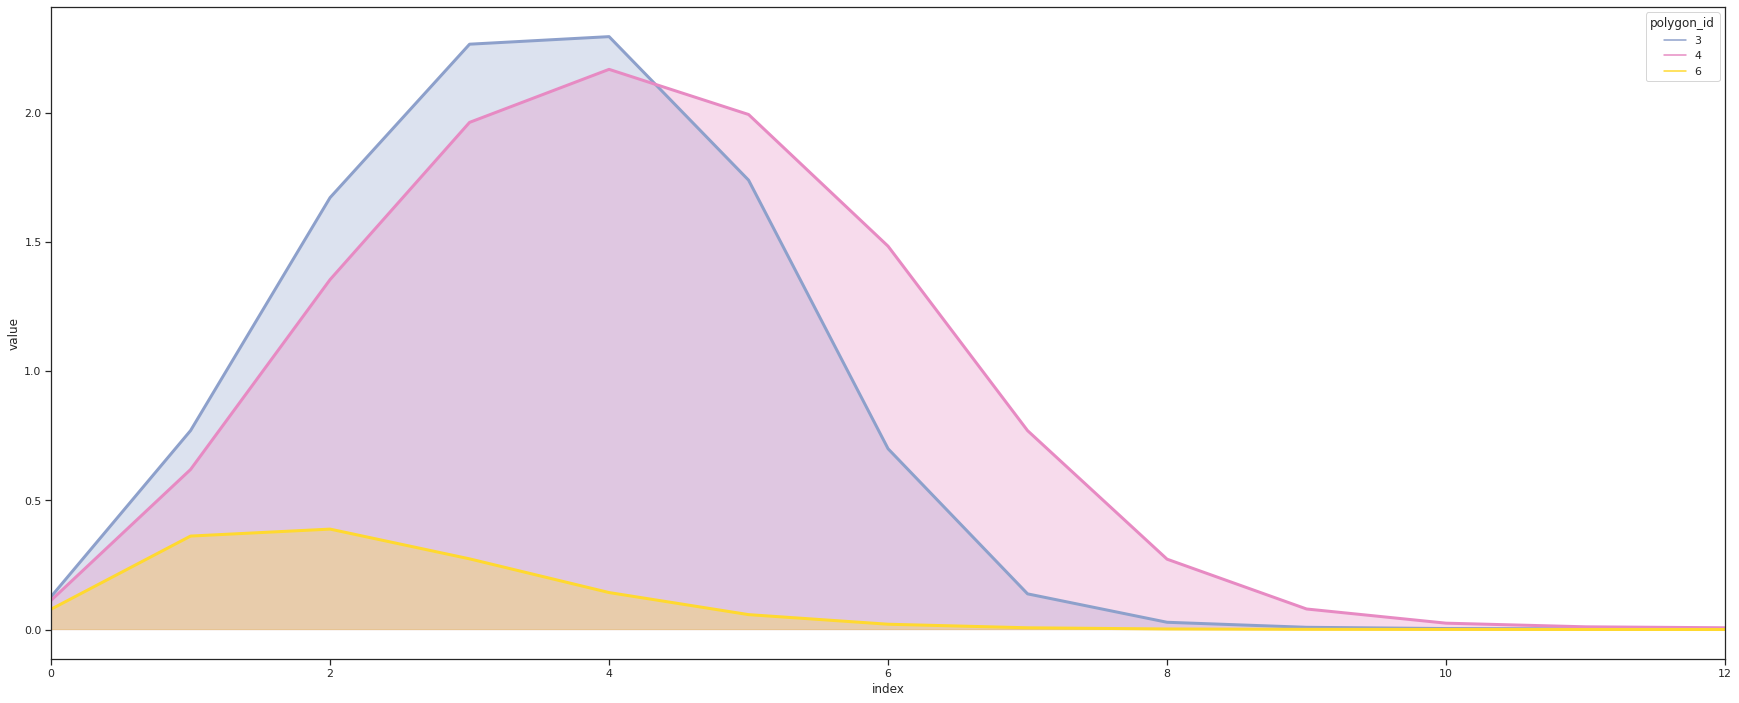

In [163]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, 1, figsize=(30, 12))

graph = sns.lineplot(vertical_df[vertical_df.polygon_id.isin([3, 4, 6])], x='index', y='value', hue='polygon_id', palette=[palette[i] for i in [2, 3, 5]], ax=ax, linewidth=3)
ax.set_xlim(0, 12)
line = graph.get_lines()
plt.fill_between(line[0].get_xdata(), line[0].get_ydata(), 0, color=palette[2], alpha=.3)
plt.fill_between(line[1].get_xdata(), line[1].get_ydata(), 0, color=palette[3], alpha=.3)
plt.fill_between(line[2].get_xdata(), line[2].get_ydata(), 0, color=palette[5], alpha=.3)

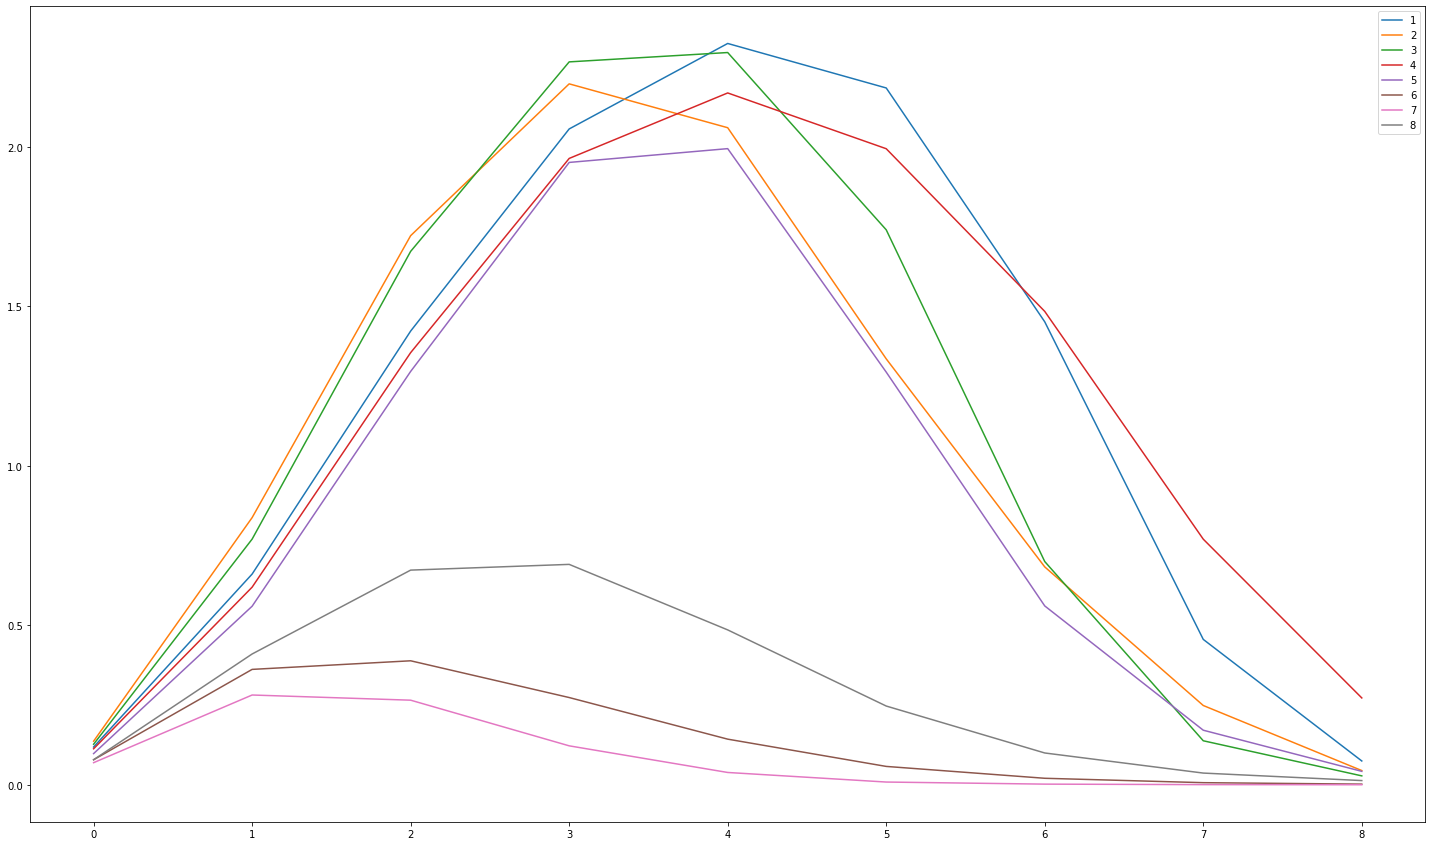

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(30, 12))
sns.set_style("ticks")
graph = sns.lineplot(vertical_df, x='index', y='value', hue='polygon_id', palette=palette, ax=ax, linewidth=3)
ax.set_xlim(0, 12)

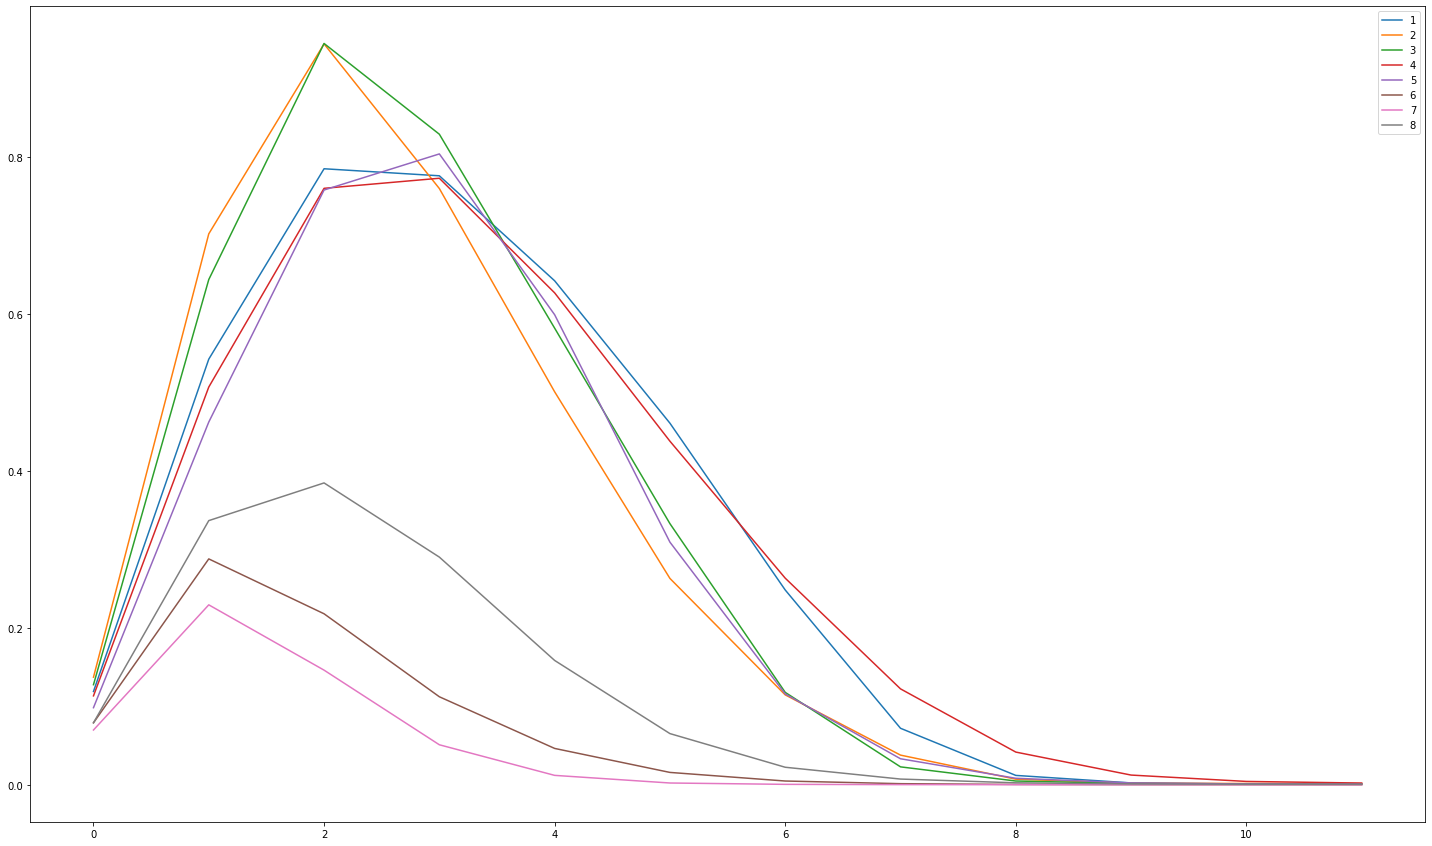

In [67]:
plt.rcParams['figure.figsize'] = [25, 15]
for i in range(0, 8):
    plt.plot(delta_means[i][:12], label=f'{i+1}')
plt.legend()

<AxesSubplot: xlabel='pai_z_index', ylabel='pai_z_np'>

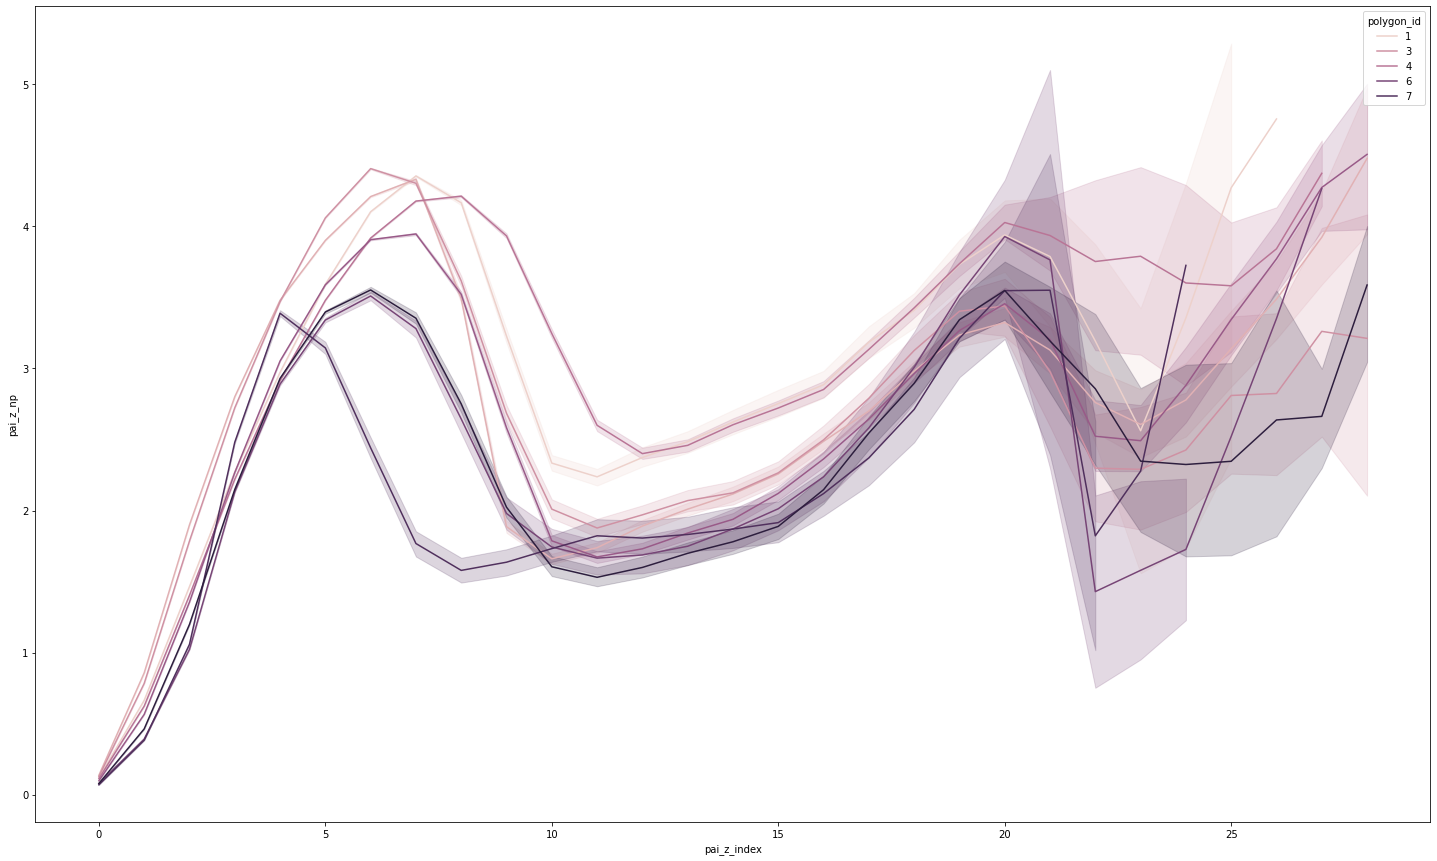

In [ ]:
import seaborn as sns
polygon_data = gedi_with_pai_z_cleaned[gedi_with_pai_z_cleaned.polygon_id == 1]
sns.lineplot(gedi_with_pai_z_cleaned, x='pai_z_index', y='pai_z_np', hue='polygon_id')

<AxesSubplot: xlabel='pai_z_index', ylabel='pai_z_np'>

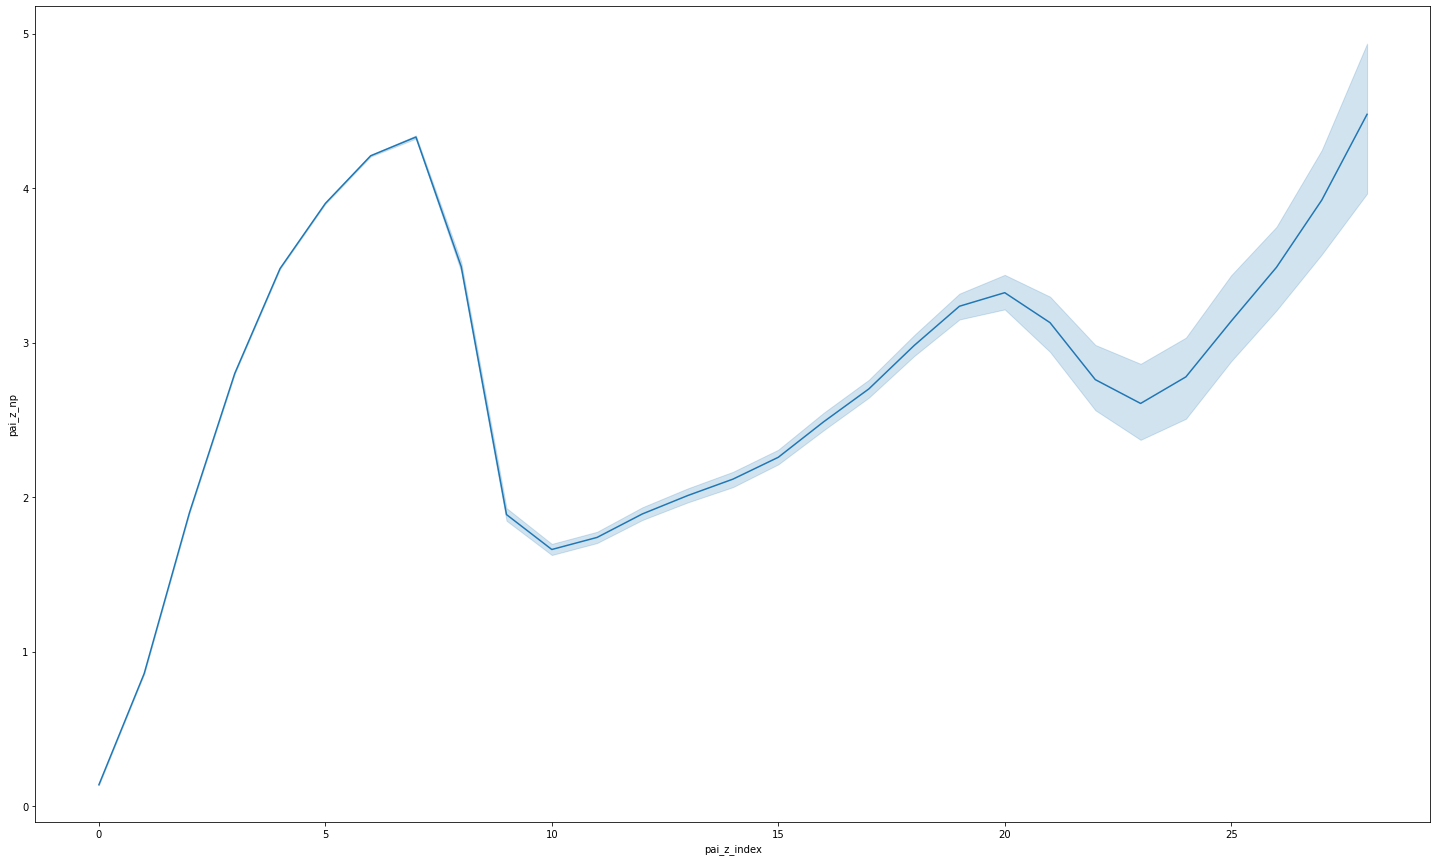

In [ ]:
import seaborn as sns
polygon_data = gedi_with_pai_z_cleaned[gedi_with_pai_z_cleaned.polygon_id == 2]
sns.lineplot(polygon_data, x='pai_z_index', y='pai_z_np')

In [ ]:
gedi_with_pai_z_cleaned[gedi_with_pai_z_cleaned.pai_z_index == 25]

pai_z_index  Unnamed: 0       pai  rh100  \
12792275           25         677  2.817831  14042   
13516206           25         985  4.512353  12652   
13516465           25        1024  4.679458  13188   
13516735           25        1055  5.060929  13282   
13516883           25        1067  2.927476  13477   
...               ...         ...       ...    ...   
39194493           25       21976  3.959161  13213   
39227130           25       59307  3.338792  14027   
44348045           25      117663  4.219966  12576   
44348092           25      117665  4.142051  13505   
46697522           25       65735  1.025193  14108   

                                                      pai_z  \
12792275  [2.8151162, 2.1529179, 1.71024, 1.6594079, 1.6...   
13516206  [4.5123525, 3.8232162, 2.7994504, 2.0442898, 1...   
13516465  [4.667458, 3.7440212, 2.556653, 1.7350917, 1.2...   
13516735  [5.0609293, 3.8413057, 2.651926, 1.8062313, 1....   
13516883  [2.9274762, 2.6217053, 1.8987794, 1.3999844, 1...   
...                                                     ...   
39194493  [3.9591608, 2.7811933, 1.8864323, 1.6321428, 1...   
39227130  [3.3387923, 2.4074566, 1.3618004, 1.1337831, 1...   
44348045  [4.2199664, 3.5053983, 2.728581, 2.2661846, 2....   
44348092  [4.142051, 3.5497067, 2.9037929, 2.218989, 1.7...   
46697522  [1.0174487, 0.9786577, 0.97749877, 0.96894145,...   

                                                     pavd_z  \
12792275  [0.13243967, 0.11048762, 0.049350988, 0.006966...   
13516206  [0.13782722, 0.1712902, 0.17789266, 0.1178163,...   
13516465  [0.18468736, 0.21108049, 0.20089296, 0.1297208...   
13516735  [0.2439247, 0.24090032, 0.20350745, 0.1312798,...   
13516883  [0.06115416, 0.10286968, 0.1221721, 0.07154983...   
...                                                     ...   
39194493  [0.23559351, 0.20727286, 0.11490506, 0.0271886...   
39227130  [0.18626715, 0.1976992, 0.12736735, 0.02492486...   
44348045  [0.14291365, 0.14913857, 0.12392139, 0.0708768...   
44348092  [0.11846892, 0.123825856, 0.13307177, 0.117386...   
46697522  [0.007758175, 0.0039949855, 0.0009716272, 0.00...   

                 shot_number  lon_lowestmode  lat_lowestmode  \
12792275   57210800100065202      -67.846523       -1.120979   
13516206   62160500400521472      -53.593032       -7.903860   
13516465   62160500400521401      -53.614669       -7.874256   
13516735   62160500400521358      -53.627707       -7.856276   
13516883   62161100400521268      -53.631421       -7.883974   
...                      ...             ...             ...   
39194493  140920500100111529      -41.502826      -15.981470   
39227130  140921100100111854      -41.304535      -15.758378   
44348045  155641100400326632      -56.805960       -0.259540   
44348092  155641100400326629      -56.806852       -0.258275   
46697522  165401100400329589      -60.939070       -1.932514   

          l2b_quality_flag                                         geometry  \
12792275                 1    POINT (-67.8465233188337 -1.1209794319626445)   
13516206                 1    POINT (-53.59303207758029 -7.903860309611375)   
13516465                 1     POINT (-53.6146692089994 -7.874255991030203)   
13516735                 1    POINT (-53.62770669878715 -7.856275615694484)   
13516883                 1    POINT (-53.63142146703209 -7.883973689638283)   
...                    ...                                              ...   
39194493                 1    POINT (-41.50282555340589 -15.98146981168729)   
39227130                 1   POINT (-41.30453507497657 -15.758378493138139)   
44348045                 1  POINT (-56.805959647335335 -0.2595397256094591)   
44348092                 1  POINT (-56.806851558707265 -0.2582754750551973)   
46697522                 1  POINT (-60.939070152340754 -1.9325136853988005)   

          year  month  polygon_id polygon_spei  pai_z_np  \
12792275  2019     12           2            Y  1.659408   
13516206 

In [ ]:
gedi_with_pai_z[(gedi_with_pai_z.polygon_id == 1) & (gedi_with_pai_z.pai_z_index == 30)]

In [ ]:
gedi_with_pai_z[(gedi_with_pai_z.shot_number==62160500400521358)].pai_z_np

13516710    0.057355
13516711     0.12759
13516712    0.231039
13516713    0.302534
13516714    0.380105
13516715    0.451259
13516716    0.550092
13516717    0.586746
13516718    0.641549
13516719    0.670867
13516720    0.707475
13516721    0.746325
13516722     0.76975
13516723    0.813134
13516724    0.844464
13516725    0.860791
13516726    0.880068
13516727    0.902855
13516728    0.932301
13516729    0.991165
13516730    1.003654
13516731    1.079198
13516732    1.339128
13516733    1.806231
13516734    2.651926
13516735    3.841306
13516736    5.060929
Name: pai_z_np, dtype: object

In [245]:
polygon_2_before_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2020) & (gedi_all.month == 3)]
polygon_2_during_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2020) & (gedi_all.month == 11)]
polygon_2_after_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2021) & (gedi_all.month == 2)]
polygon_2_long_after_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2022) & (gedi_all.month == 5)]

In [240]:
vm_before_drought = np.mean(polygon_2_before_drought.pai_z_padded.to_numpy(), axis=0)
vm_during_drought = np.mean(polygon_2_during_drought.pai_z_padded.to_numpy(), axis=0)
vm_after_drought = np.mean(polygon_2_after_drought.pai_z_padded.to_numpy(), axis=0)
vm_long_after_drought = np.mean(polygon_2_long_after_drought.pai_z_padded.to_numpy(), axis=0)

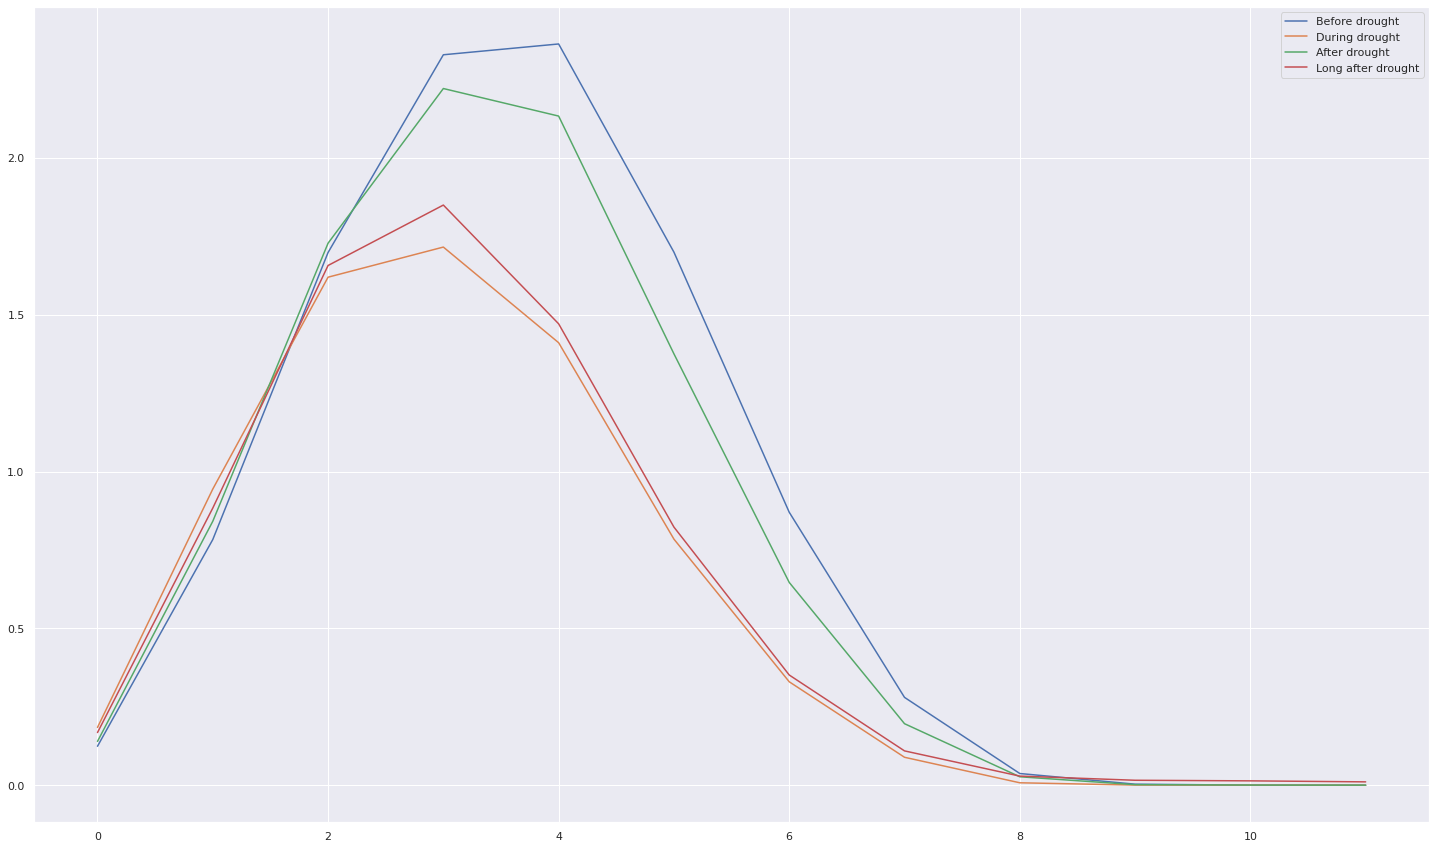

In [244]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.plot(vm_before_drought[:12], label=f'Before drought')
plt.plot(vm_during_drought[:12], label=f'During drought')
plt.plot(vm_after_drought[:12], label=f'After drought')
plt.plot(vm_long_after_drought[:12], label=f'Long after drought')
plt.legend()

In [250]:
polygon_2_before_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2020) & (gedi_all.month.isin([3, 4, 5]))]
polygon_2_during_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2020) & (gedi_all.month.isin([10, 11, 12]))]
polygon_2_after_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2021) & (gedi_all.month.isin([1, 2, 3]))]
polygon_2_long_after_drought = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2022) & (gedi_all.month.isin([3, 4, 5]))]
polygon_2_middle = gedi_all[(gedi_all.polygon_id == 2) & (gedi_all.year == 2021) & (gedi_all.month.isin([7, 8, 9]))]

In [251]:
vm_before_drought = np.mean(polygon_2_before_drought.pai_z_padded.to_numpy(), axis=0)
vm_during_drought = np.mean(polygon_2_during_drought.pai_z_padded.to_numpy(), axis=0)
vm_after_drought = np.mean(polygon_2_after_drought.pai_z_padded.to_numpy(), axis=0)
vm_long_after_drought = np.mean(polygon_2_long_after_drought.pai_z_padded.to_numpy(), axis=0)
vm_middle = np.mean(polygon_2_middle.pai_z_padded.to_numpy(), axis=0)

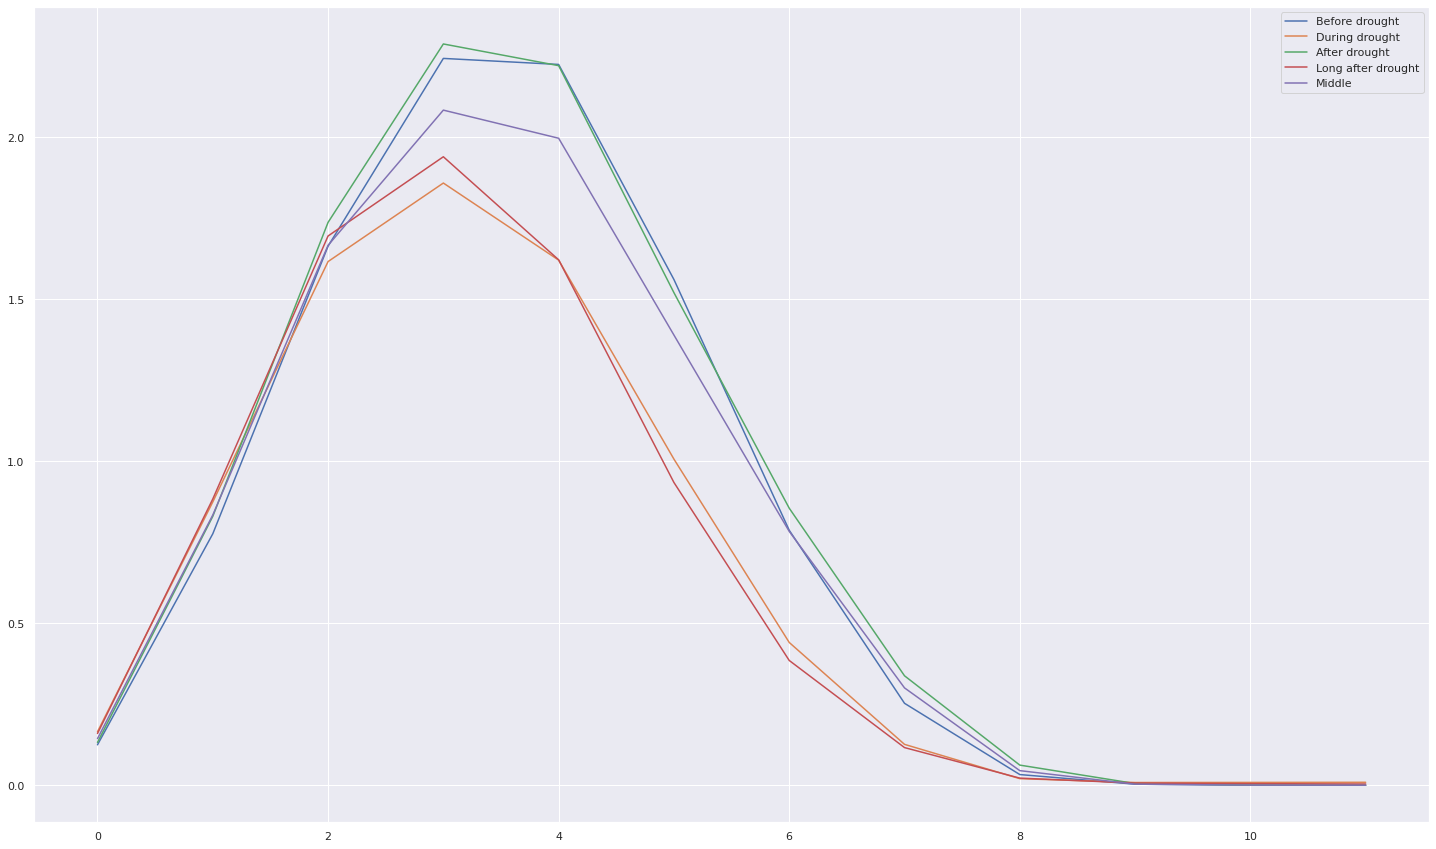

In [252]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.plot(vm_before_drought[:12], label=f'Before drought')
plt.plot(vm_during_drought[:12], label=f'During drought')
plt.plot(vm_after_drought[:12], label=f'After drought')
plt.plot(vm_long_after_drought[:12], label=f'Long after drought')
plt.plot(vm_middle[:12], label=f'Middle')
plt.legend()